In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams['figure.figsize'] = (10 , 5)
plt.rcParams['figure.dpi'] = 300

sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Q1 →→→ANS

In [2]:
df = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\5_Multi_L_R\50_Startups.csv")
df

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [3]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

<Axes: >

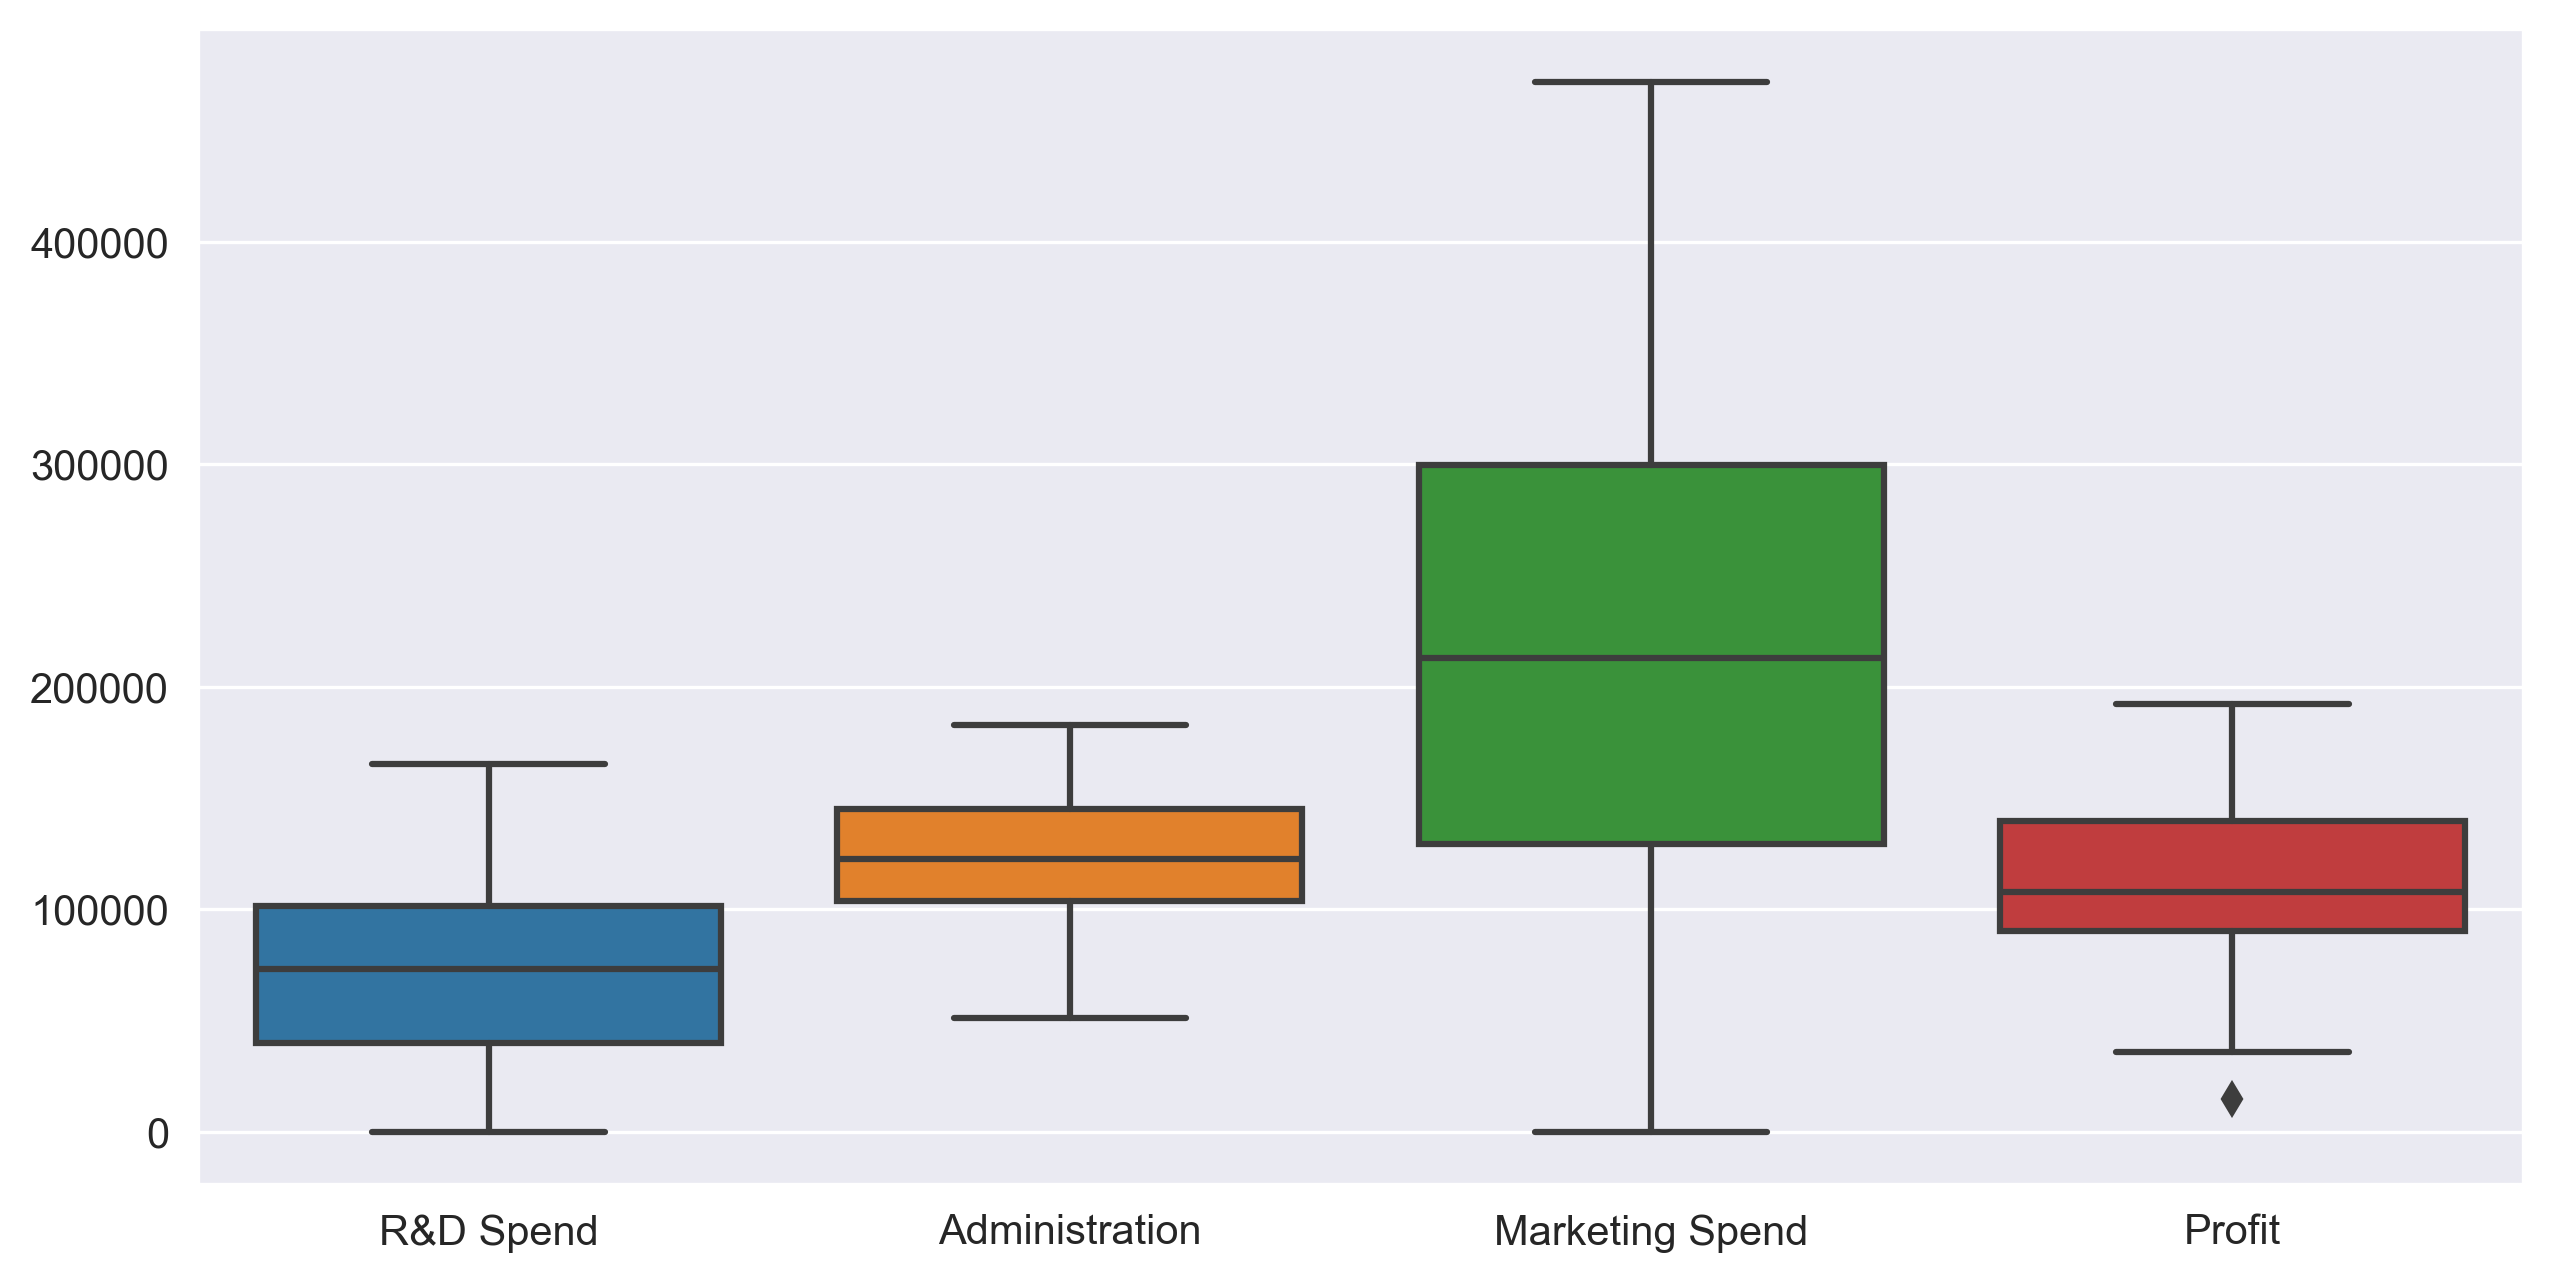

In [4]:
sns.boxplot(df)

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns='State' , inplace=True)

In [7]:
df.columns = ['rd', 'admin', 'mspend', 'profit']
df

rd      admin     mspend     profit
0   165349.20  136897.80  471784.10  192261.83
1   162597.70  151377.59  443898.53  191792.06
2   153441.51  101145.55  407934.54  191050.39
3   144372.41  118671.85  383199.62  182901.99
4   142107.34   91391.77  366168.42  166187.94
5   131876.90   99814.71  362861.36  156991.12
6   134615.46  147198.87  127716.82  156122.51
7   130298.13  145530.06  323876.68  155752.60
8   120542.52  148718.95  311613.29  152211.77
9   123334.88  108679.17  304981.62  149759.96
10  101913.08  110594.11  229160.95  146121.95
11  100671.96   91790.61  249744.55  144259.40
12   93863.75  127320.38  249839.44  141585.52
13   91992.39  135495.07  252664.93  134307.35
14  119943.24  156547.42  256512.92  132602.65
15  114523.61  122616.84  261776.23  129917.04
16   78013.11  121597.55  264346.06  126992.93
17   94657.16  145077.58  282574.31  125370.37
18   91749.16  114175.79  294919.57  124266.90
19   86419.70  153514.11       0.00  122776.86
20   76253.86  113867.30  298664.47  118474.03
21   78389.47  153773.43  299737.29  111313.02
22   73994.56  122782.75  303319.26  110352.25
23   67532.53  105751.03  304768.73  108733.99
24   77044.01   99281.34  140574.81  108552.04
25   64664.71  139553.16  137962.62  107404.34
26   75328.87  144135.98  134050.07  105733.54
27   72107.60  127864.55  353183.81  105008.31
28   66051.52  182645.56  118148.20  103282.38
29   65605.48  153032.06  107138.38  101004.64
30   61994.48  115641.28   91131.24   99937.59
31   61136.38  152701.92   88218.23   97483.56
32   63408.86  129219.61   46085.25   97427.84
33   55493.95  103057.49  214634.81   96778.92
34   46426.07  157693.92  210797.67   96712.80
35   46014.02   85047.44  205517.64   96479.51
36   28663.76  127056.21  201126.82   90708.19
37   44069.95   51283.14  197029.42   89949.14
38   20229.59   65947.93  185265.10   81229.06
39   38558.51   82982.09  174999.30   81005.76
40   28754.33  118546.05  172795.67   78239.91
41   27892.92   84710.77  164470.71   77798.83
42   23640.93   96189.63  148001.11   71498.49
43   15505.73  127382.30   35534.17   69758.98
44   22177.74  154806.14   28334.72   65200.33
45    1000.23  124153.04    1903.93   64926.08
46    1315.46  115816.21  297114.46   49490.75
47       0.00  135426.92       0.00   42559.73
48     542.05   51743.15       0.00   35673.41
49       0.00  116983.80   45173.06   14681.40

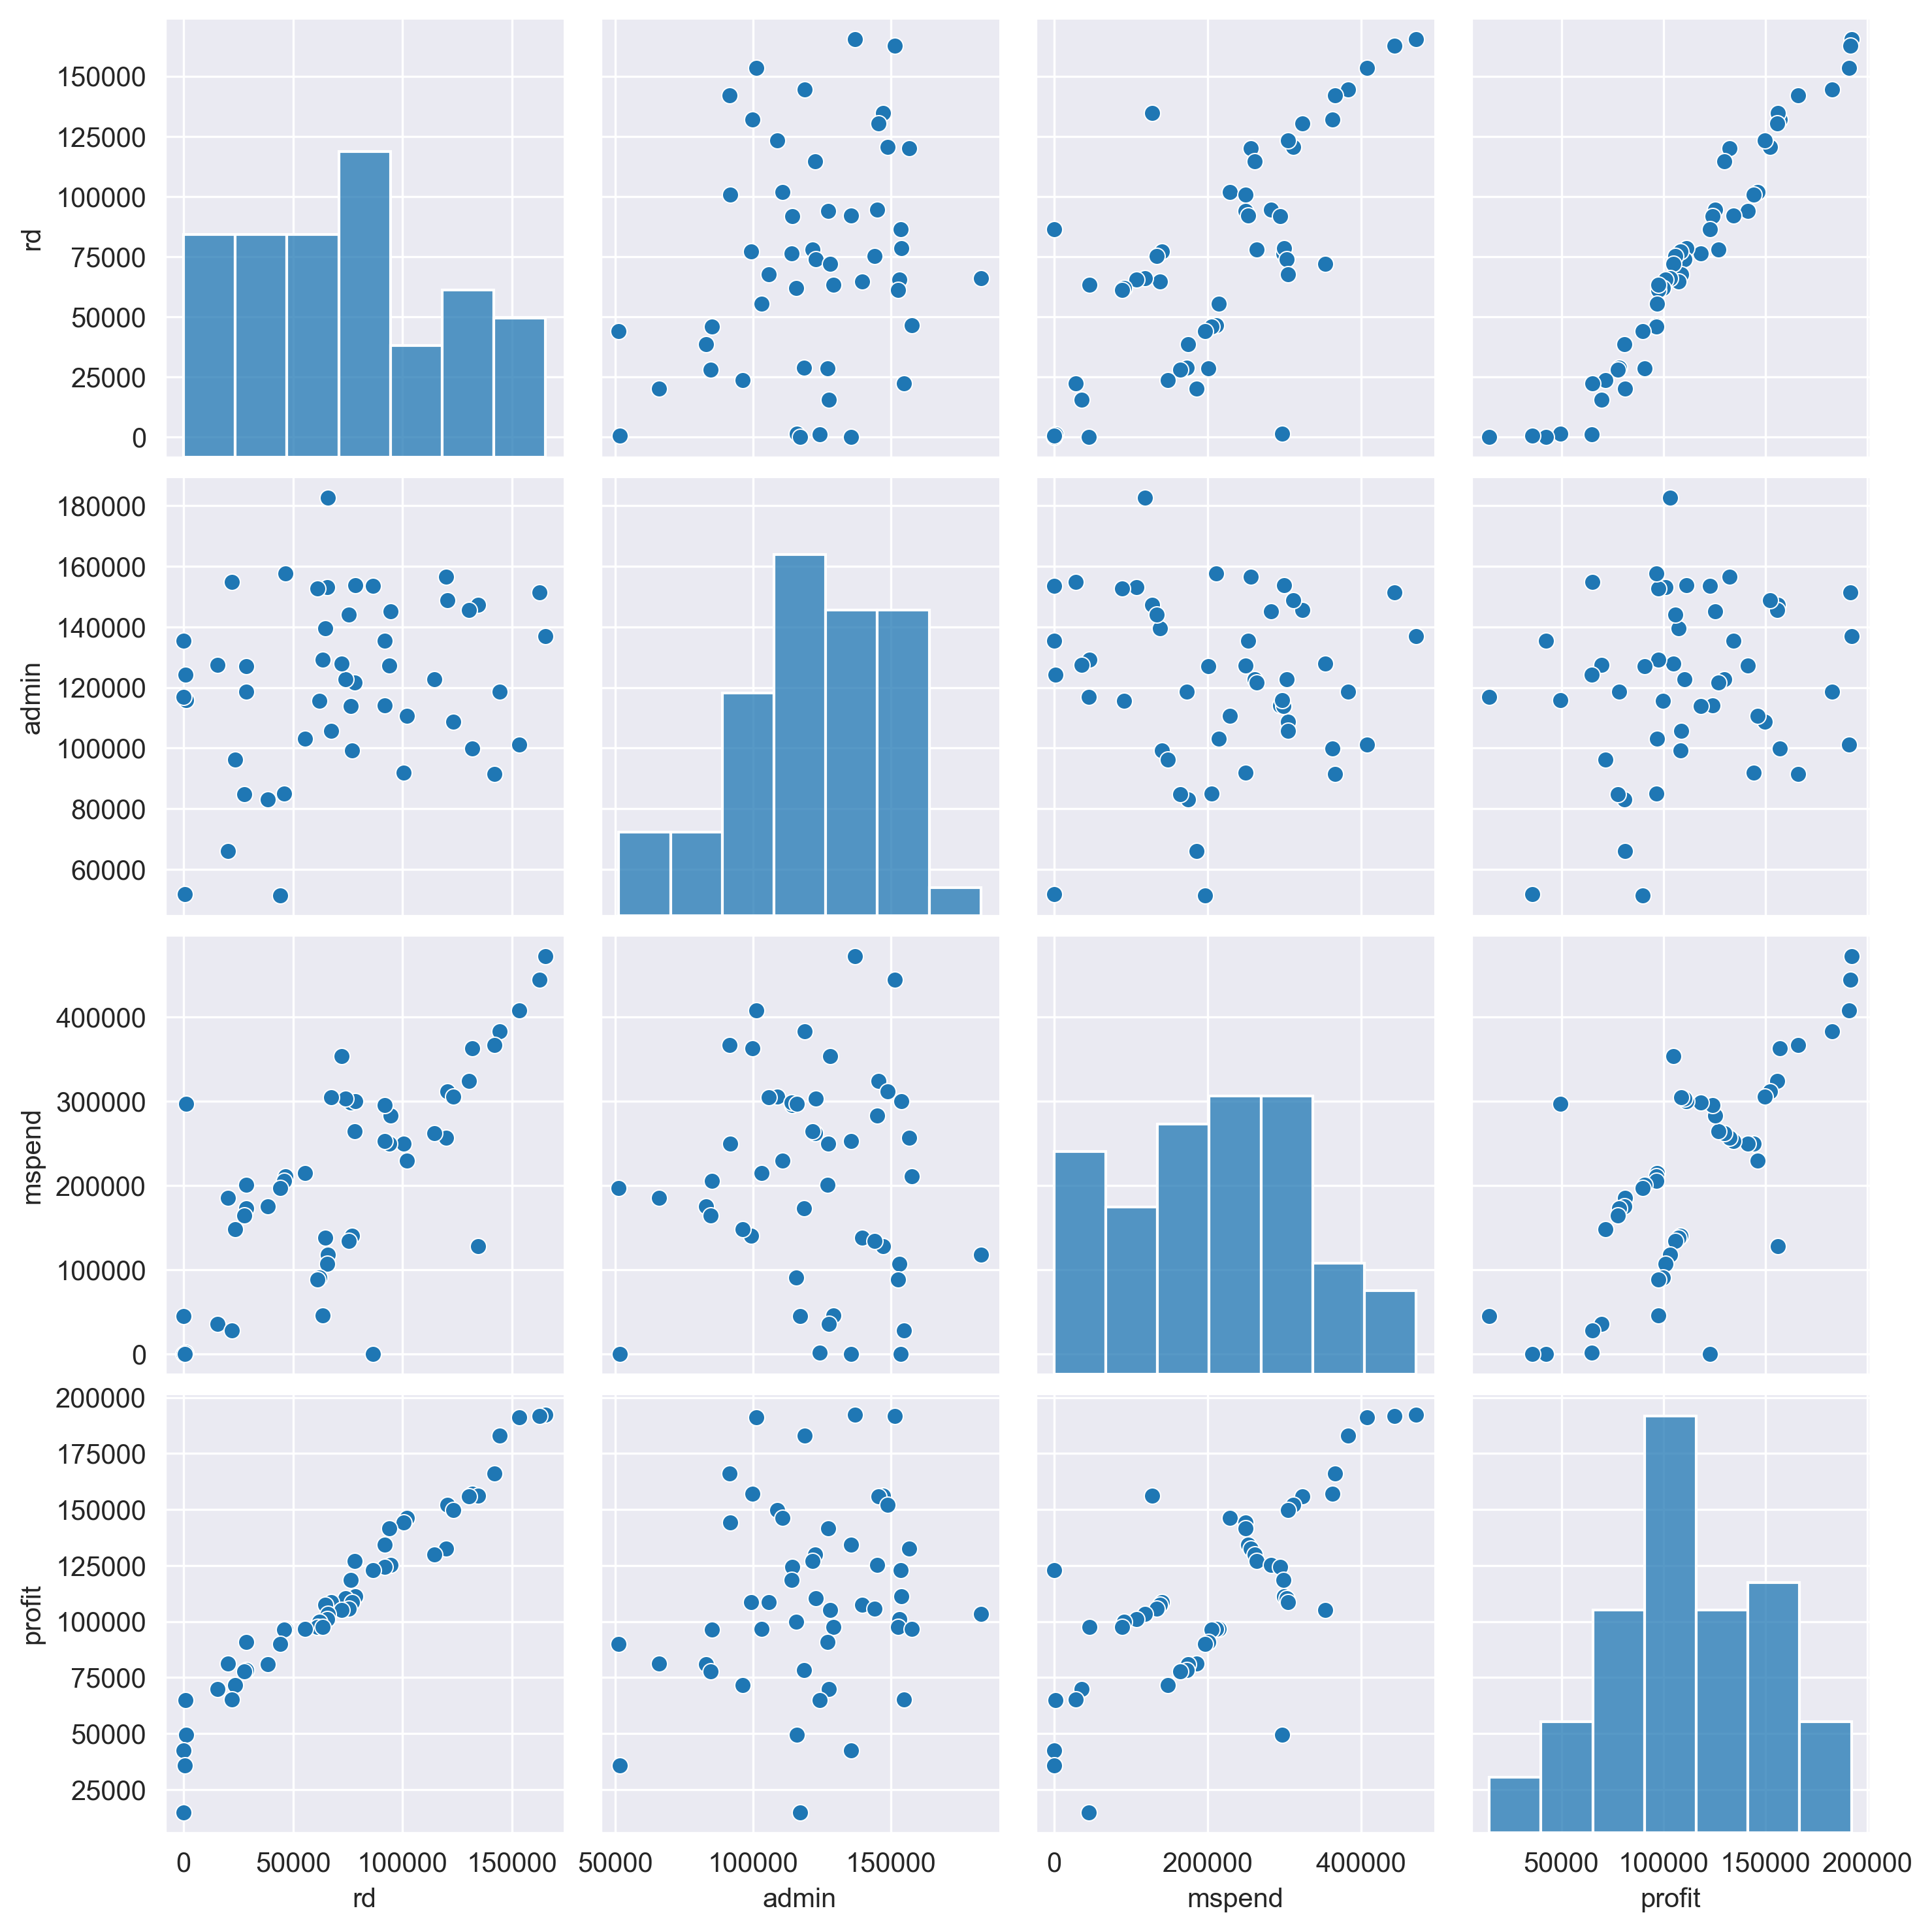

In [8]:
sns.pairplot(df)

<Axes: >

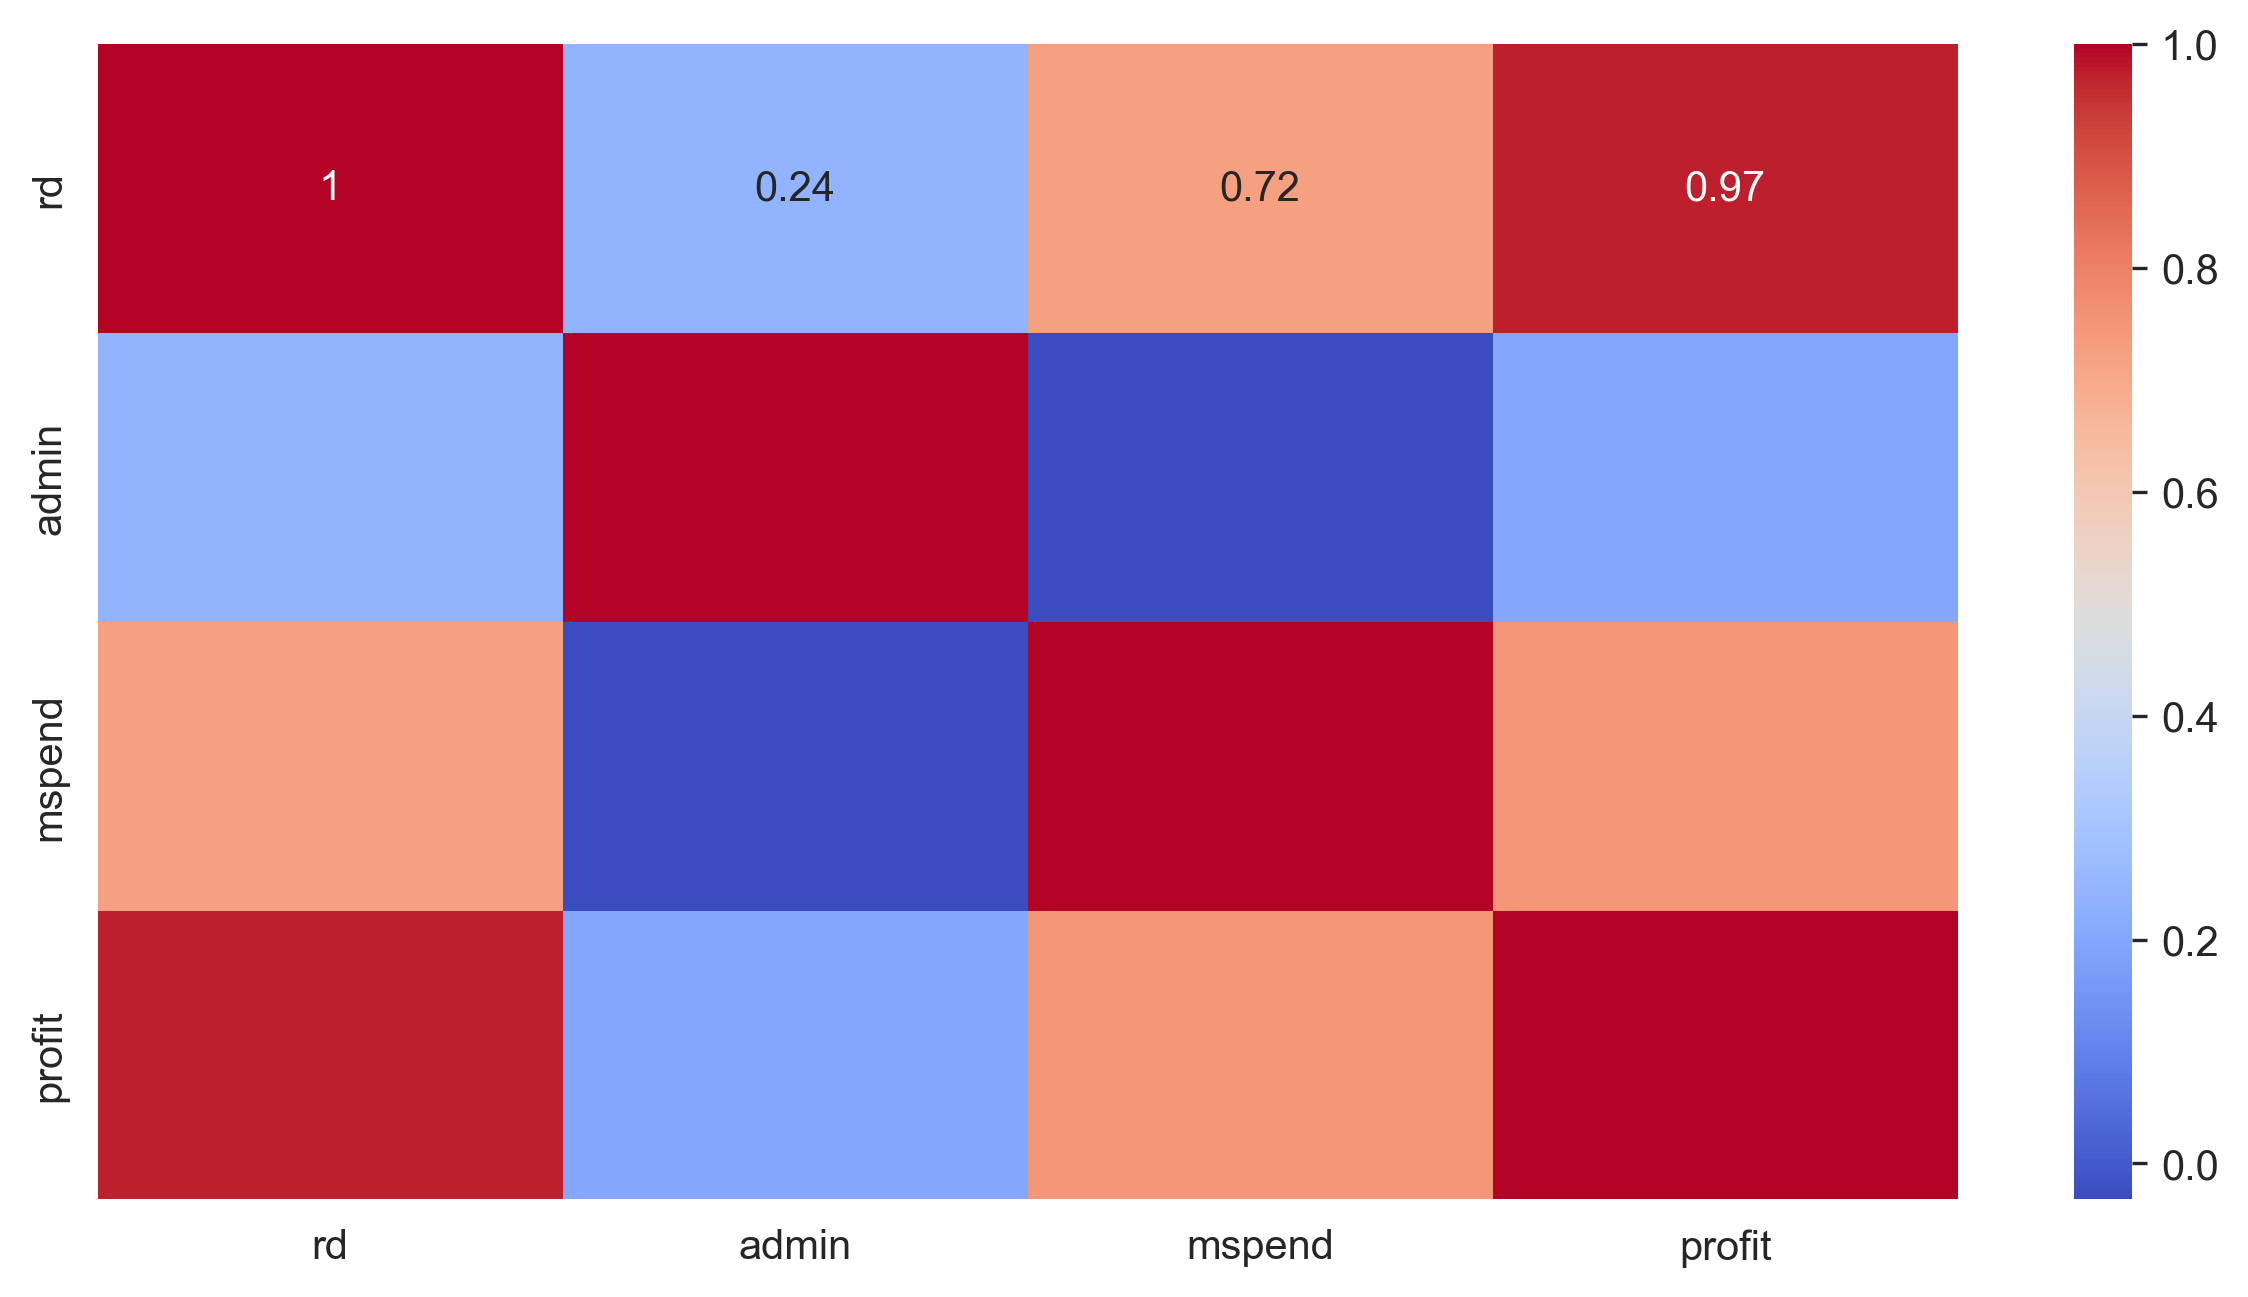

In [9]:
sns.heatmap(df.corr() , annot=True , cmap='coolwarm')

In [10]:
model = smf.ols('profit ~ rd + admin + mspend ' , data= df).fit()


In [11]:
model.pvalues

Intercept    1.057379e-09
rd           2.634968e-22
admin        6.017551e-01
mspend       1.047168e-01
dtype: float64

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df.head()

rd      admin     mspend     profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [13]:
data = df.drop(columns='profit')
data.head()

rd      admin     mspend
0  165349.20  136897.80  471784.10
1  162597.70  151377.59  443898.53
2  153441.51  101145.55  407934.54
3  144372.41  118671.85  383199.62
4  142107.34   91391.77  366168.42

In [14]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [15]:
vif['Features'] = data.columns
vif

Features
0       rd
1    admin
2   mspend

In [16]:
data.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [17]:
vif['VIF'] = [variance_inflation_factor(data.values , i ) for i in range (len(data.columns))]
vif

Features       VIF
0       rd  8.384571
1    admin  4.026406
2   mspend  7.593984

- Subset Selection

In [18]:
rd = smf.ols('profit ~ rd+ admin',data = df).fit()
rd.rsquared, rd.aic

(0.9478129385009173, 1059.6636934567293)

In [19]:
mspend = smf.ols('profit~admin+mspend',data = df).fit()
mspend.rsquared, mspend.aic

(0.6097229746770663, 1160.2648038638672)

- Model validation Techniques

In [ ]:
sam

In [20]:
model = smf.ols('profit ~ rd + admin + mspend' , data = df).fit()

In [21]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [22]:
df.head()

rd      admin     mspend     profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [23]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

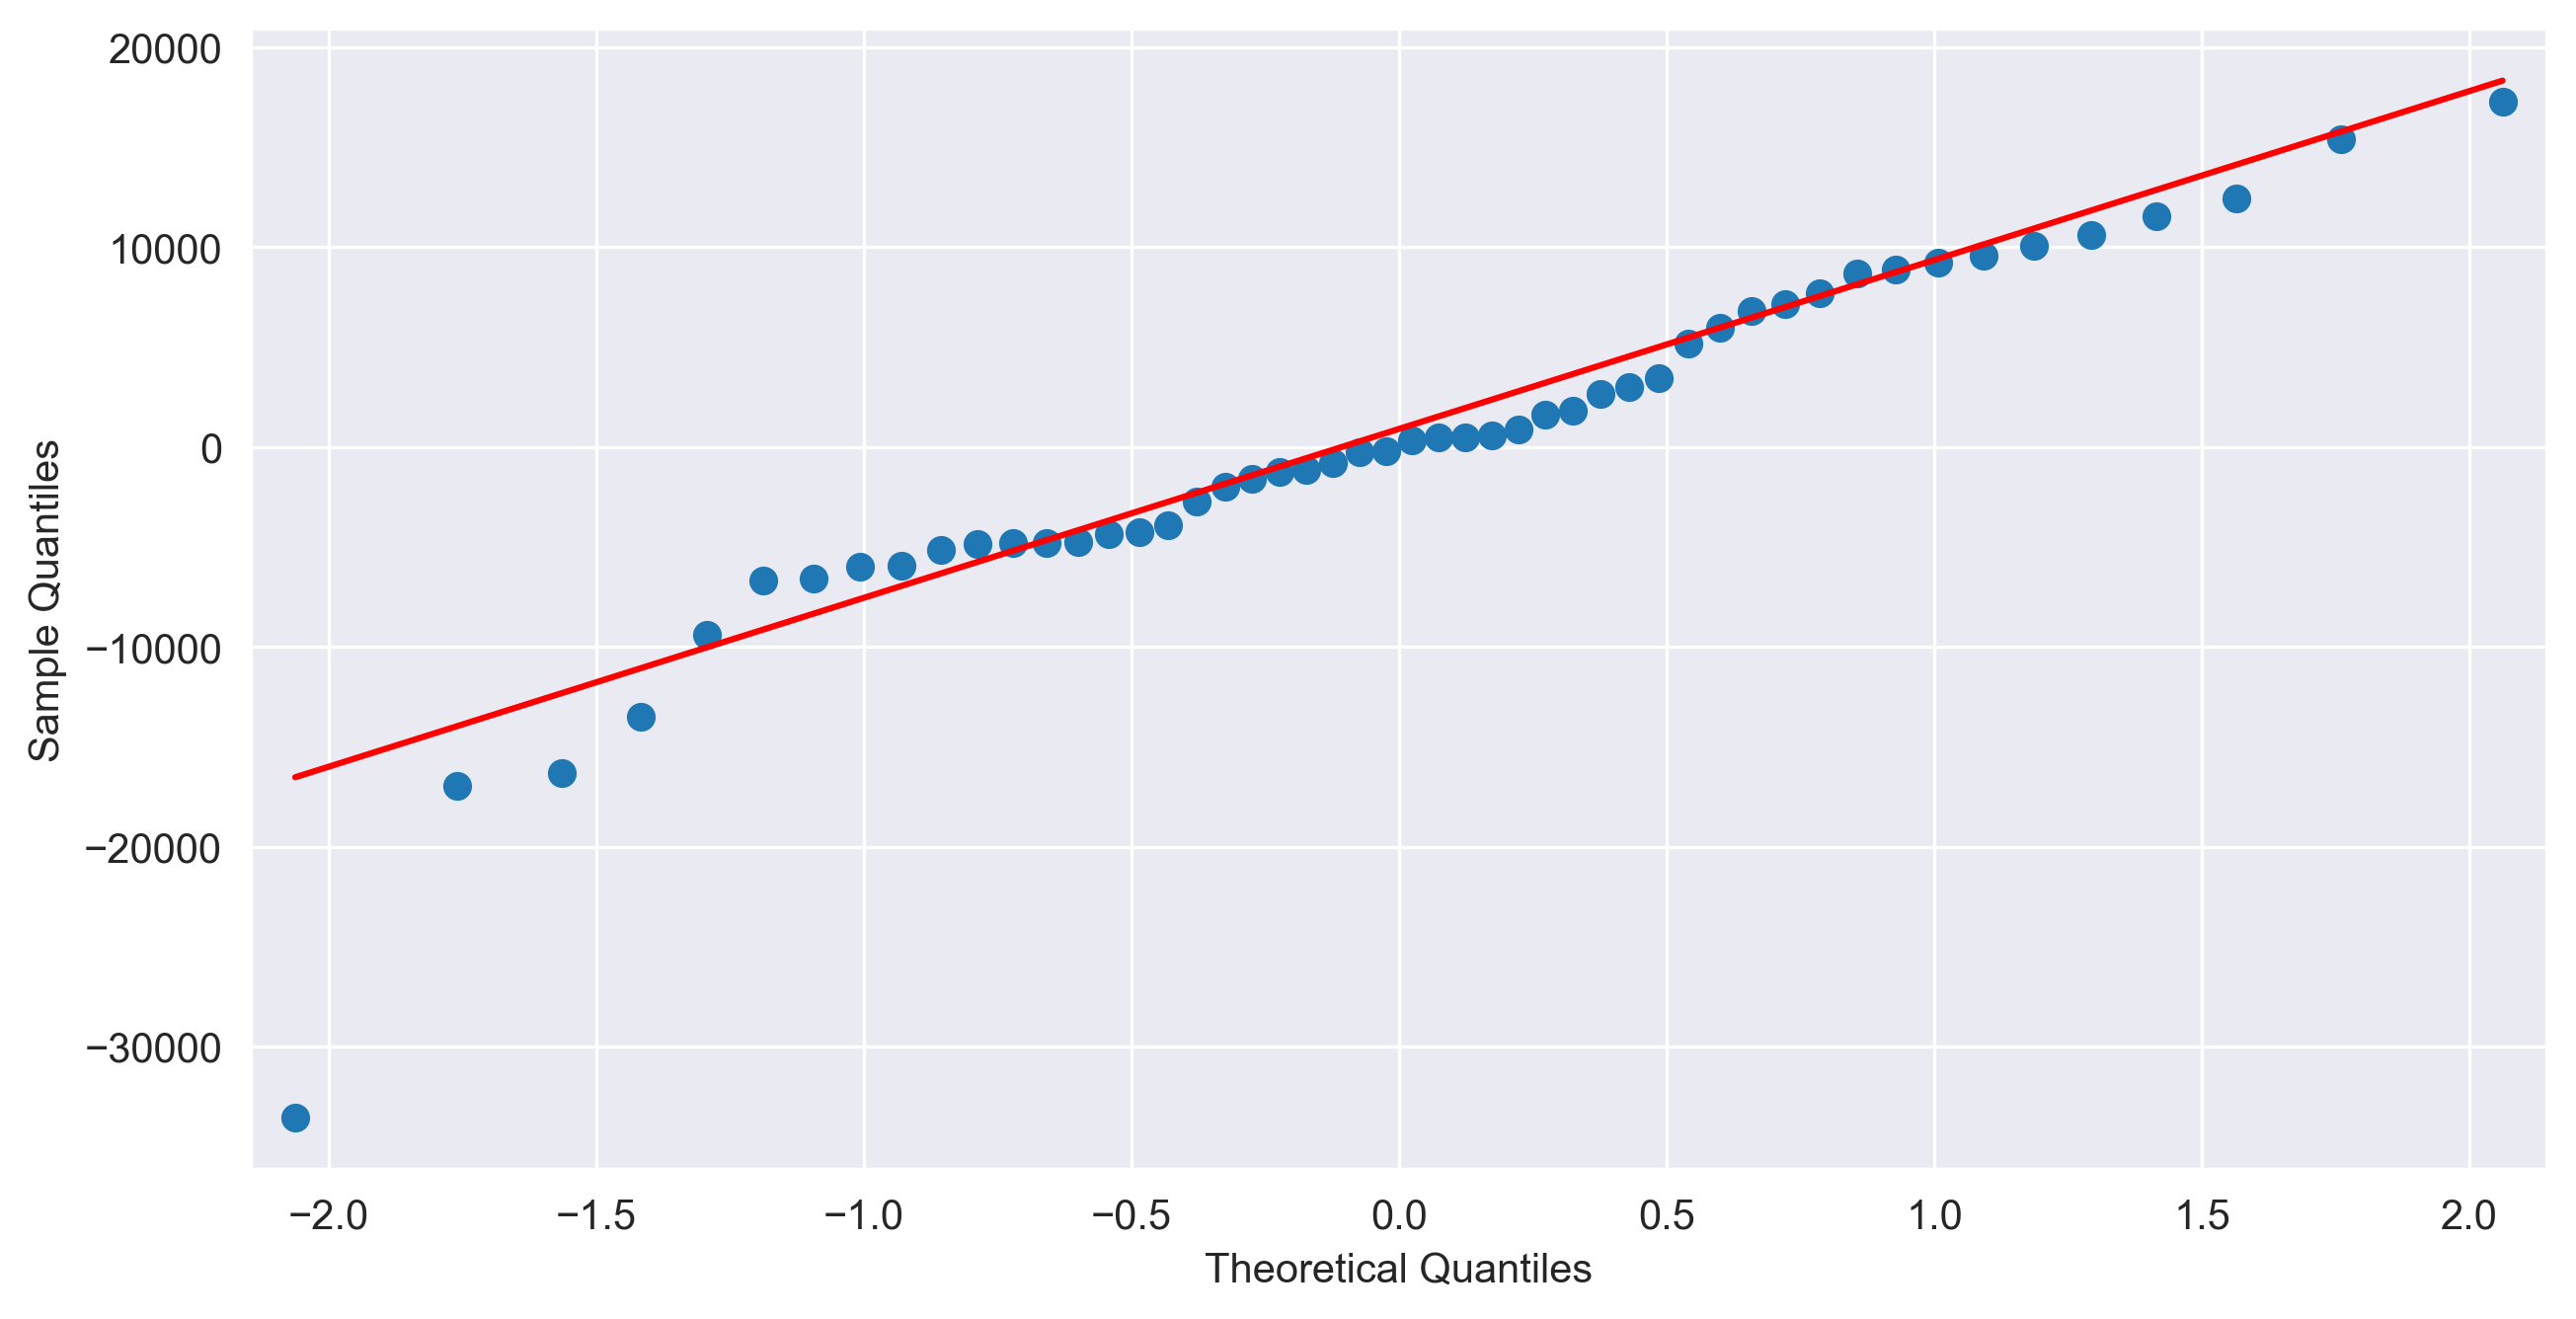

In [24]:
sm.qqplot(model.resid ,line='q');

In [25]:
np.argmax(model.resid) , np.max(model.resid)

(45, 17275.430313093602)

In [26]:
df.head()

rd      admin     mspend     profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [27]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [28]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

Text(0, 0.5, 'Error')

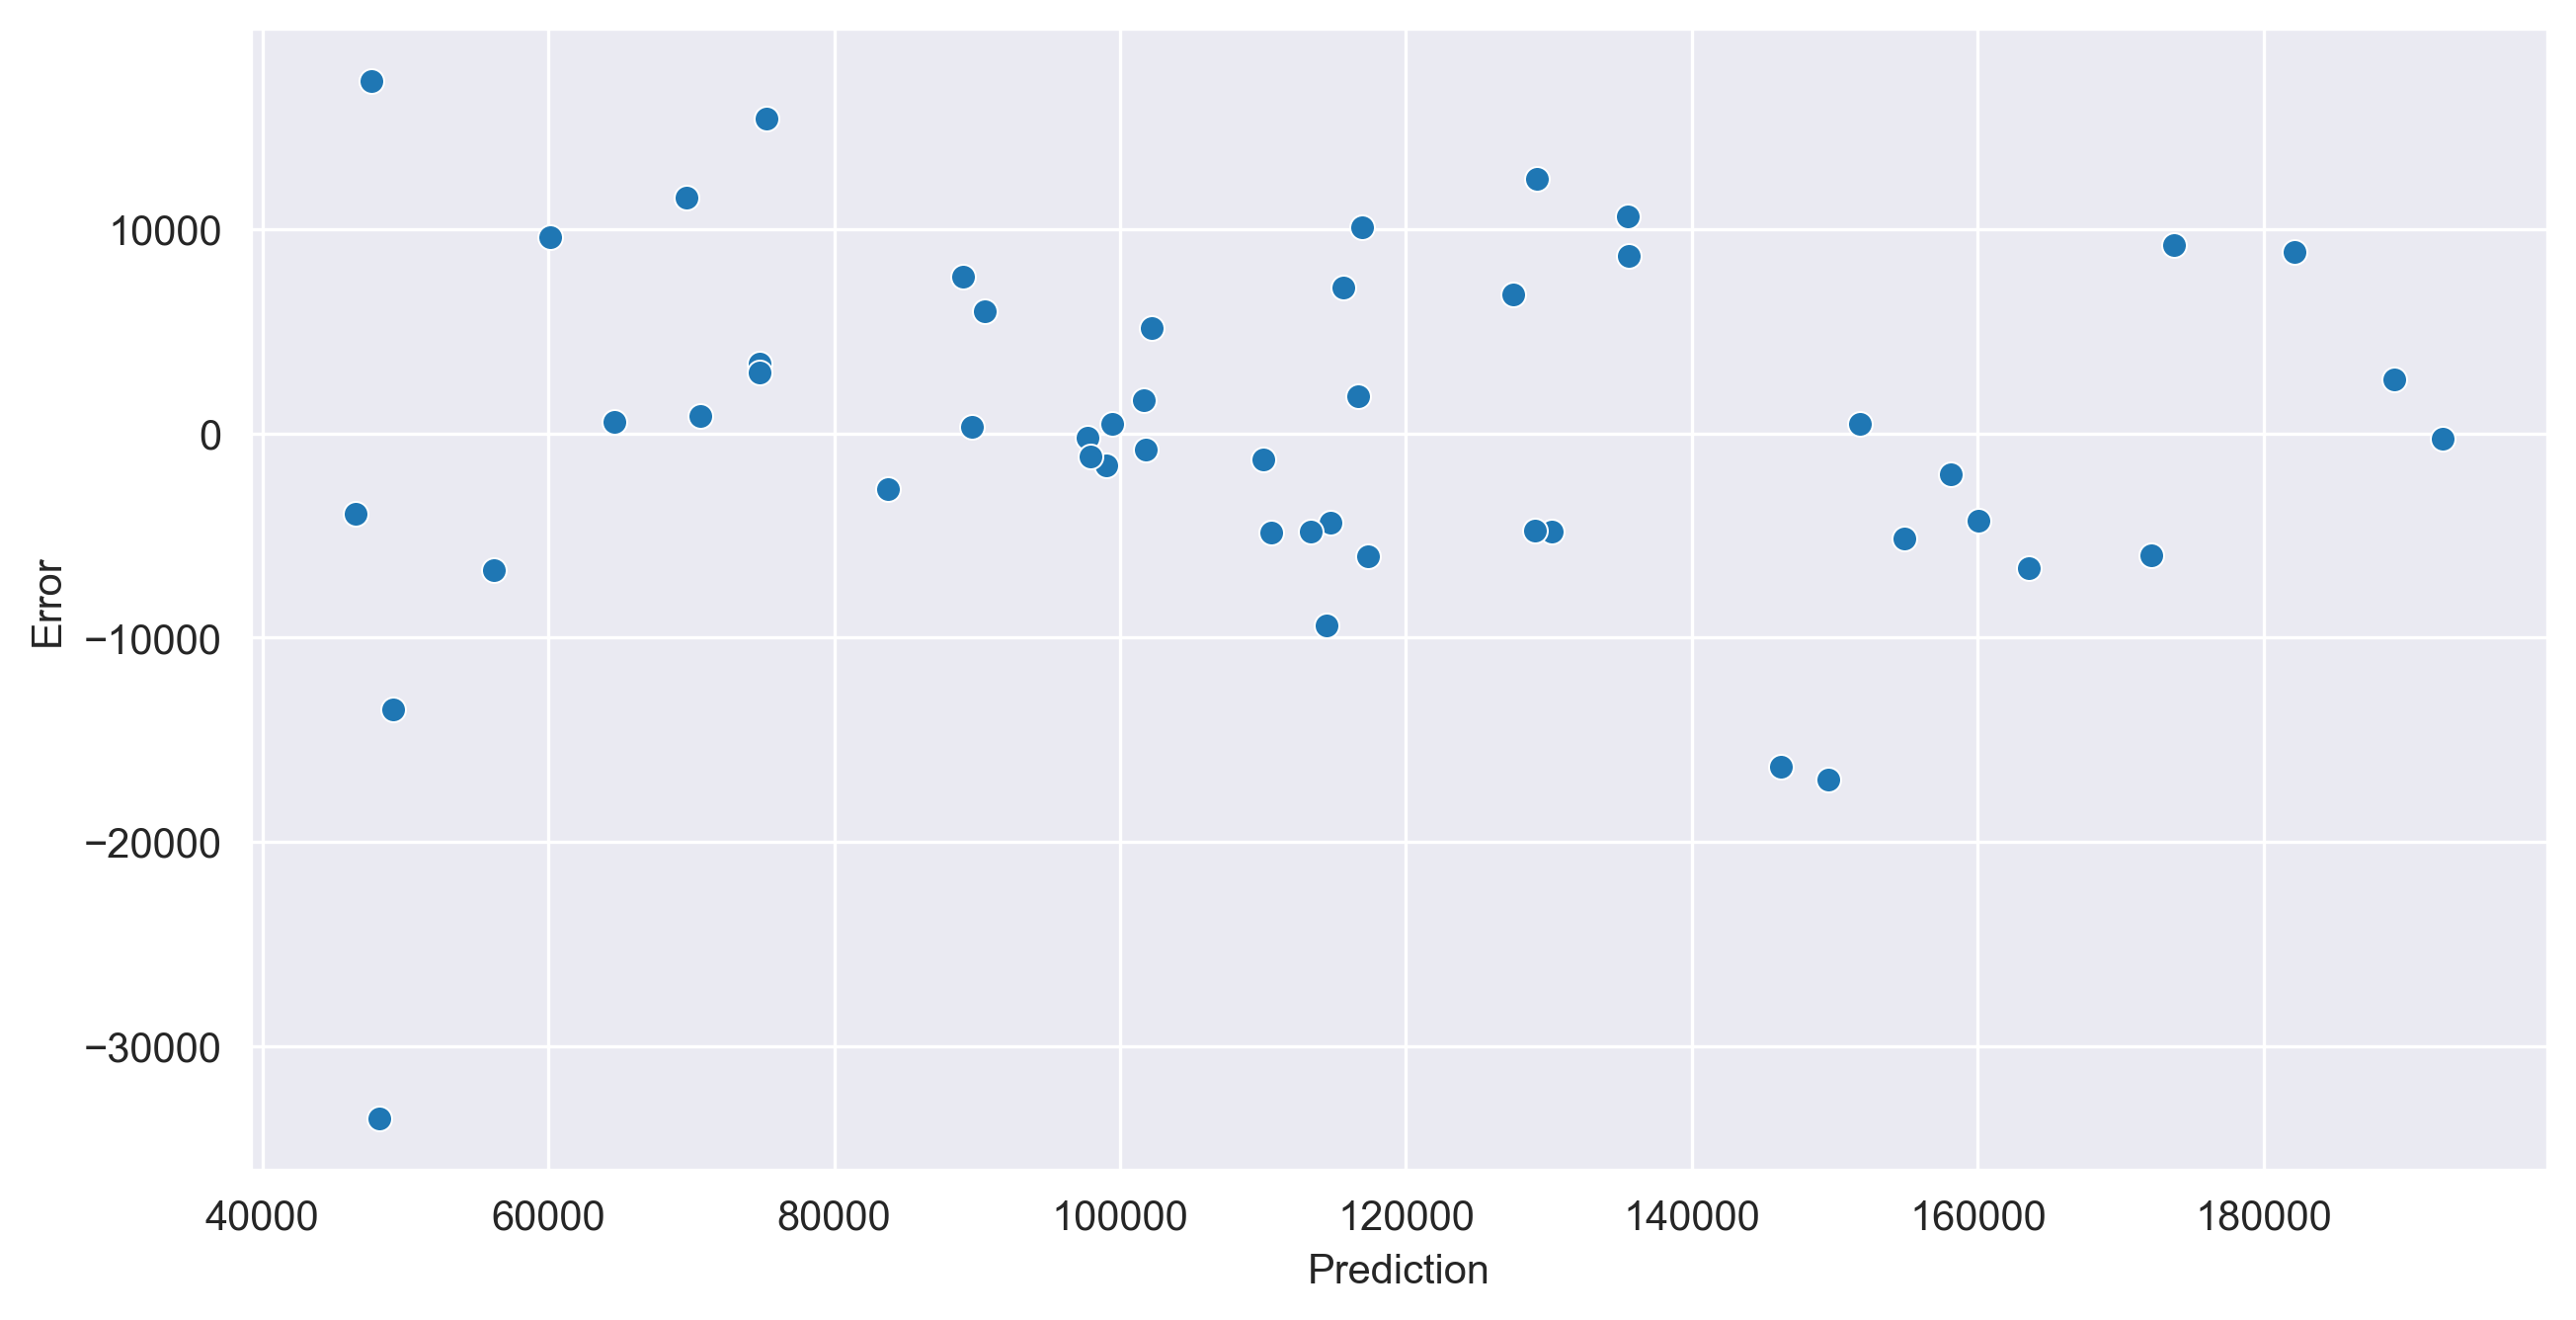

In [29]:
sns.scatterplot(x = model.fittedvalues , y = model.resid)
plt.xlabel('Prediction')
plt.ylabel('Error')

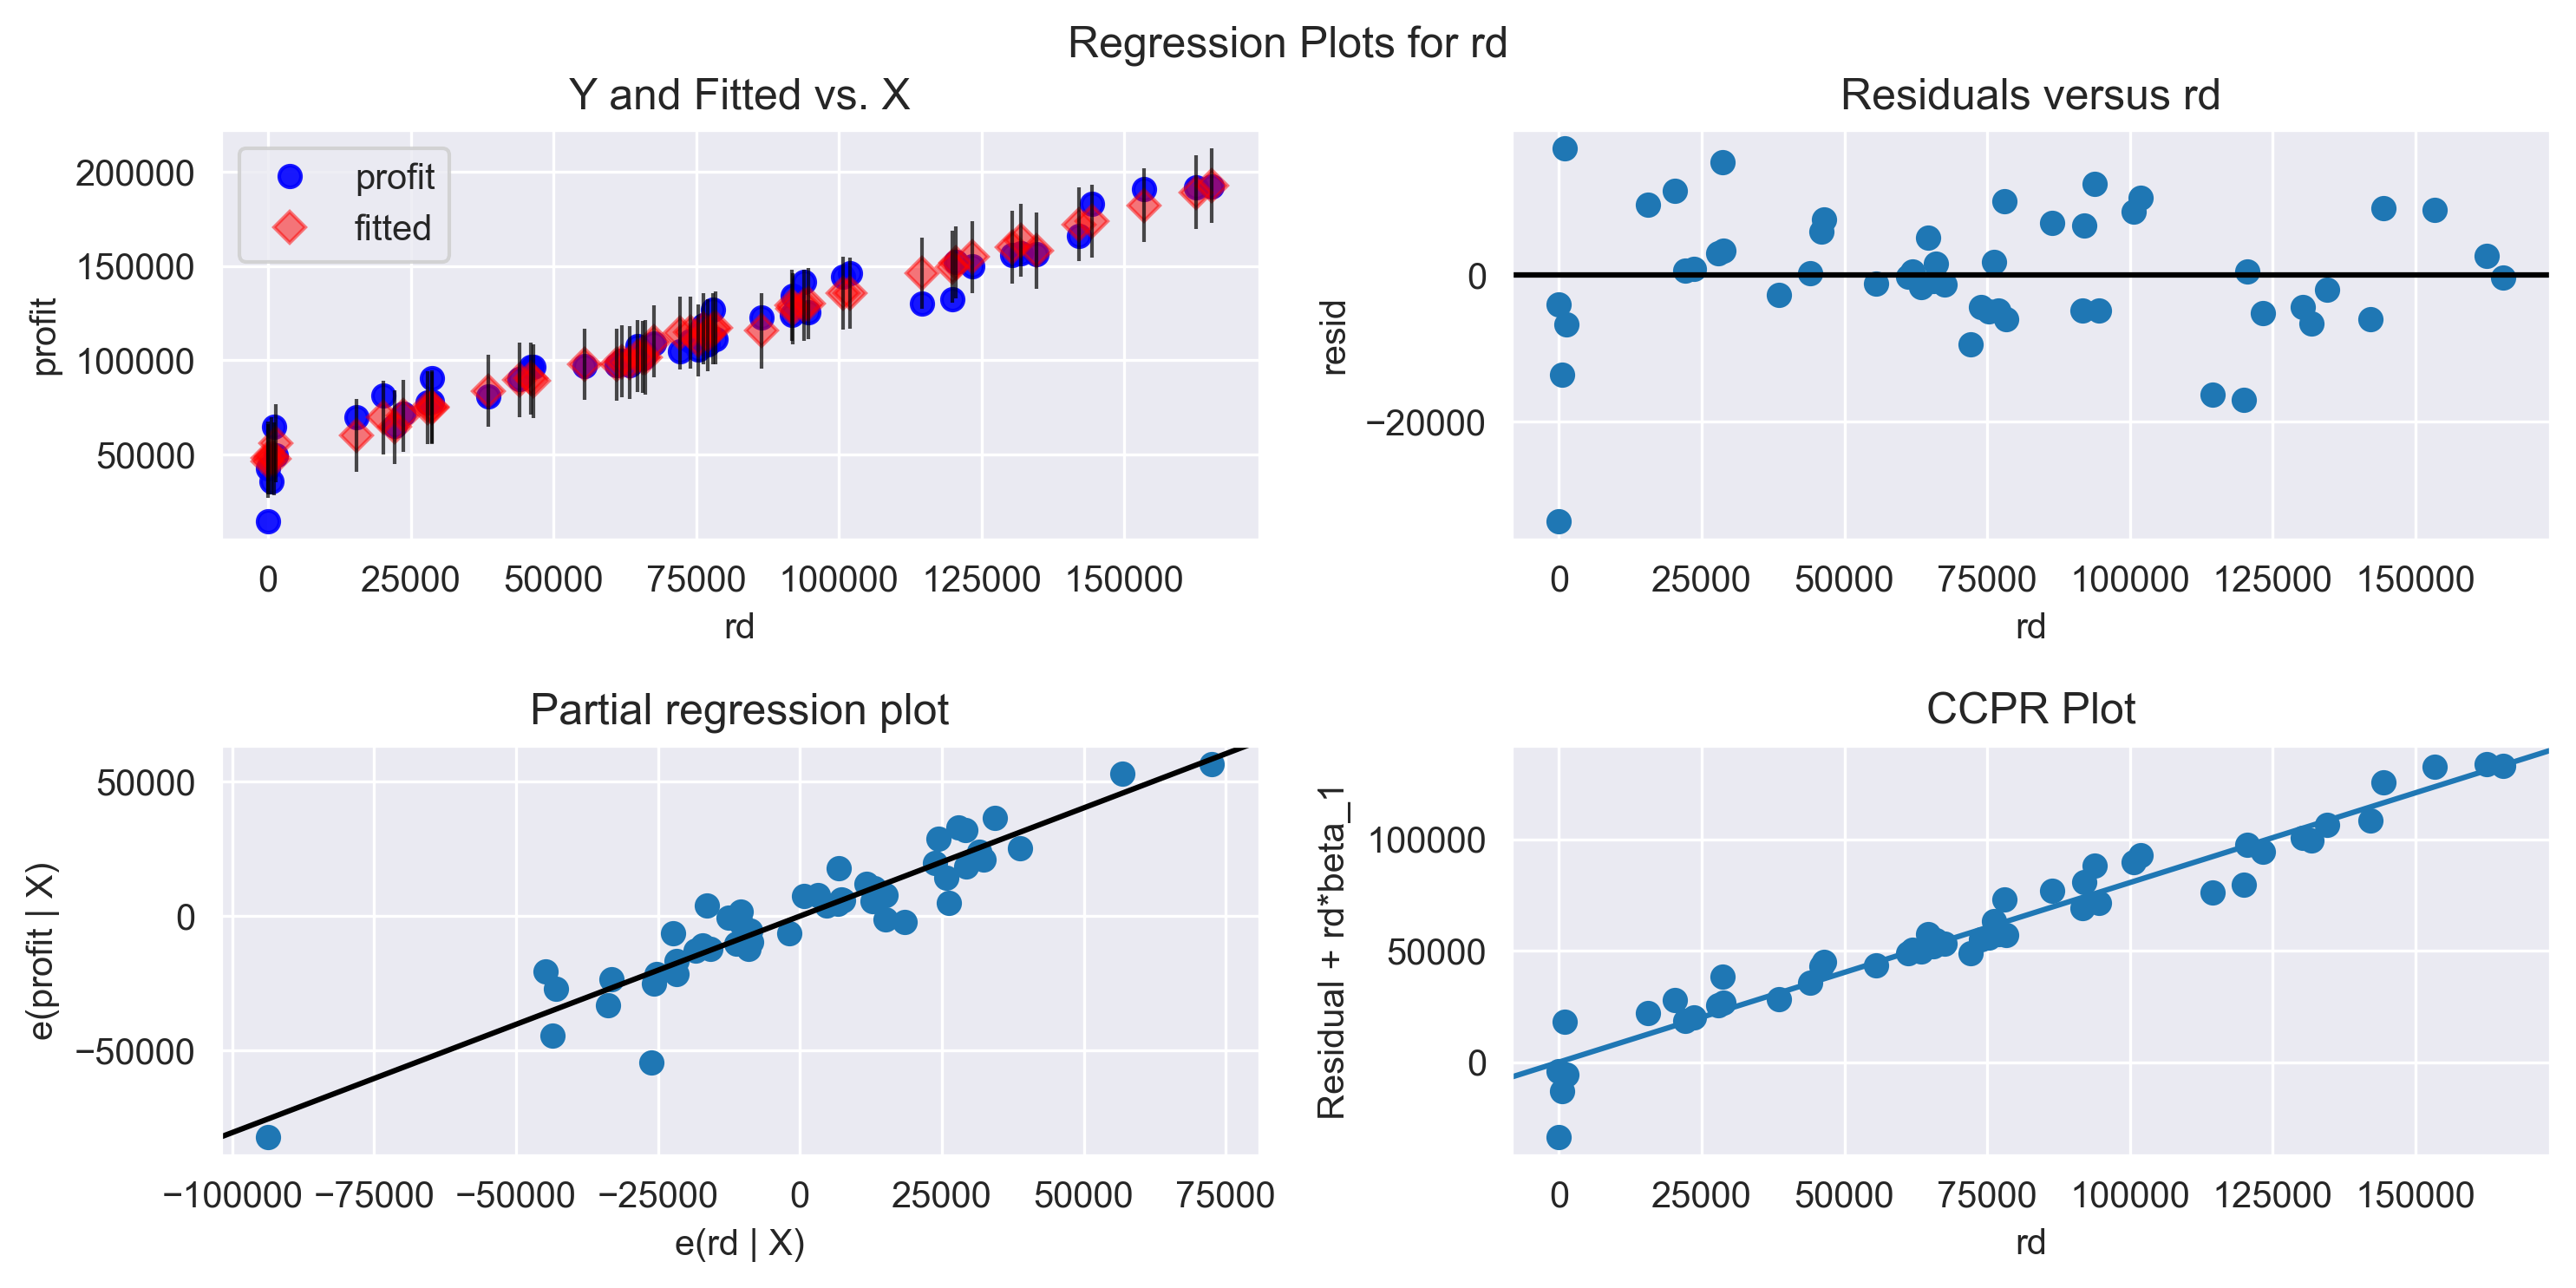

In [30]:
sm.graphics.plot_regress_exog(model , 'rd');

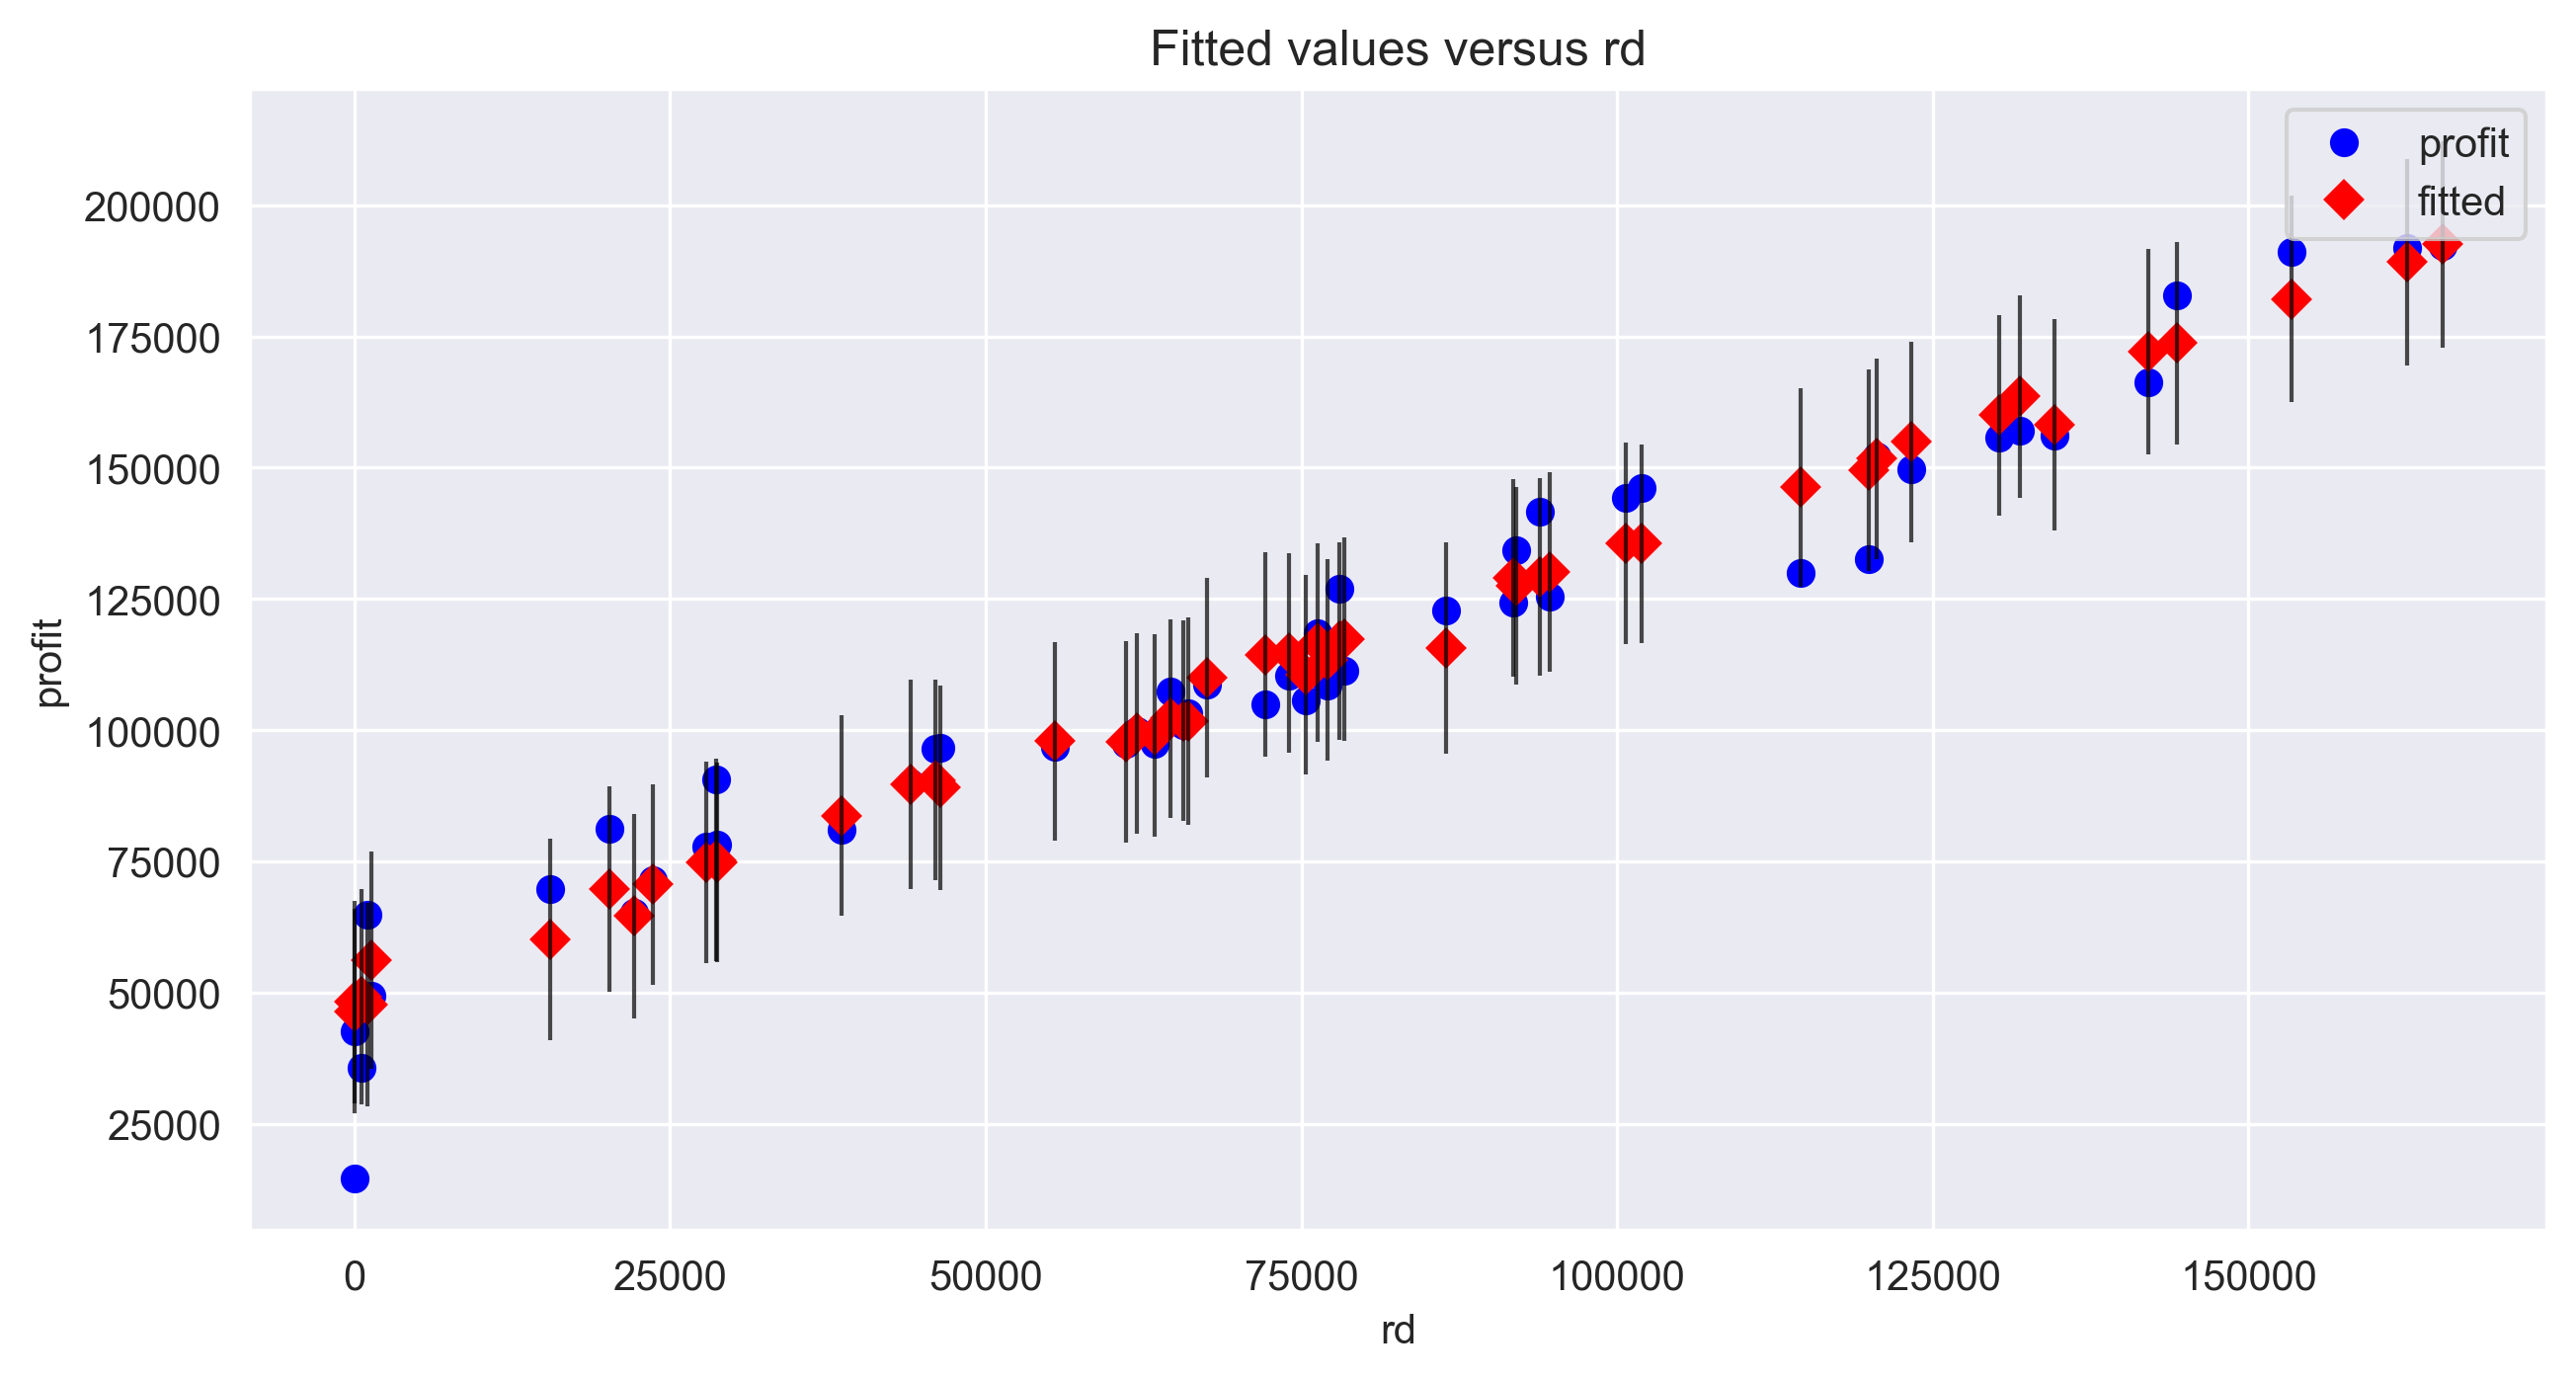

In [31]:
sm.graphics.plot_fit(model , 'rd');

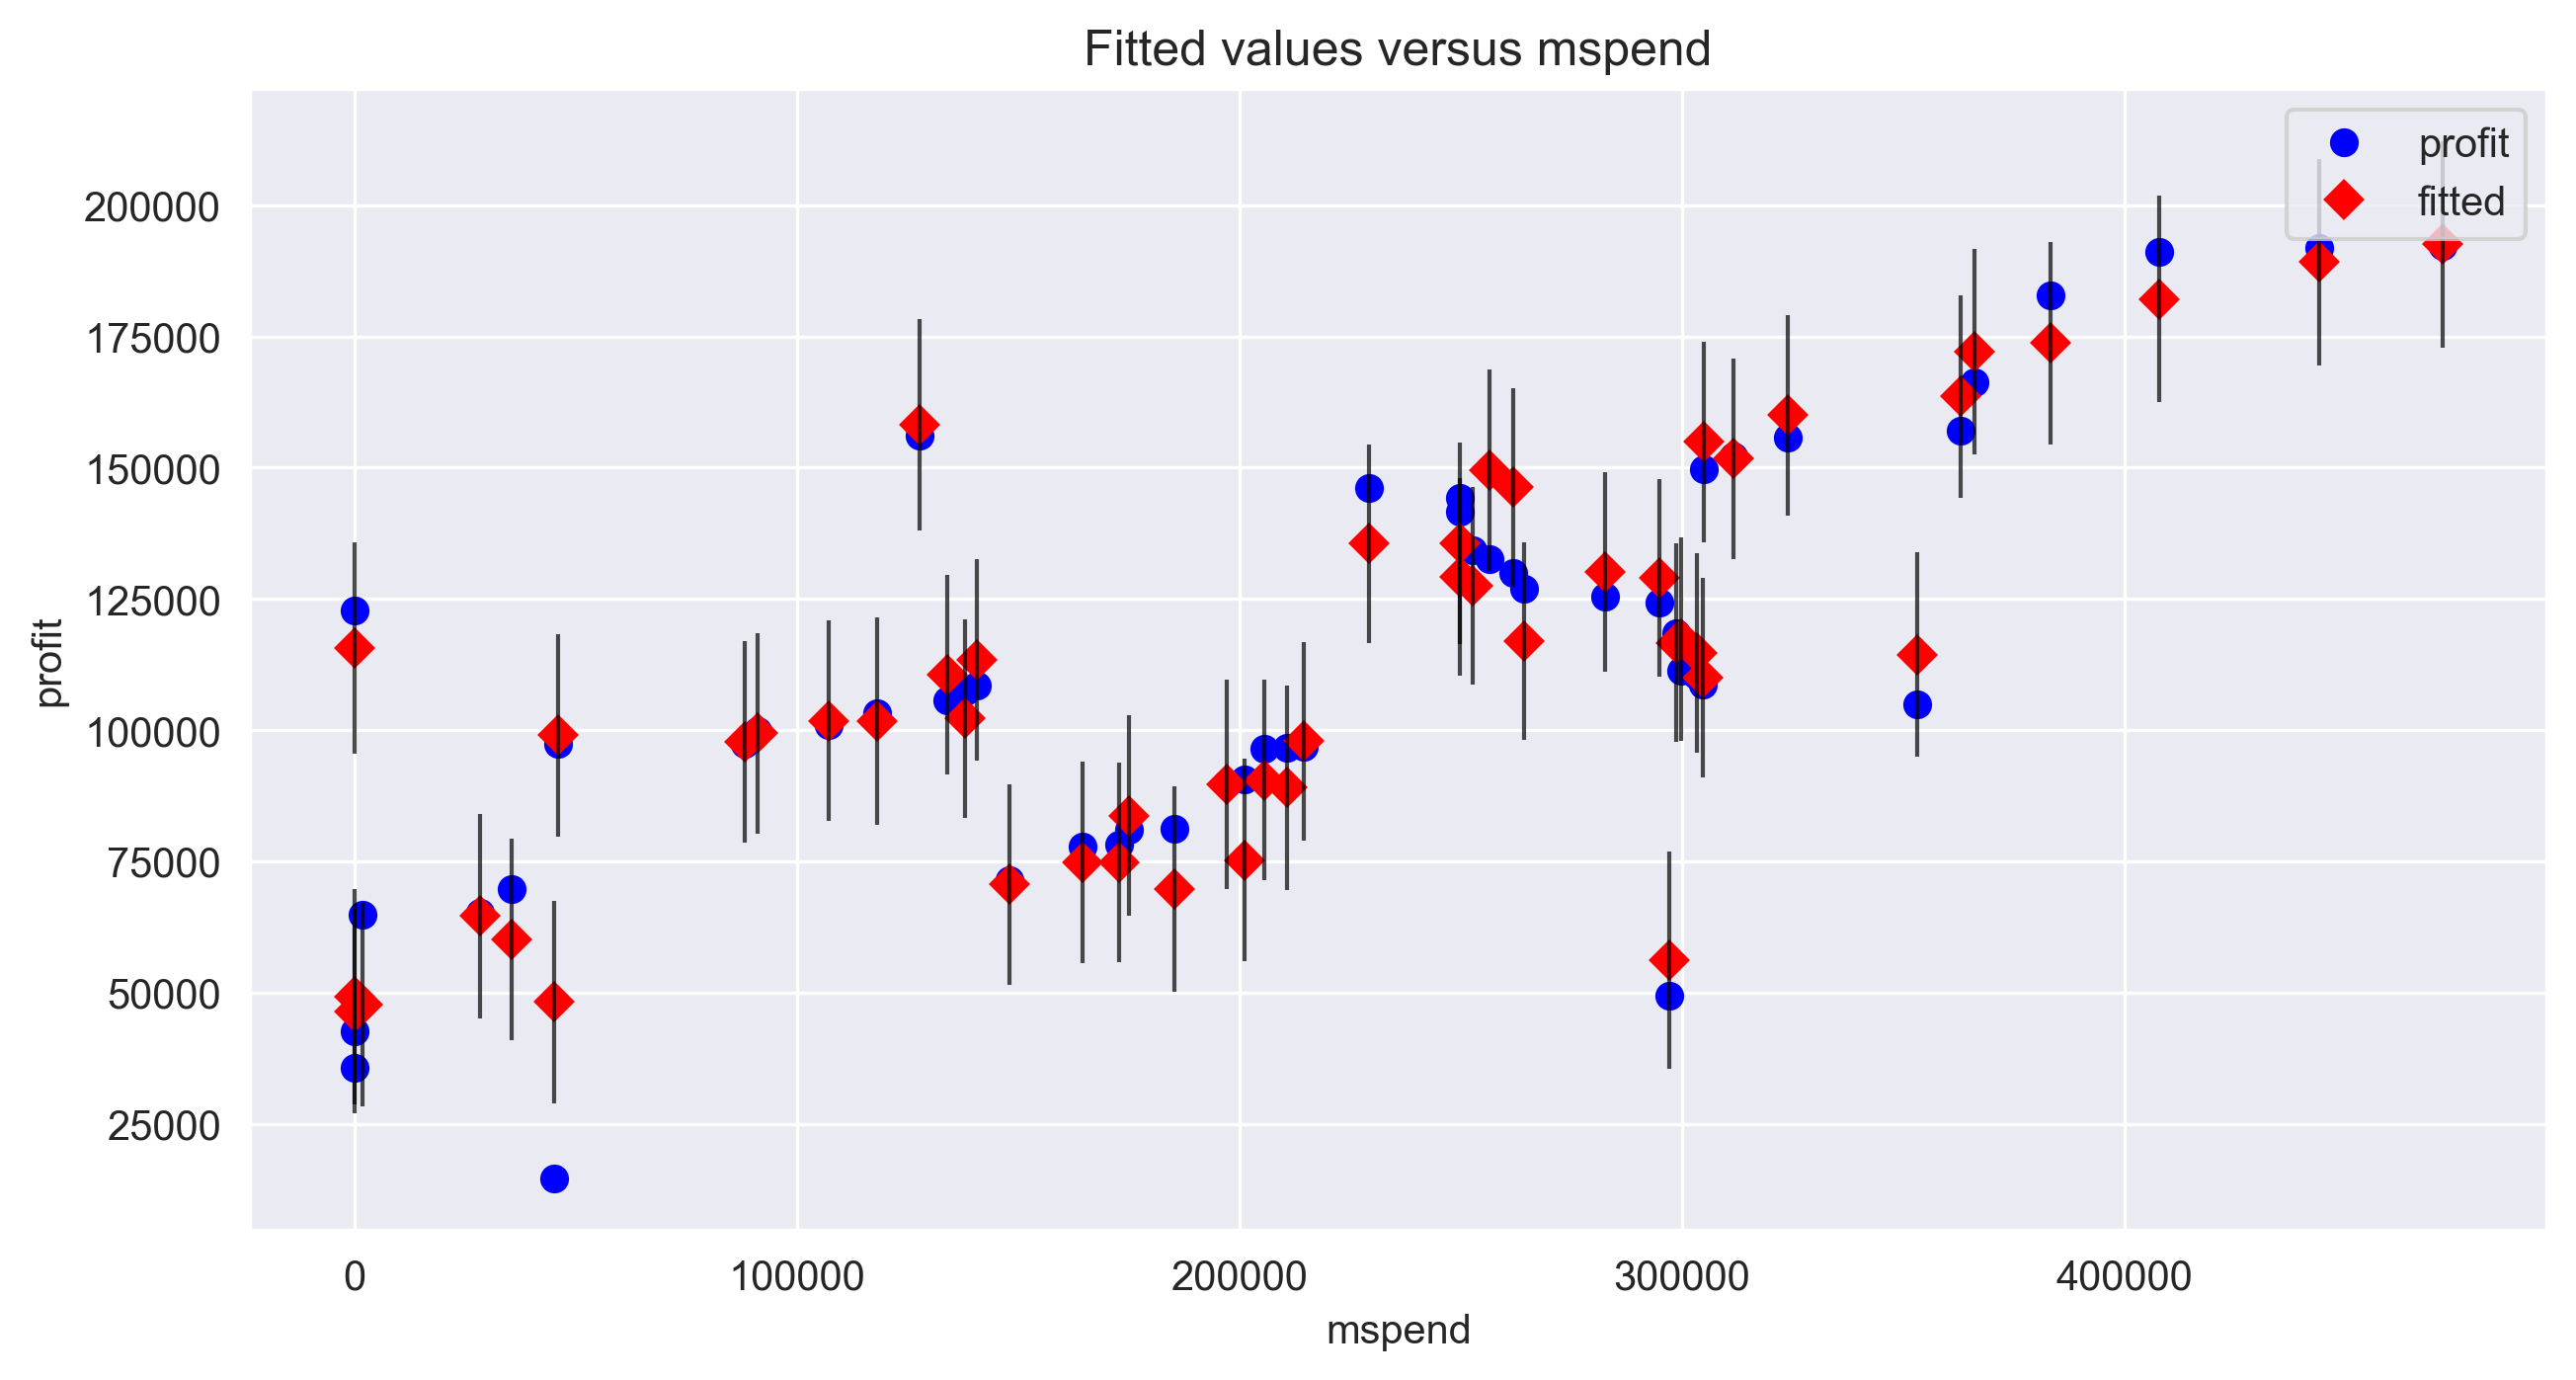

In [32]:
sm.graphics.plot_fit(model , 'mspend');

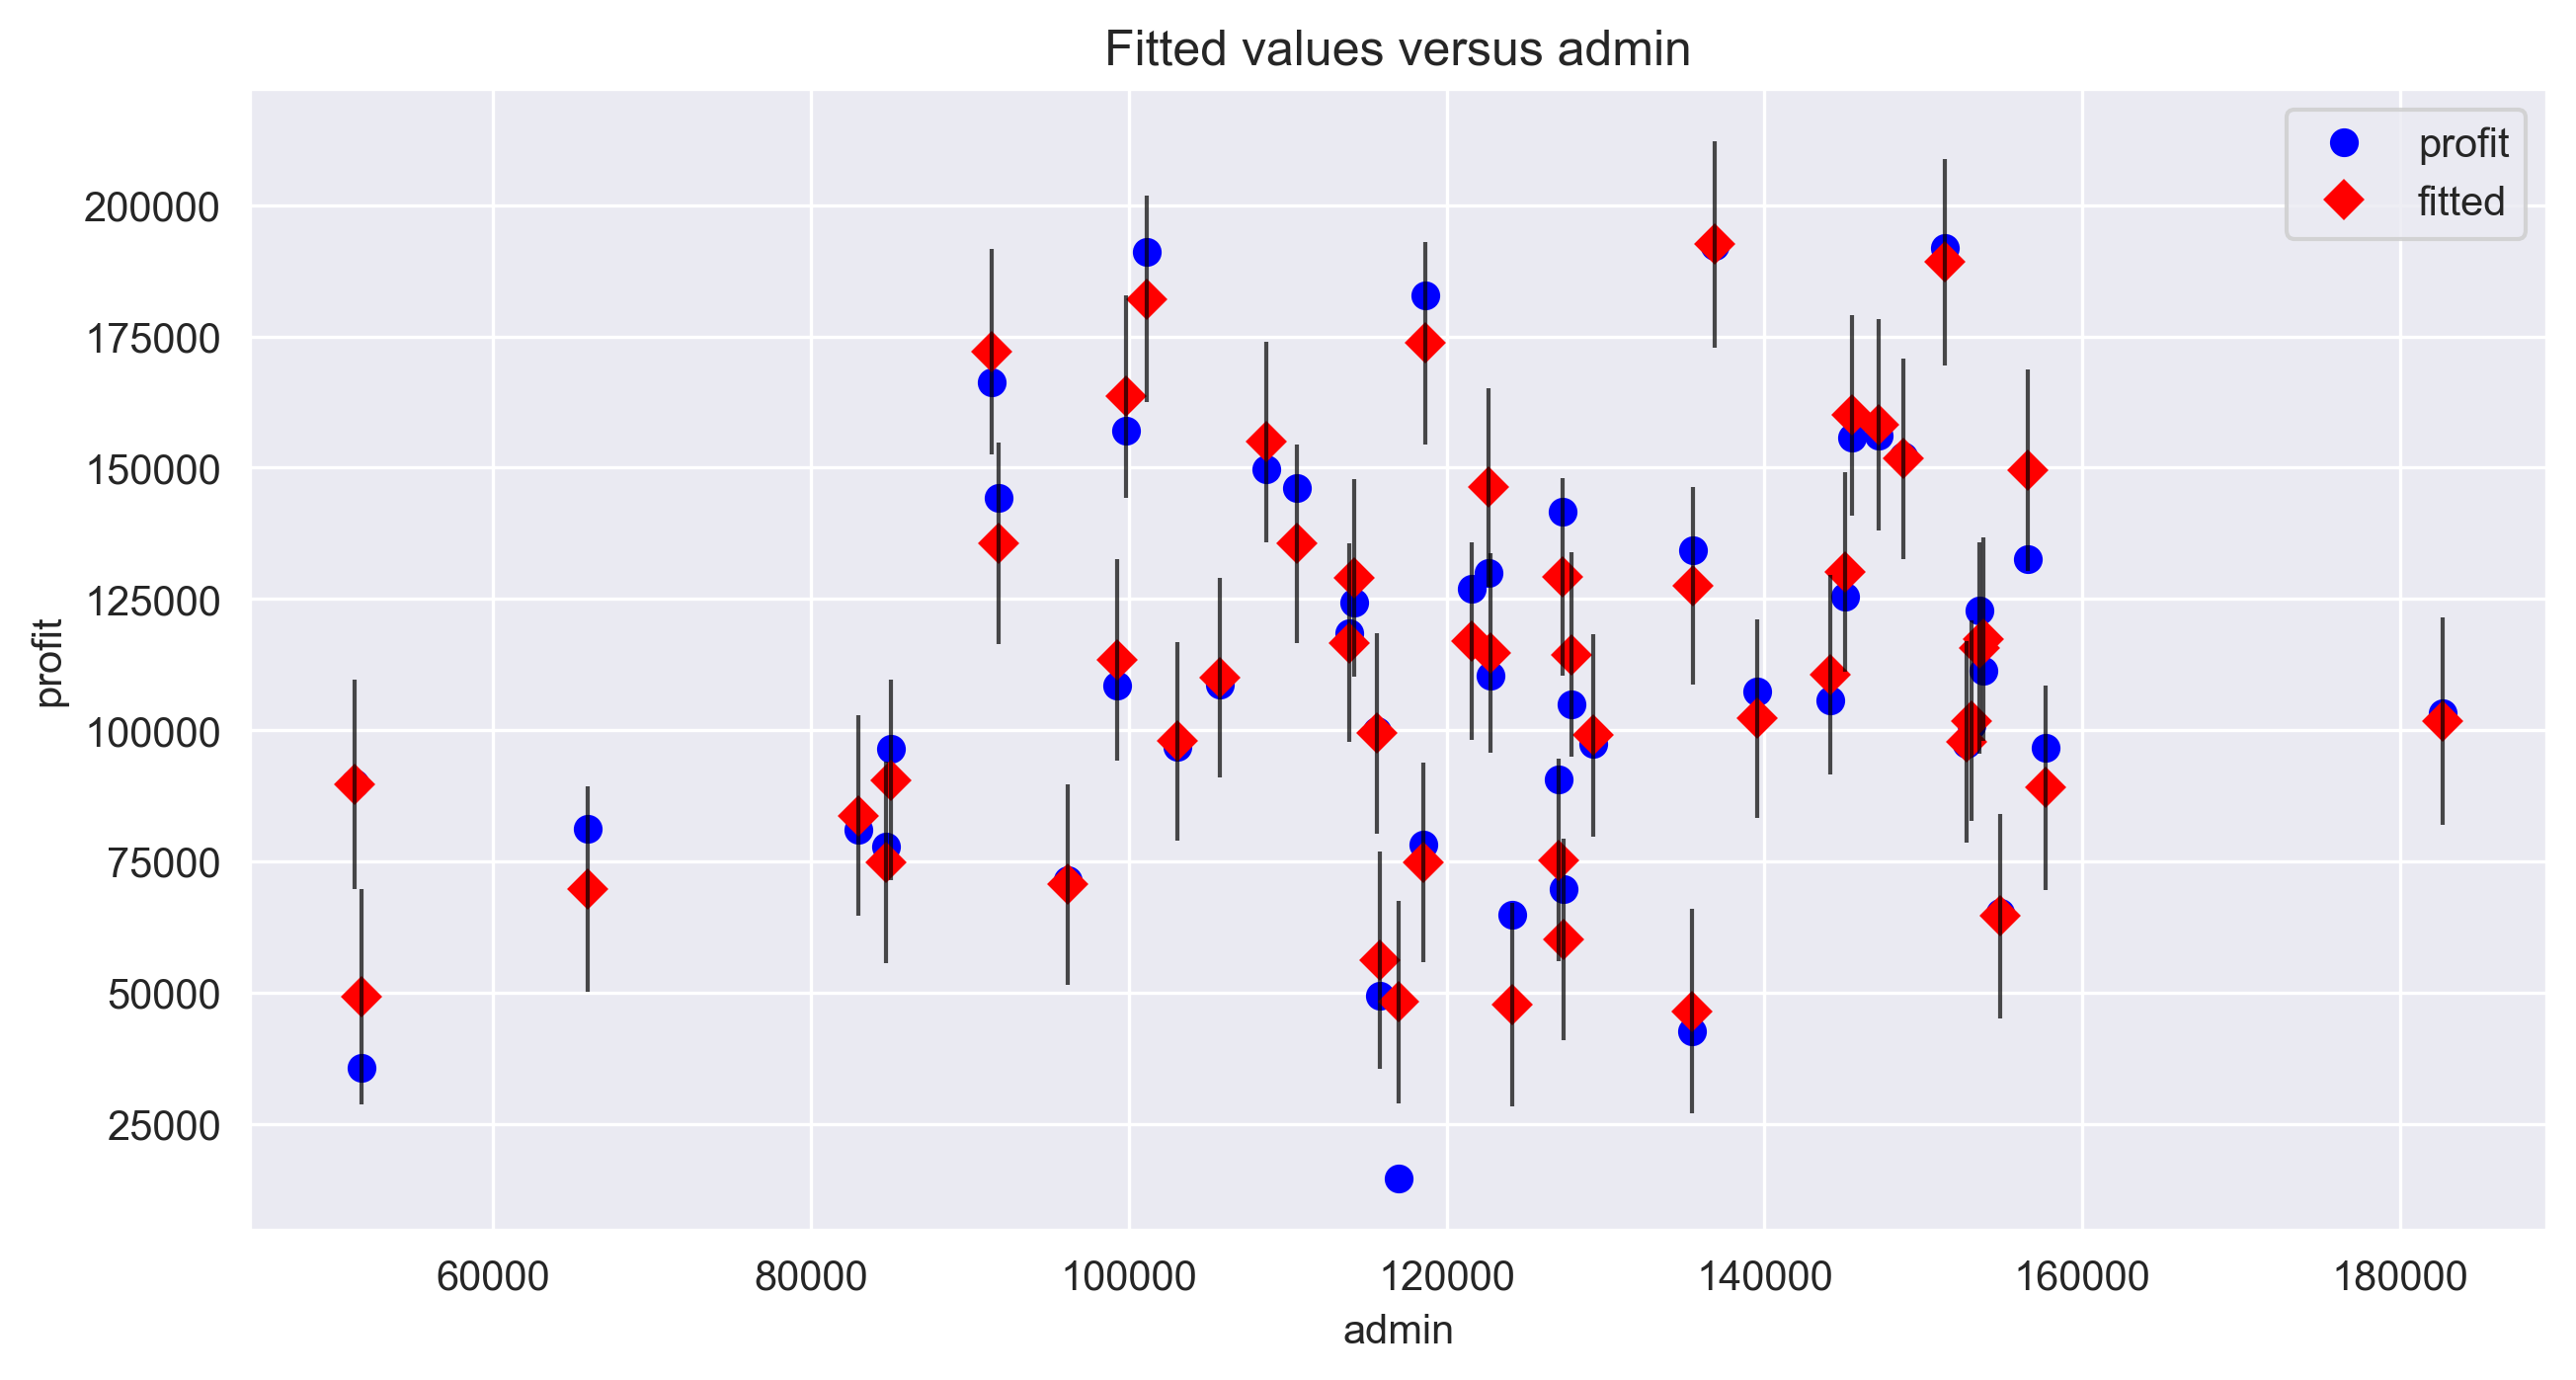

In [33]:
sm.graphics.plot_fit(model , 'admin');

In [34]:
model

In [35]:
inf = model.get_influence()

c , p = inf.cooks_distance

In [36]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

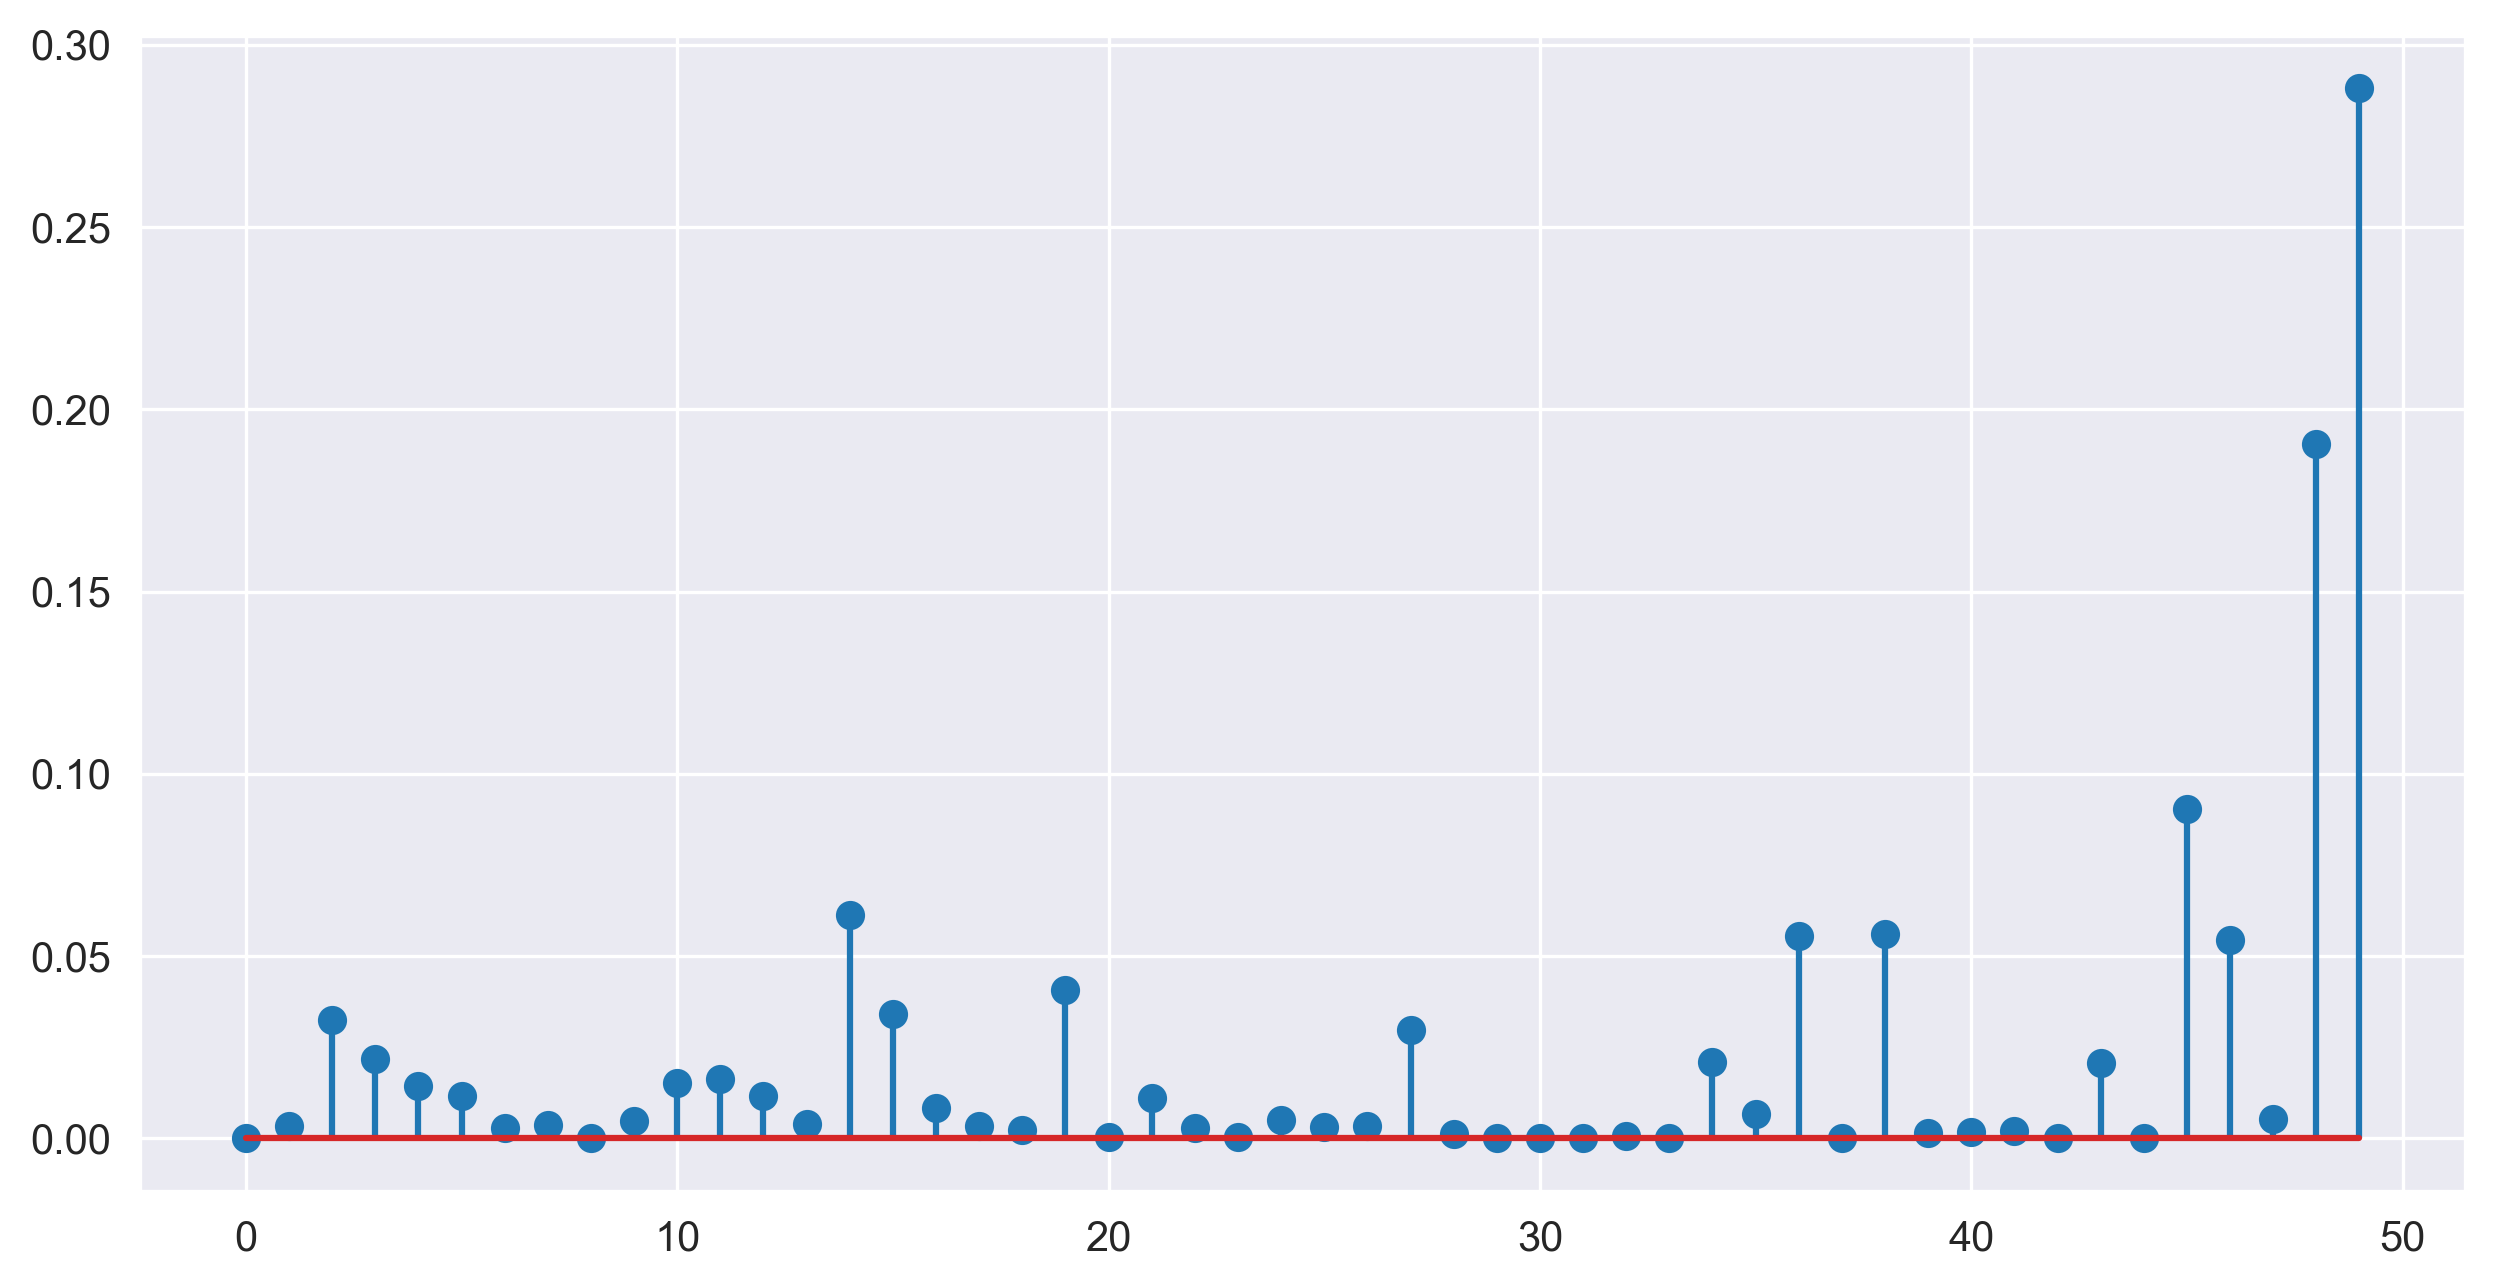

In [37]:
plt.stem(c)
plt.xlabel = 'Index'
plt.ylabel = 'Cooks_Distance'

In [38]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

In [39]:
df.iloc[[49]]

rd     admin    mspend   profit
49  0.0  116983.8  45173.06  14681.4

In [40]:
df[df['rd'] == 0]

rd      admin    mspend    profit
47  0.0  135426.92      0.00  42559.73
49  0.0  116983.80  45173.06  14681.40

In [41]:
df.head()

rd      admin     mspend     profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [42]:
from statsmodels.graphics.regressionplots import influence_plot

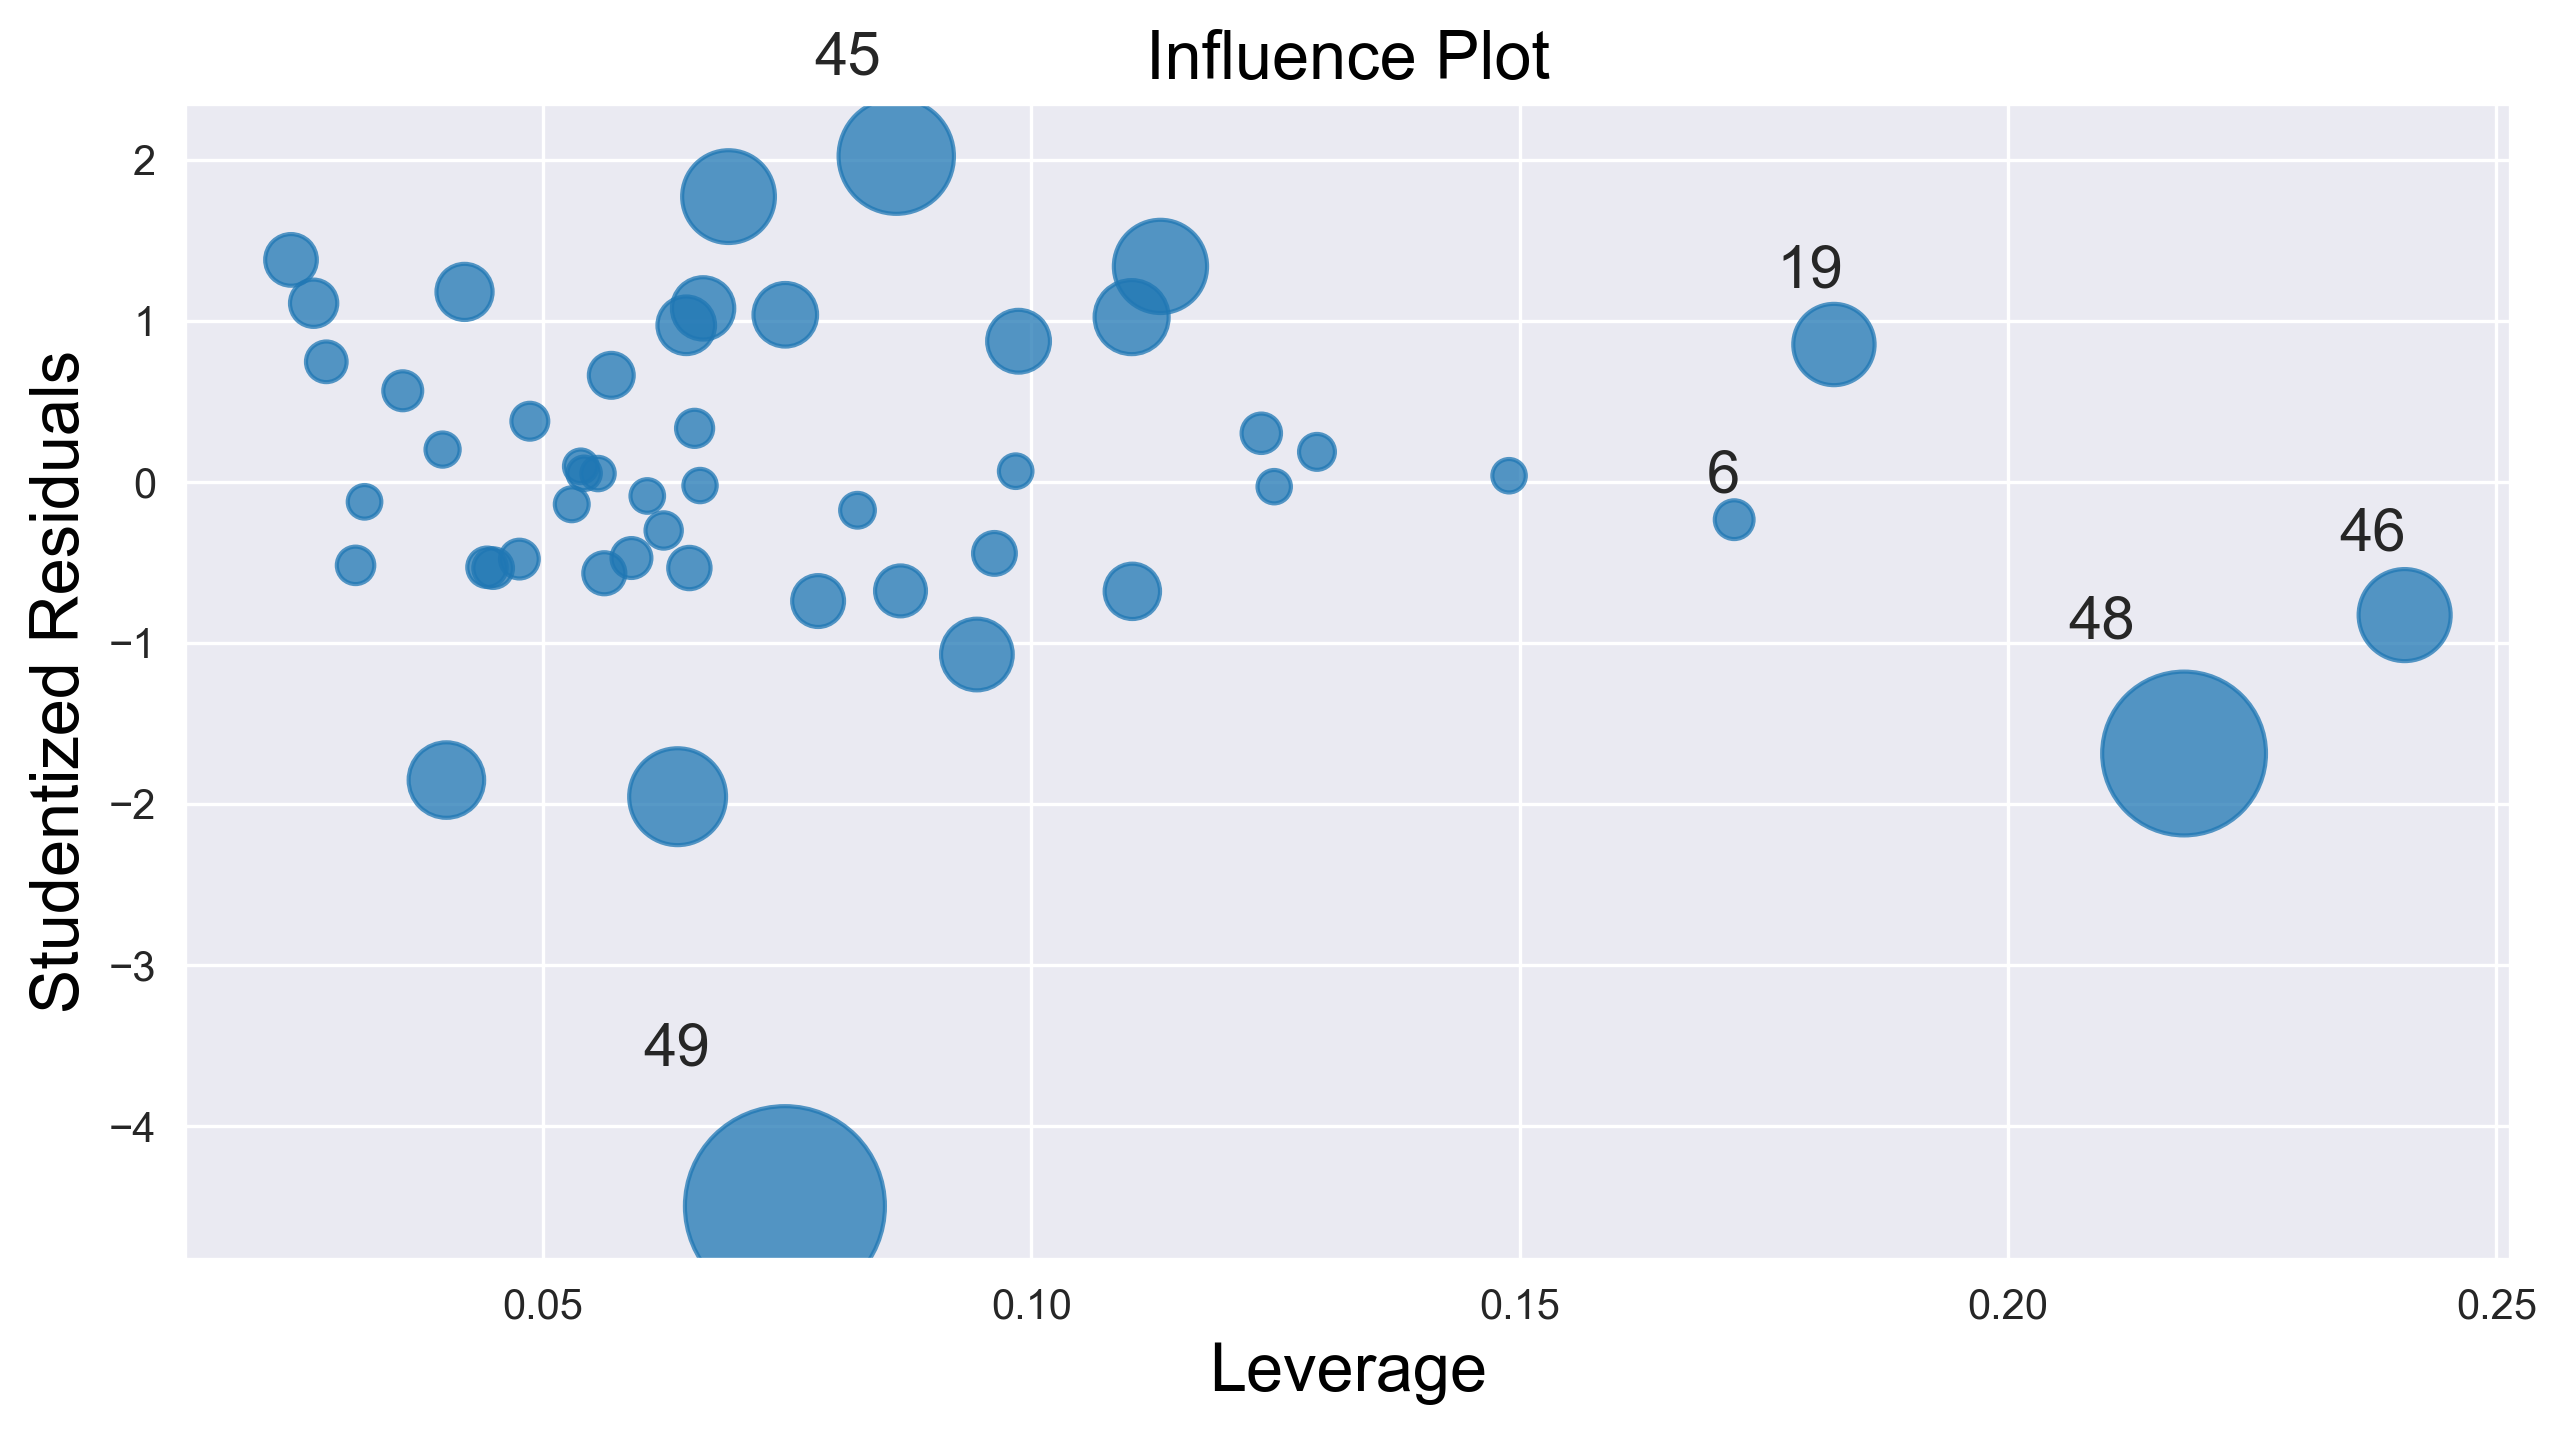

In [43]:
influence_plot(model);

In [44]:
k = len(df.columns)
n = len(df)

lv = (3)*(k+1)/n
lv

0.3

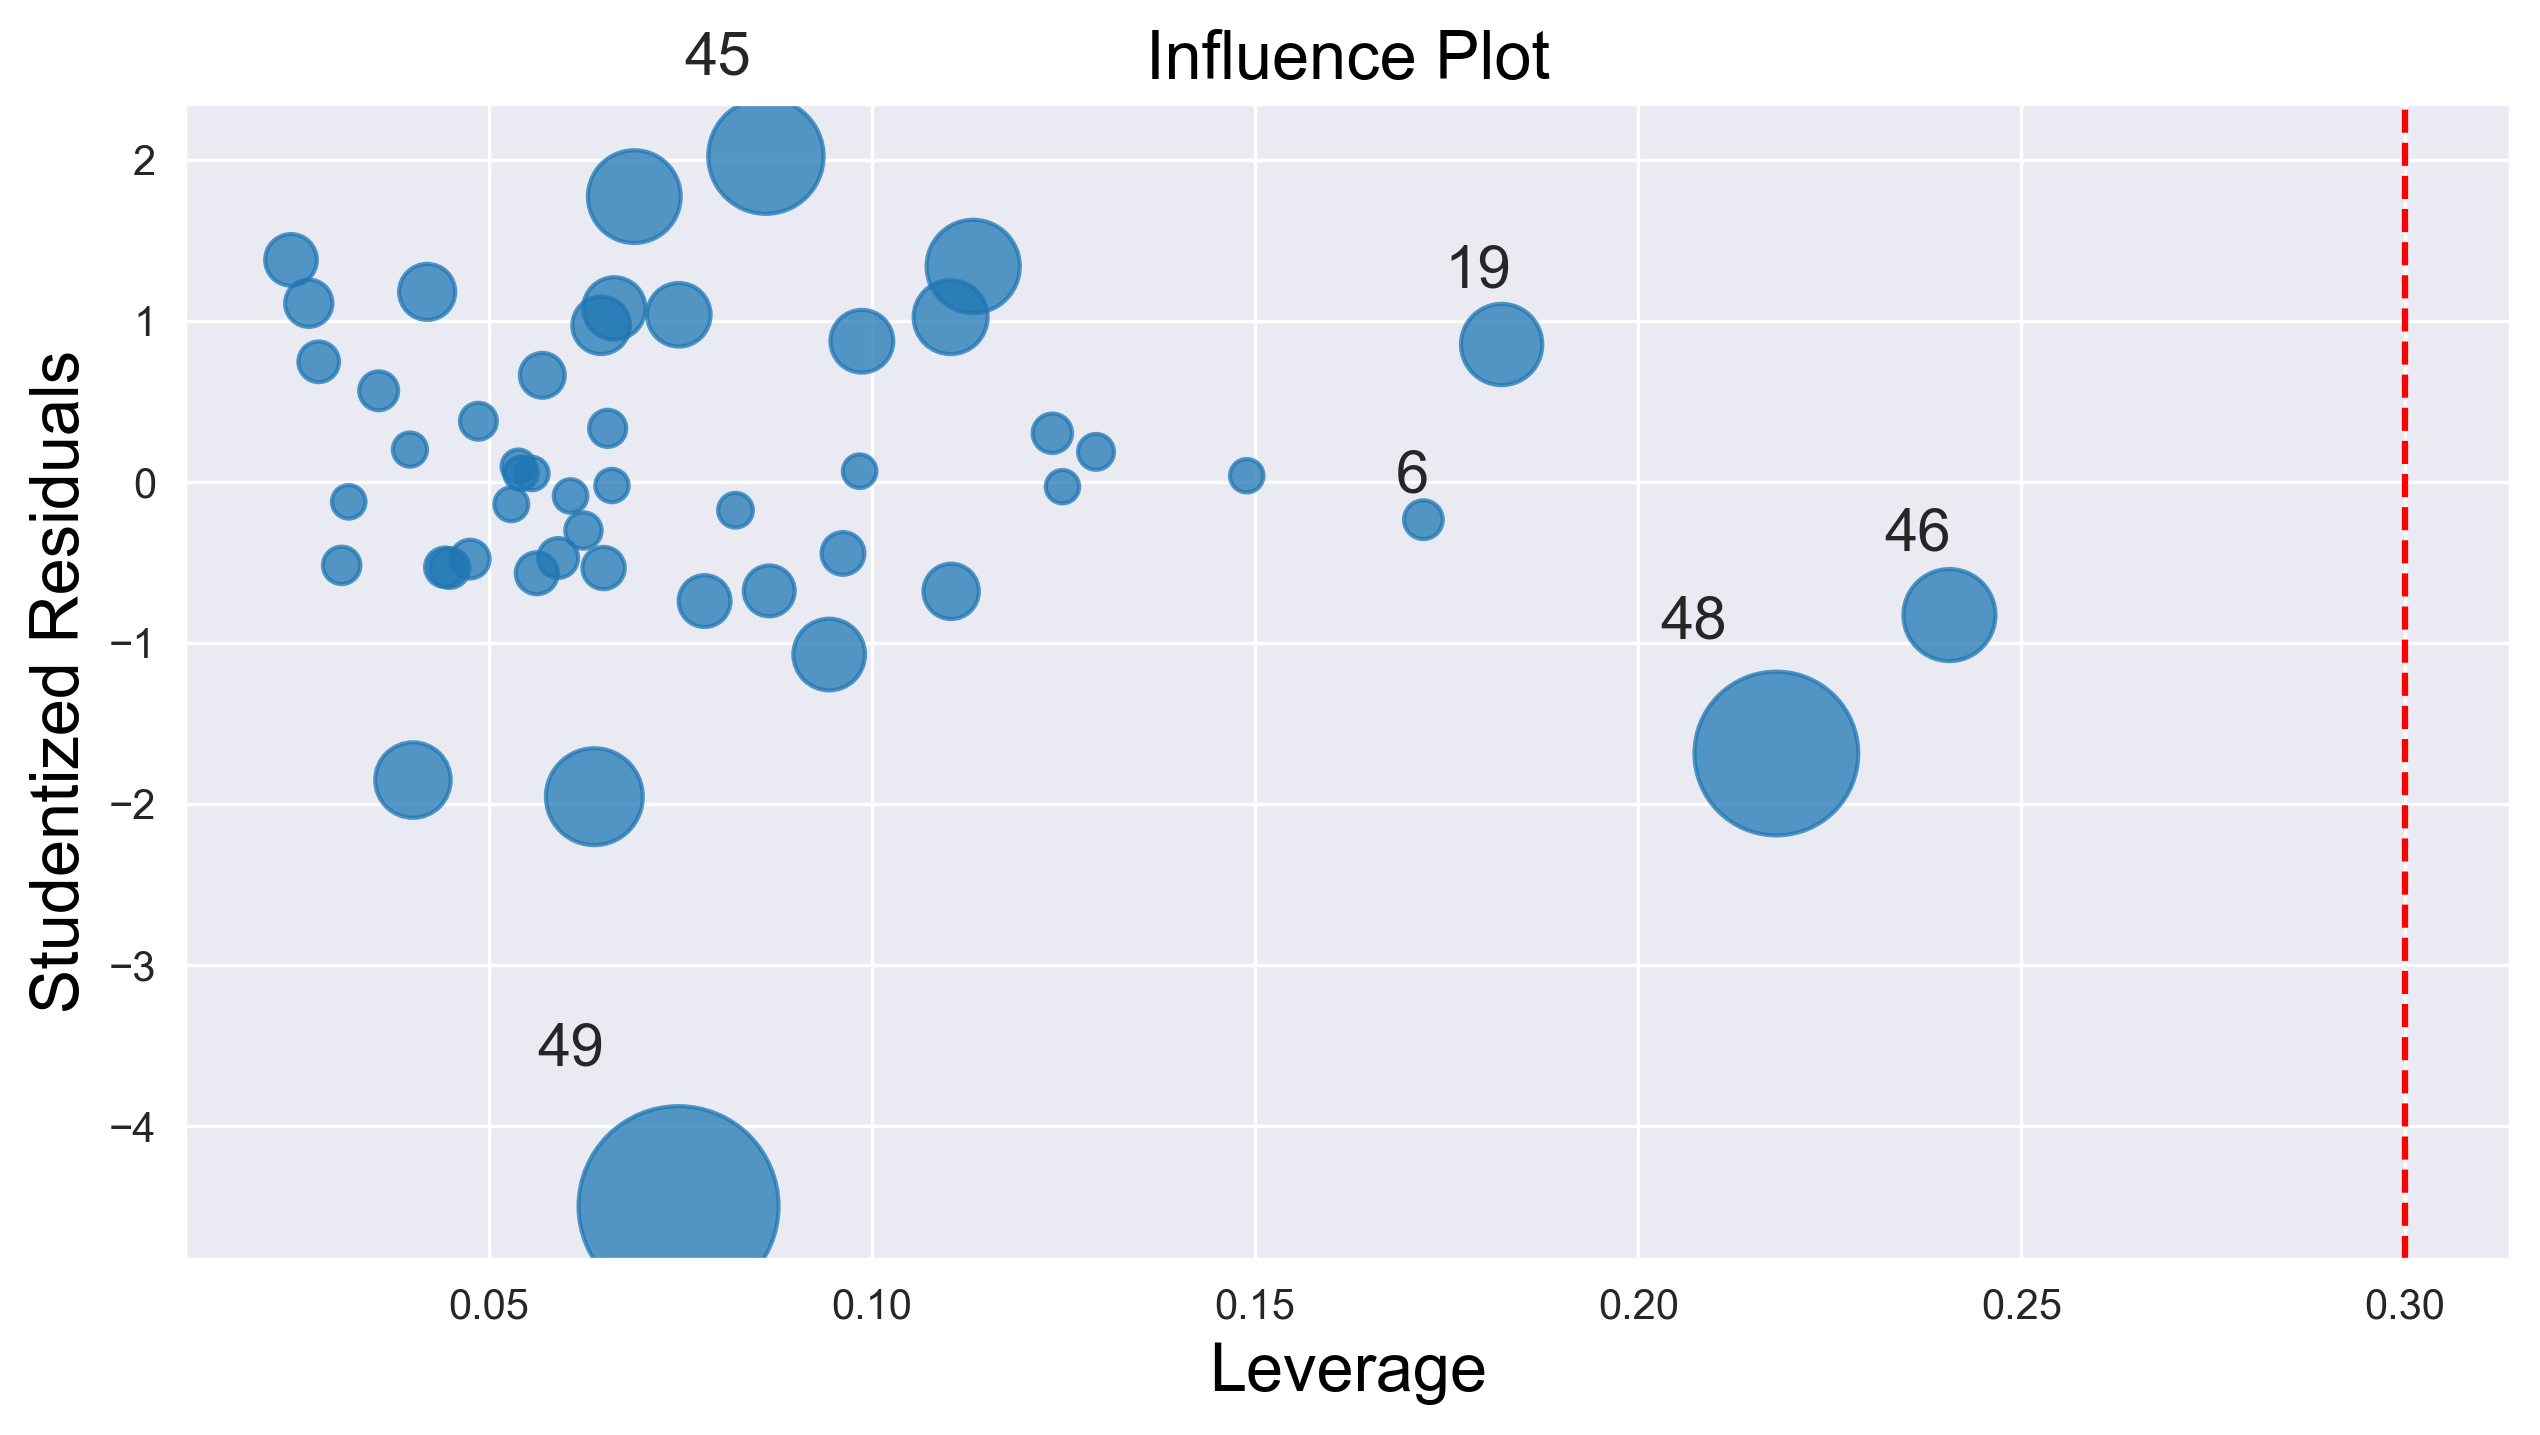

In [45]:
influence_plot(model)
plt.axvline(lv , linestyle = '--' , color = 'red')

In [46]:
df.drop(index=[47 , 49] , inplace= True)


In [47]:
df.reset_index(inplace=True)
df

index         rd      admin     mspend     profit
0       0  165349.20  136897.80  471784.10  192261.83
1       1  162597.70  151377.59  443898.53  191792.06
2       2  153441.51  101145.55  407934.54  191050.39
3       3  144372.41  118671.85  383199.62  182901.99
4       4  142107.34   91391.77  366168.42  166187.94
5       5  131876.90   99814.71  362861.36  156991.12
6       6  134615.46  147198.87  127716.82  156122.51
7       7  130298.13  145530.06  323876.68  155752.60
8       8  120542.52  148718.95  311613.29  152211.77
9       9  123334.88  108679.17  304981.62  149759.96
10     10  101913.08  110594.11  229160.95  146121.95
11     11  100671.96   91790.61  249744.55  144259.40
12     12   93863.75  127320.38  249839.44  141585.52
13     13   91992.39  135495.07  252664.93  134307.35
14     14  119943.24  156547.42  256512.92  132602.65
15     15  114523.61  122616.84  261776.23  129917.04
16     16   78013.11  121597.55  264346.06  126992.93
17     17   94657.16  145077.58  282574.31  125370.37
18     18   91749.16  114175.79  294919.57  124266.90
19     19   86419.70  153514.11       0.00  122776.86
20     20   76253.86  113867.30  298664.47  118474.03
21     21   78389.47  153773.43  299737.29  111313.02
22     22   73994.56  122782.75  303319.26  110352.25
23     23   67532.53  105751.03  304768.73  108733.99
24     24   77044.01   99281.34  140574.81  108552.04
25     25   64664.71  139553.16  137962.62  107404.34
26     26   75328.87  144135.98  134050.07  105733.54
27     27   72107.60  127864.55  353183.81  105008.31
28     28   66051.52  182645.56  118148.20  103282.38
29     29   65605.48  153032.06  107138.38  101004.64
30     30   61994.48  115641.28   91131.24   99937.59
31     31   61136.38  152701.92   88218.23   97483.56
32     32   63408.86  129219.61   46085.25   97427.84
33     33   55493.95  103057.49  214634.81   96778.92
34     34   46426.07  157693.92  210797.67   96712.80
35     35   46014.02   85047.44  205517.64   96479.51
36     36   28663.76  127056.21  201126.82   90708.19
37     37   44069.95   51283.14  197029.42   89949.14
38     38   20229.59   65947.93  185265.10   81229.06
39     39   38558.51   82982.09  174999.30   81005.76
40     40   28754.33  118546.05  172795.67   78239.91
41     41   27892.92   84710.77  164470.71   77798.83
42     42   23640.93   96189.63  148001.11   71498.49
43     43   15505.73  127382.30   35534.17   69758.98
44     44   22177.74  154806.14   28334.72   65200.33
45     45    1000.23  124153.04    1903.93   64926.08
46     46    1315.46  115816.21  297114.46   49490.75
47     48     542.05   51743.15       0.00   35673.41

In [48]:
df.head()

index         rd      admin     mspend     profit
0      0  165349.20  136897.80  471784.10  192261.83
1      1  162597.70  151377.59  443898.53  191792.06
2      2  153441.51  101145.55  407934.54  191050.39
3      3  144372.41  118671.85  383199.62  182901.99
4      4  142107.34   91391.77  366168.42  166187.94

In [49]:
df.drop(columns='index' , inplace= True)

In [50]:
df

rd      admin     mspend     profit
0   165349.20  136897.80  471784.10  192261.83
1   162597.70  151377.59  443898.53  191792.06
2   153441.51  101145.55  407934.54  191050.39
3   144372.41  118671.85  383199.62  182901.99
4   142107.34   91391.77  366168.42  166187.94
5   131876.90   99814.71  362861.36  156991.12
6   134615.46  147198.87  127716.82  156122.51
7   130298.13  145530.06  323876.68  155752.60
8   120542.52  148718.95  311613.29  152211.77
9   123334.88  108679.17  304981.62  149759.96
10  101913.08  110594.11  229160.95  146121.95
11  100671.96   91790.61  249744.55  144259.40
12   93863.75  127320.38  249839.44  141585.52
13   91992.39  135495.07  252664.93  134307.35
14  119943.24  156547.42  256512.92  132602.65
15  114523.61  122616.84  261776.23  129917.04
16   78013.11  121597.55  264346.06  126992.93
17   94657.16  145077.58  282574.31  125370.37
18   91749.16  114175.79  294919.57  124266.90
19   86419.70  153514.11       0.00  122776.86
20   76253.86  113867.30  298664.47  118474.03
21   78389.47  153773.43  299737.29  111313.02
22   73994.56  122782.75  303319.26  110352.25
23   67532.53  105751.03  304768.73  108733.99
24   77044.01   99281.34  140574.81  108552.04
25   64664.71  139553.16  137962.62  107404.34
26   75328.87  144135.98  134050.07  105733.54
27   72107.60  127864.55  353183.81  105008.31
28   66051.52  182645.56  118148.20  103282.38
29   65605.48  153032.06  107138.38  101004.64
30   61994.48  115641.28   91131.24   99937.59
31   61136.38  152701.92   88218.23   97483.56
32   63408.86  129219.61   46085.25   97427.84
33   55493.95  103057.49  214634.81   96778.92
34   46426.07  157693.92  210797.67   96712.80
35   46014.02   85047.44  205517.64   96479.51
36   28663.76  127056.21  201126.82   90708.19
37   44069.95   51283.14  197029.42   89949.14
38   20229.59   65947.93  185265.10   81229.06
39   38558.51   82982.09  174999.30   81005.76
40   28754.33  118546.05  172795.67   78239.91
41   27892.92   84710.77  164470.71   77798.83
42   23640.93   96189.63  148001.11   71498.49
43   15505.73  127382.30   35534.17   69758.98
44   22177.74  154806.14   28334.72   65200.33
45    1000.23  124153.04    1903.93   64926.08
46    1315.46  115816.21  297114.46   49490.75
47     542.05   51743.15       0.00   35673.41

In [51]:
final_model = smf.ols('profit ~ rd + admin + mspend', data= df).fit()

In [52]:
model.rsquared

0.9507459940683246

In [53]:
final_model.rsquared , final_model.rsquared_adj

(0.9590028654650488, 0.9562076062922111)

In [54]:
df.head()

rd      admin     mspend     profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [55]:
test = pd.DataFrame({
    'rd' : [143556 , 153366 , 192001 ],
    'admin' : [101920 , 203010 , 465563],
    'mspend' : [456321,563214, 365214]
})

In [56]:
test

rd   admin  mspend
0  143556  101920  456321
1  153366  203010  563214
2  192001  465563  365214

In [57]:
final_model.params

Intercept    52585.483553
rd               0.778630
admin           -0.017917
mspend           0.024117
dtype: float64

In [58]:
model.predict(test)

0    175479.076955
1    183582.804880
2    202279.836053
dtype: float64

- table containing R^2 value for each prepared model

In [59]:
Table =pd.DataFrame ({
    'Prep_models' : ['Model' , 'Final_Model'],
    'R-2_Values' : [model.rsquared , final_model.rsquared]
})
Table

Prep_models  R-2_Values
0        Model    0.950746
1  Final_Model    0.959003

# Q2 →→→ANS

In [60]:
df = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\5_Multi_L_R\ToyotaCorolla.csv" , encoding= 'latin1')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [62]:
df.shape

(1436, 38)

In [63]:
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [64]:
df = pd.concat([df.iloc[:,2:4] , df.iloc[:, 6:7] , df.iloc[:,8: 9] , df.iloc[: , 12:14] , df.iloc[: , 15:18]] , axis=1)
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [65]:
df.columns = ['price' , 'age' , 'km' ,'hp',  'cc' , 'doors' , 'gears' , 'qt' , 'weight']
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [66]:
df[df.duplicated()]

price  age     km   hp    cc  doors  gears   qt  weight
113  24950    8  13253  116  2000      5      5  234    1320

In [67]:
df = df.drop_duplicates().reset_index(drop=True)
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [68]:
df.describe()

price          age             km           hp            cc  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             doors        gears           qt       weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

In [69]:
df.corr()

price       age        km        hp        cc     doors     gears  \
price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
km     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
hp      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
cc      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
qt      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              qt    weight  
price   0.211508  0.575869  
age    -0.193319 -0.466484  
km      0.283312 -0.023969  
hp     -0.302287  0.087143  
cc      0.305982  0.335077  
doors   0.107353  0.301734  
gears  -0.005125  0.021238  
qt      1.000000  0.621988  
weight  0.621988  1.000000

<Axes: >

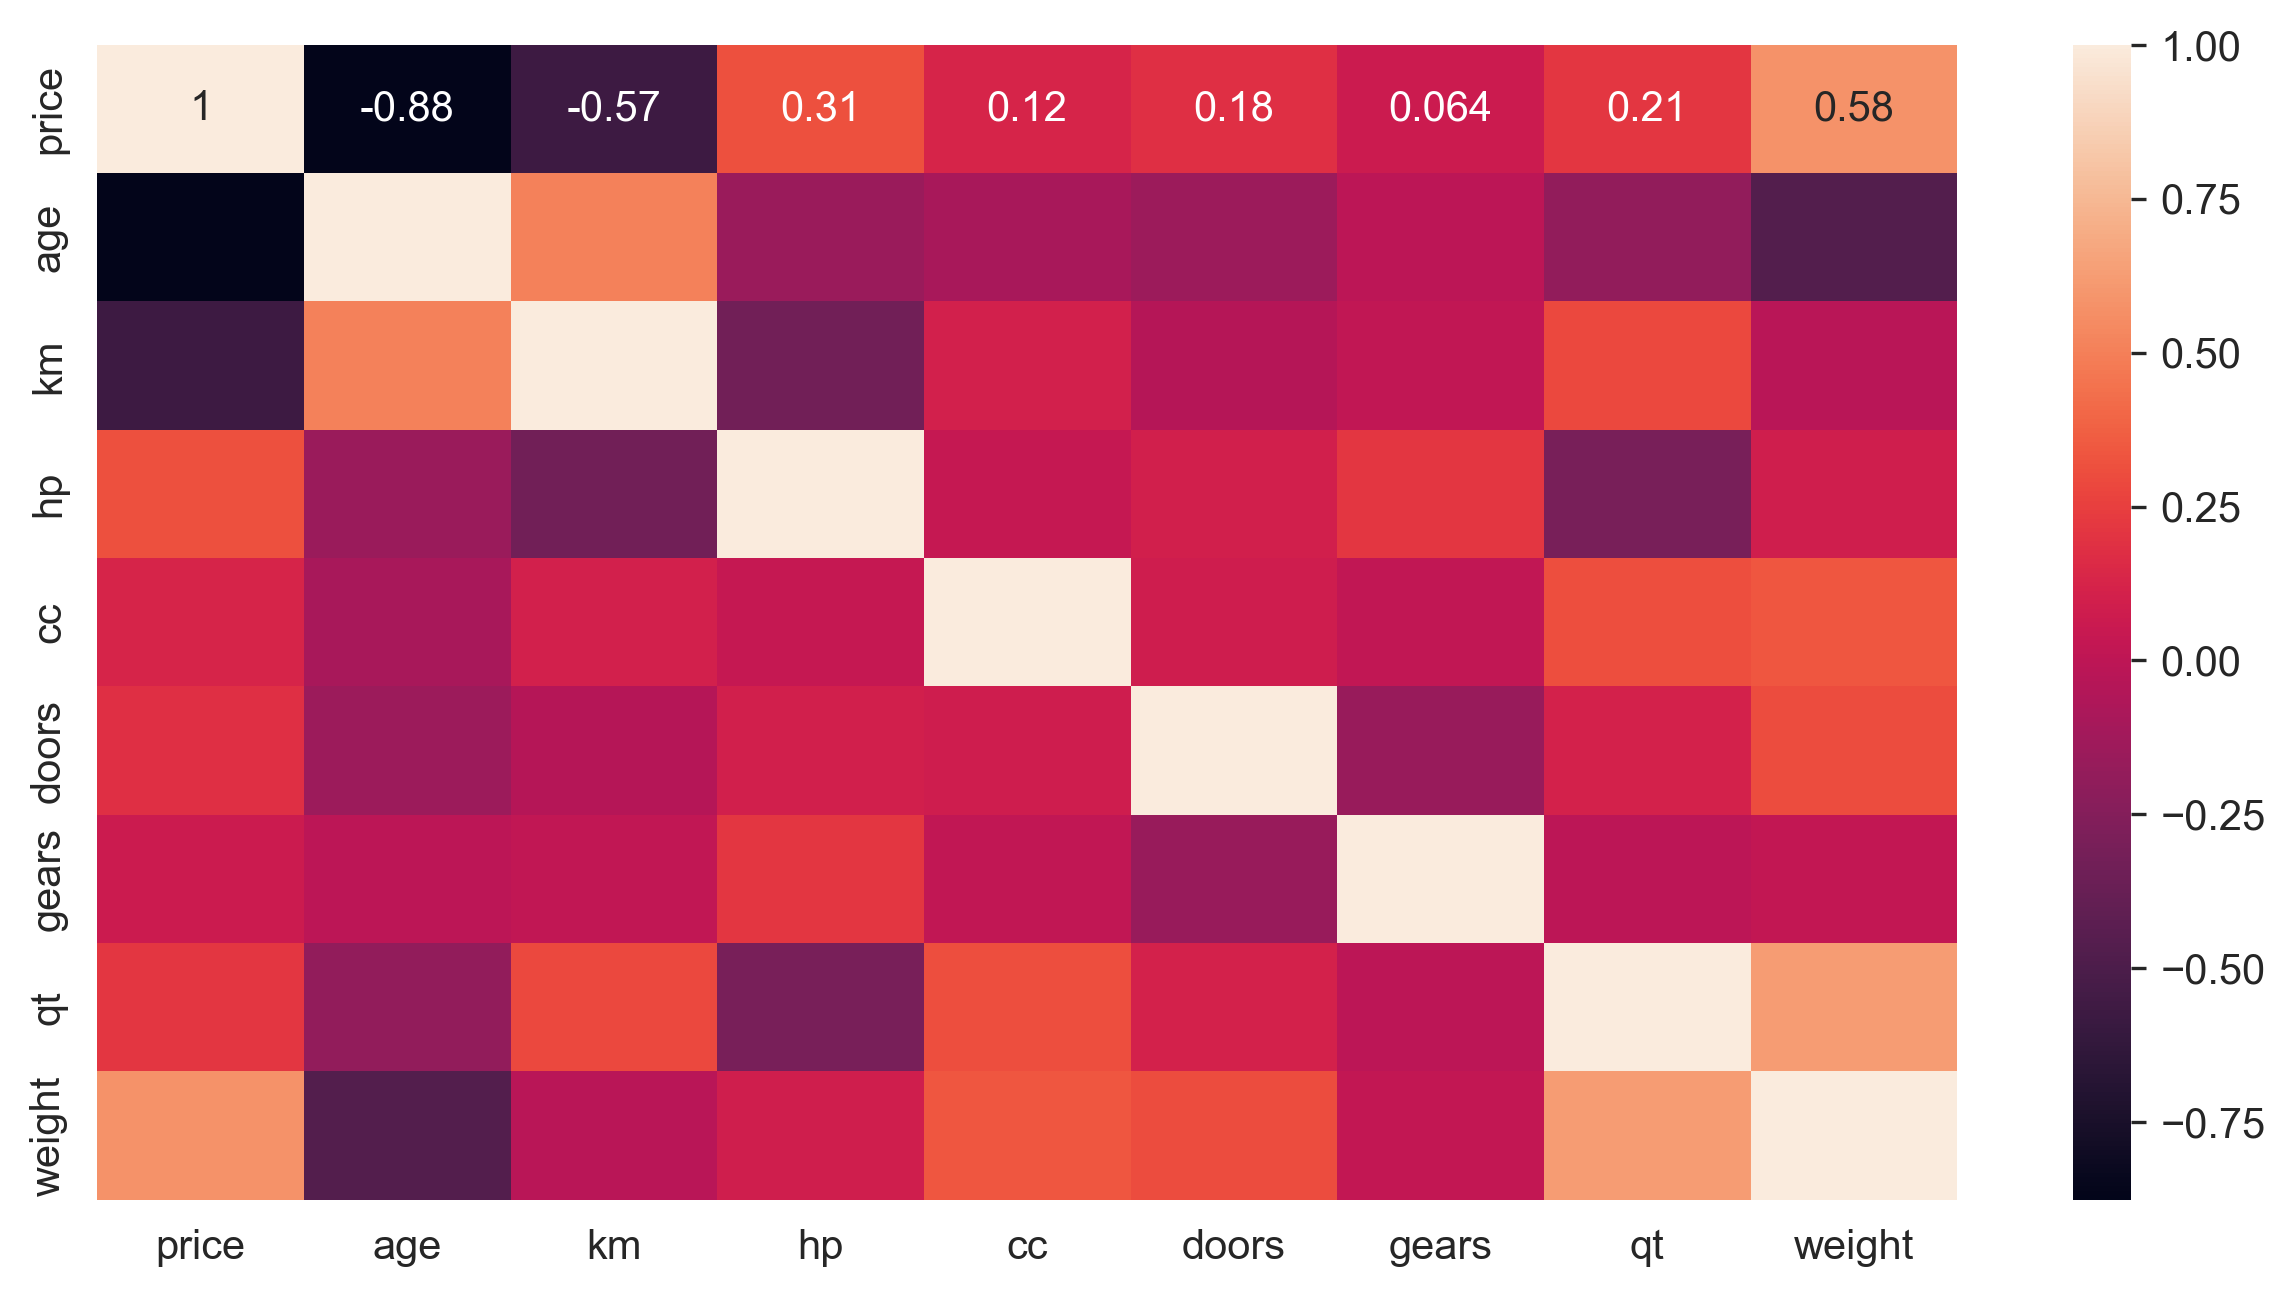

In [70]:
sns.heatmap(df.corr() , annot=True)

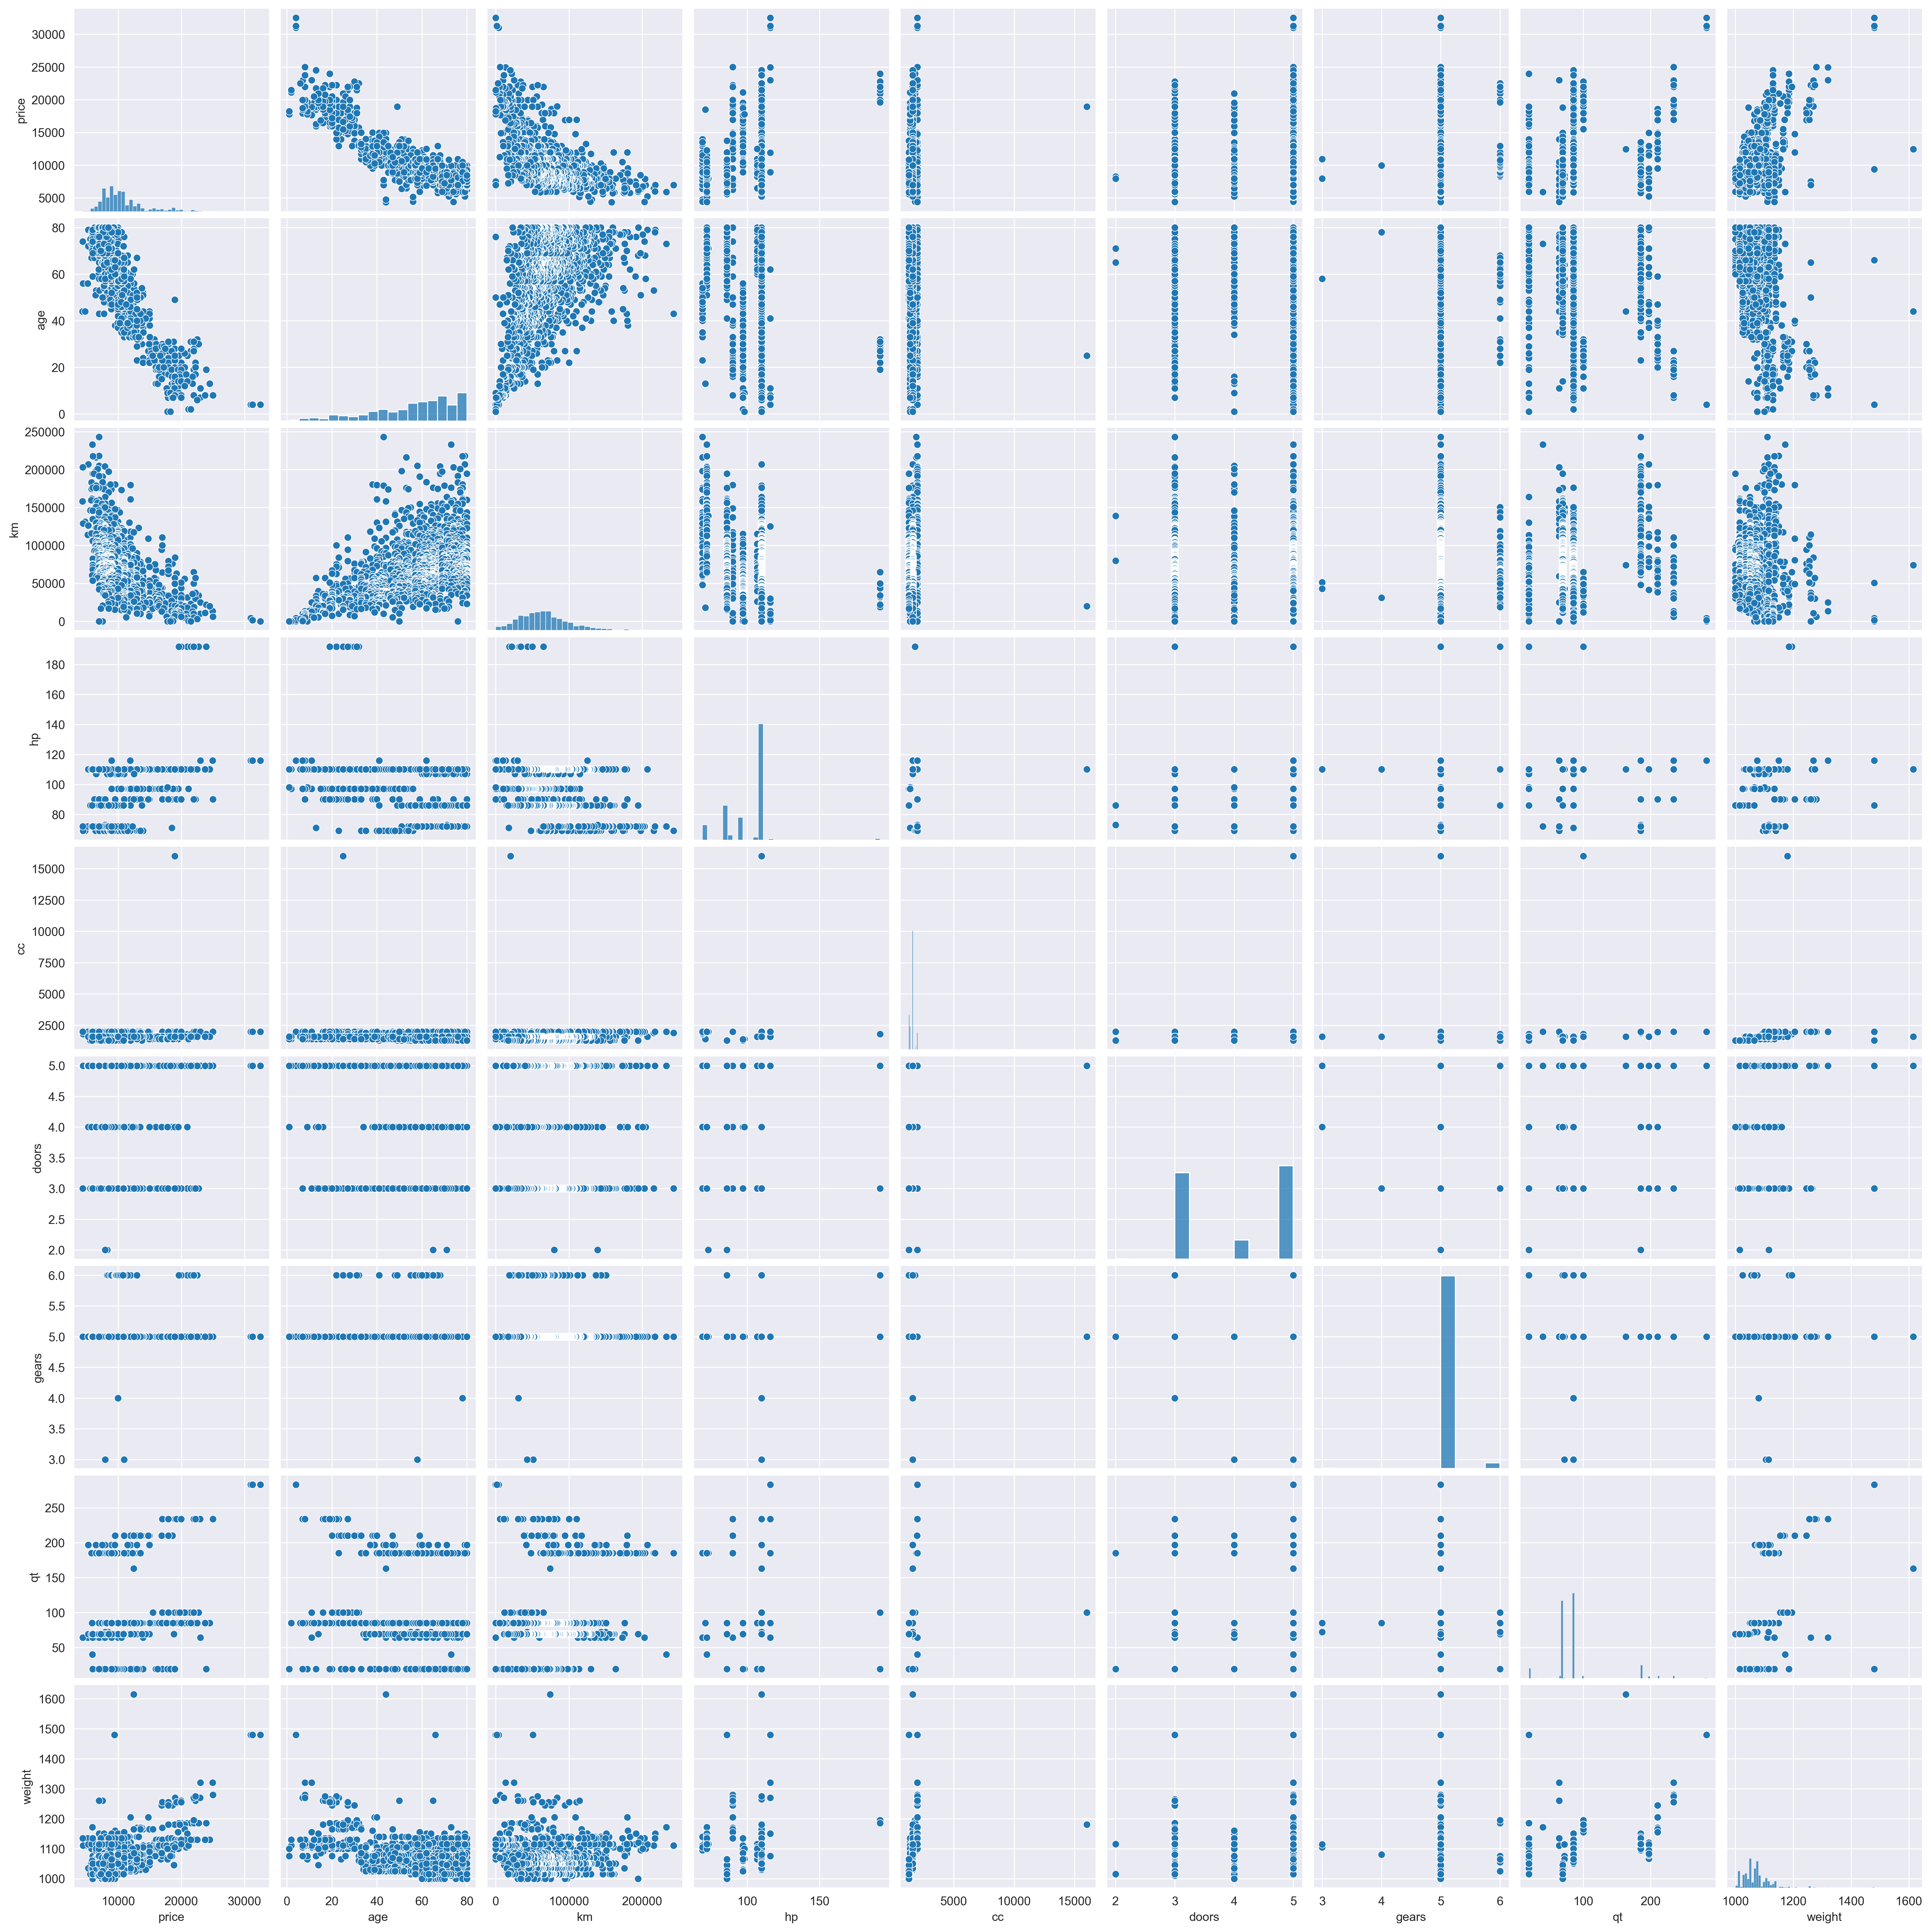

In [71]:
sns.pairplot(df)

In [72]:
df.columns

Index(['price', 'age', 'km', 'hp', 'cc', 'doors', 'gears', 'qt', 'weight'], dtype='object')

In [73]:
model = smf.ols('price ~ age + km + hp + cc + doors + gears + qt + weight' , data= df).fit()


In [74]:
df.head()

price  age     km  hp    cc  doors  gears   qt  weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [75]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [76]:
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
qt              3.858805
weight         16.855470
dtype: float64

In [77]:
model.pvalues

Intercept     1.113392e-04
age          1.879217e-288
km            1.994713e-56
hp            5.211155e-28
cc            1.882393e-01
doors         9.816443e-01
gears         2.452430e-03
qt            3.290363e-03
weight        1.031118e-51
dtype: float64

In [78]:
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [79]:
dff = df.drop(columns='price')

In [80]:
dff

age     km   hp    cc  doors  gears   qt  weight
0      23  46986   90  2000      3      5  210    1165
1      23  72937   90  2000      3      5  210    1165
2      24  41711   90  2000      3      5  210    1165
3      26  48000   90  2000      3      5  210    1165
4      30  38500   90  2000      3      5  210    1170
...   ...    ...  ...   ...    ...    ...  ...     ...
1430   69  20544   86  1300      3      5   69    1025
1431   72  19000   86  1300      3      5   69    1015
1432   71  17016   86  1300      3      5   69    1015
1433   70  16916   86  1300      3      5   69    1015
1434   76      1  110  1600      5      5   19    1114

[1435 rows x 8 columns]

In [81]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [82]:
vif['Featurs'] = dff.columns
vif

Featurs
0     age
1      km
2      hp
3      cc
4   doors
5   gears
6      qt
7  weight

In [83]:
dff.values

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [84]:
[variance_inflation_factor(dff.values , i) for i in range (len(dff.columns))]

[16.39266508357463,
 7.601207135953872,
 64.8944462545481,
 17.18609702640726,
 21.856114218435646,
 439.67259911276574,
 11.021646874639215,
 543.5220359147726]

In [85]:
vif['VIF']=[variance_inflation_factor(dff.values , i) for i in range (len(dff.columns))]
vif

Featurs         VIF
0     age   16.392665
1      km    7.601207
2      hp   64.894446
3      cc   17.186097
4   doors   21.856114
5   gears  439.672599
6      qt   11.021647
7  weight  543.522036

In [86]:
gears = smf.ols('price ~ age + km + hp + cc + doors + gears + qt ' , data= df).fit()
gears.rsquared , gears.aic

(0.8385720455246246, 24978.840477013637)

In [87]:
weight = smf.ols('price ~ age + km + hp + cc + doors + qt + weight' , data= df).fit()
weight.rsquared , weight.aic

(0.861632231877993, 24757.644103864768)

In [88]:
model = smf.ols('price ~ age + km + hp + cc + doors  + qt + weight' , data= df).fit()
model.rsquared

0.861632231877993

In [89]:
df.head()

price  age     km  hp    cc  doors  gears   qt  weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [90]:
model.resid

0      -3328.839912
1      -2548.032122
2      -2864.888187
3      -1492.555915
4      -2483.902063
           ...     
1430   -1283.176655
1431    2564.629705
1432      57.200706
1433   -1316.692519
1434   -3424.167169
Length: 1435, dtype: float64

In [91]:
model.fittedvalues

0       16828.839912
1       16298.032122
2       16814.888187
3       16442.555915
4       16233.902063
            ...     
1430     8783.176655
1431     8280.370295
1432     8442.799294
1433     8566.692519
1434    10374.167169
Length: 1435, dtype: float64

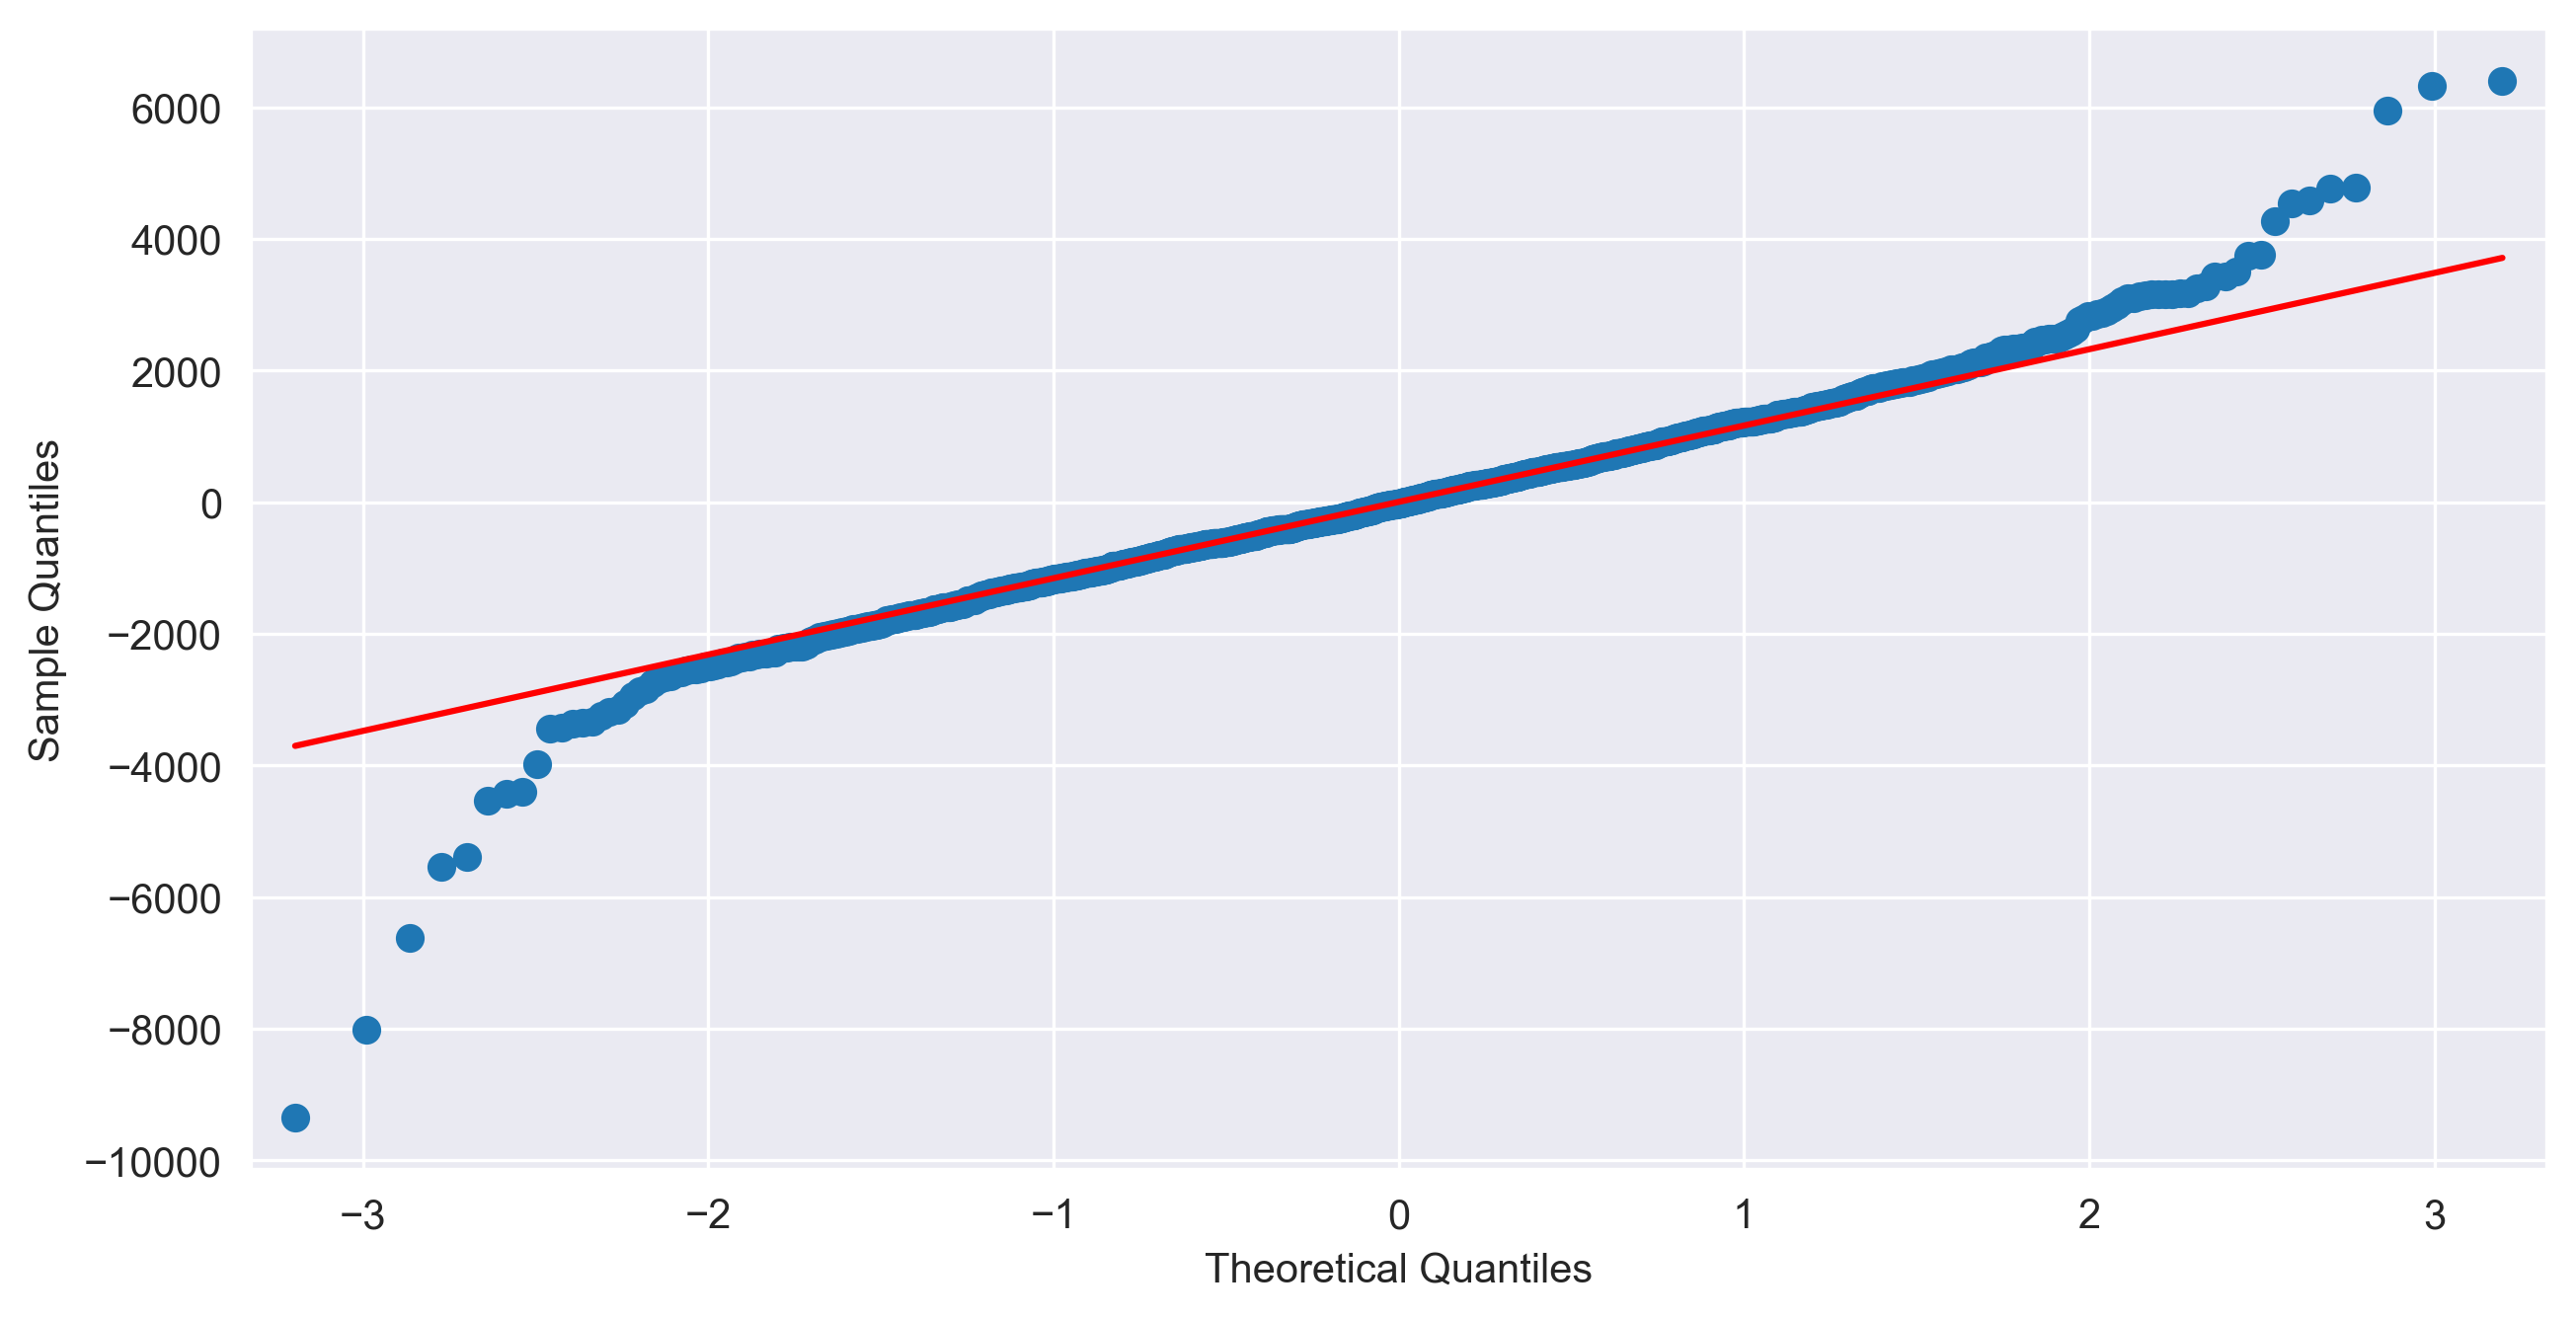

In [92]:
sm.qqplot(model.resid , line= 'q');

In [93]:
np.argmax(model.resid) , np.max(model.resid)

(522, 6403.79573187893)

In [94]:
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

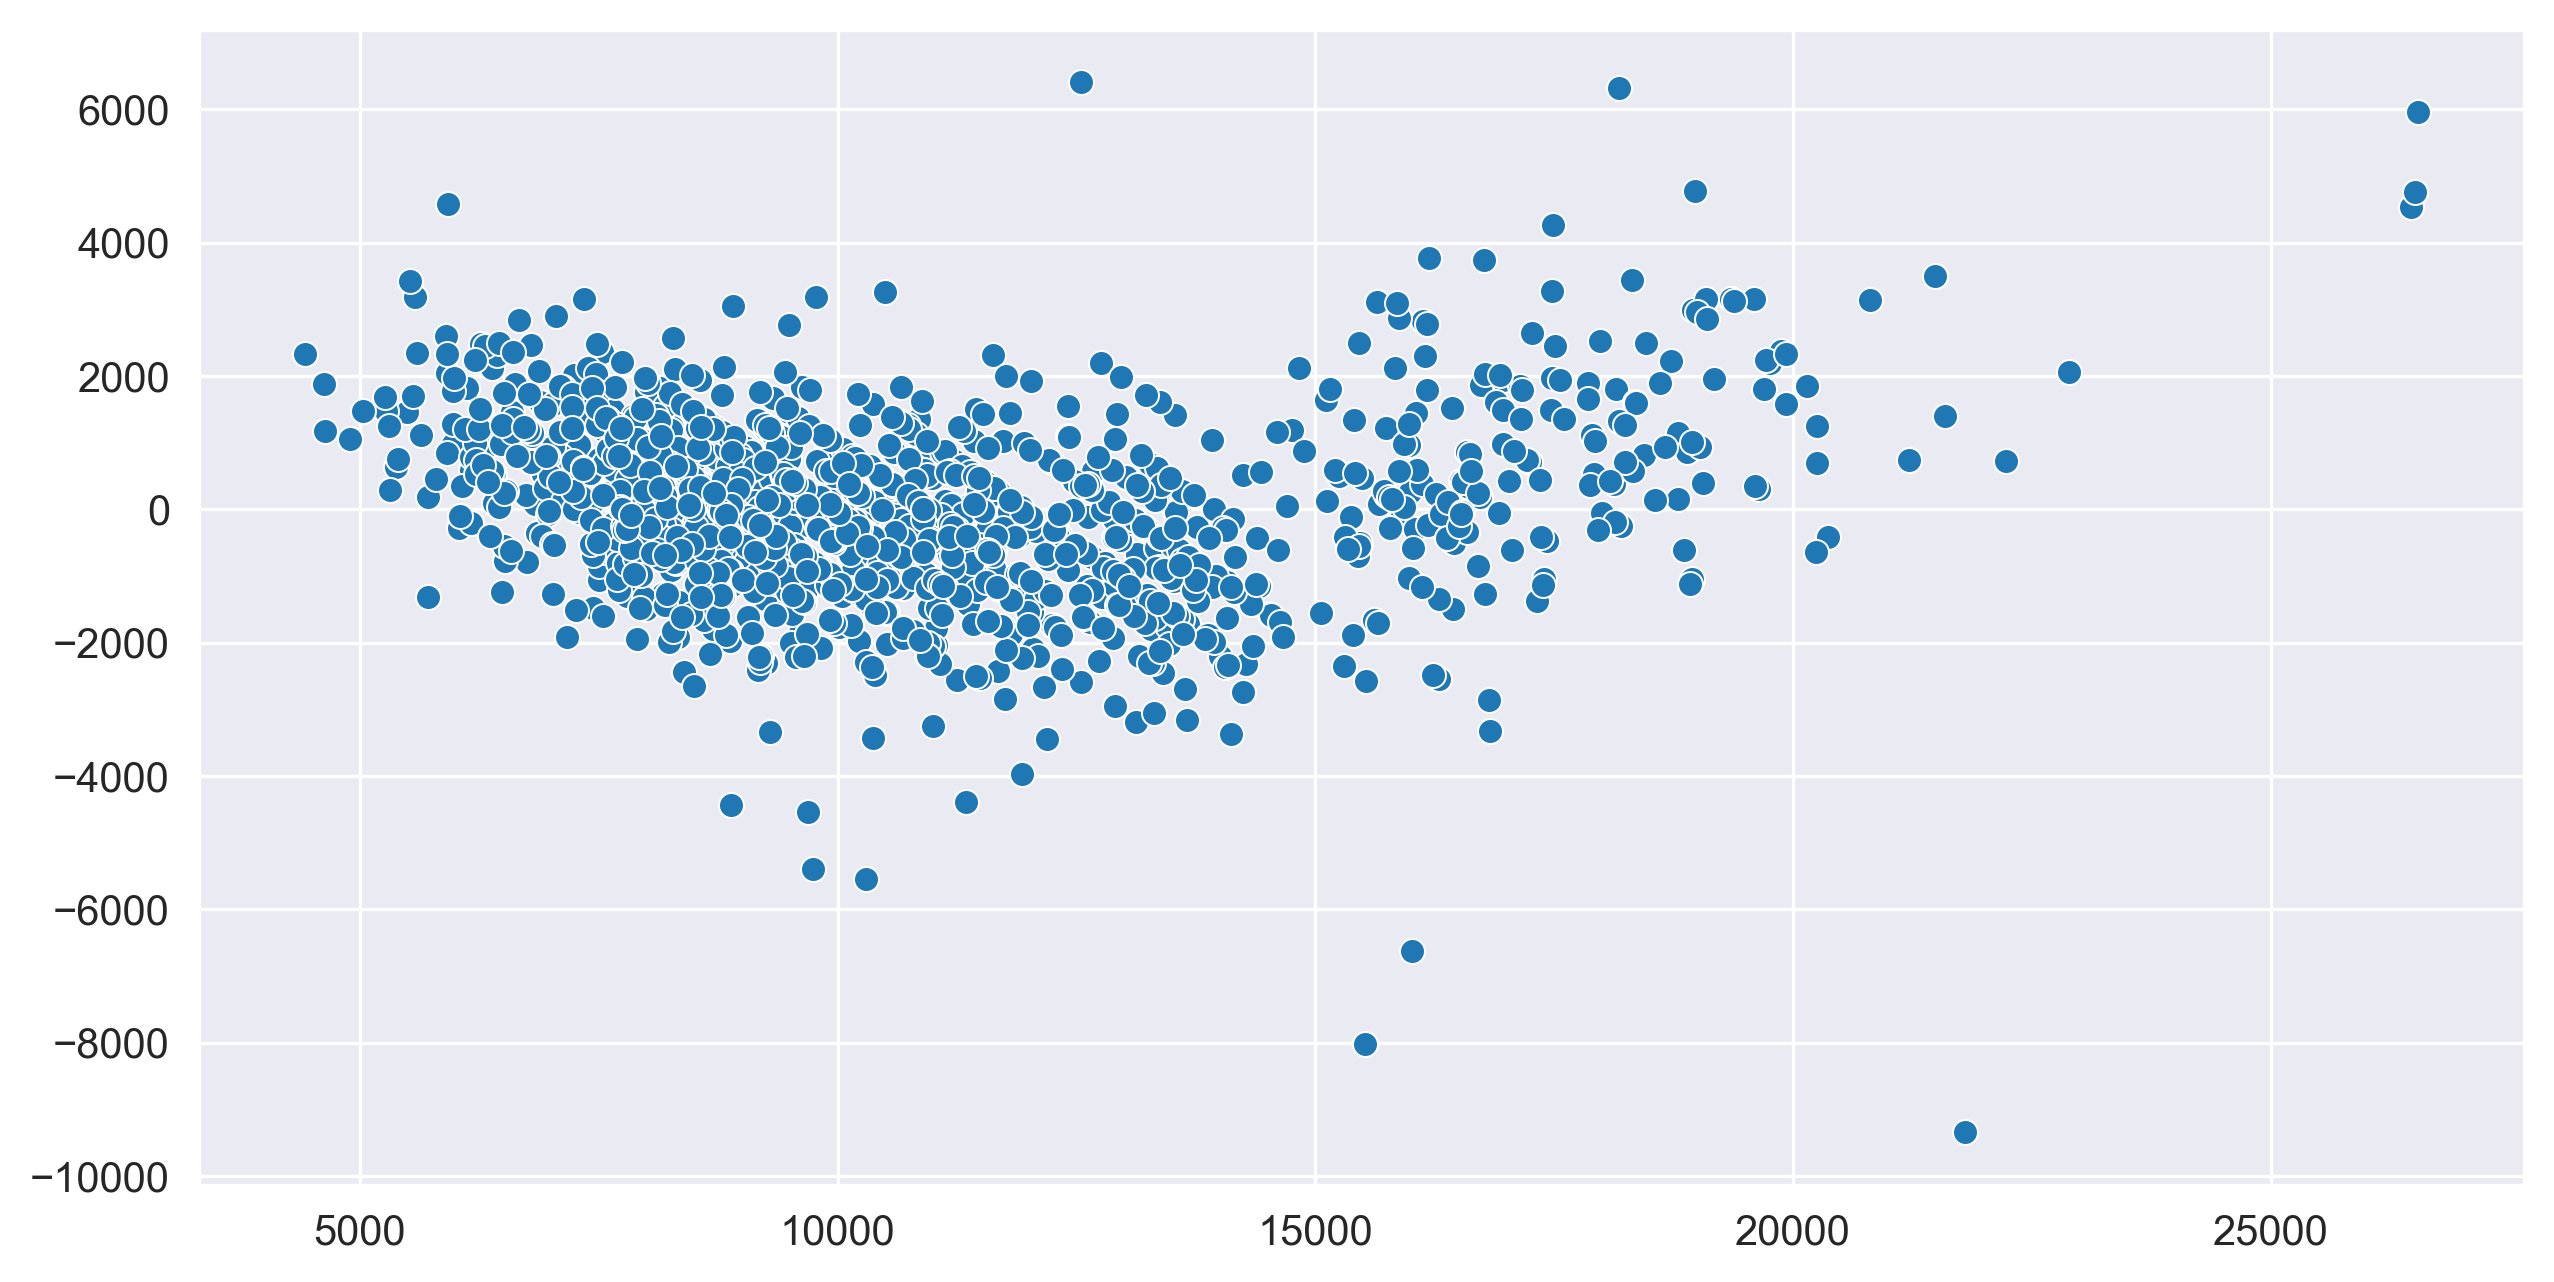

In [95]:
sns.scatterplot(x= model.fittedvalues , y = model.resid)
plt.xlabel = ' Predicted values'
plt.ylabel = 'Error'

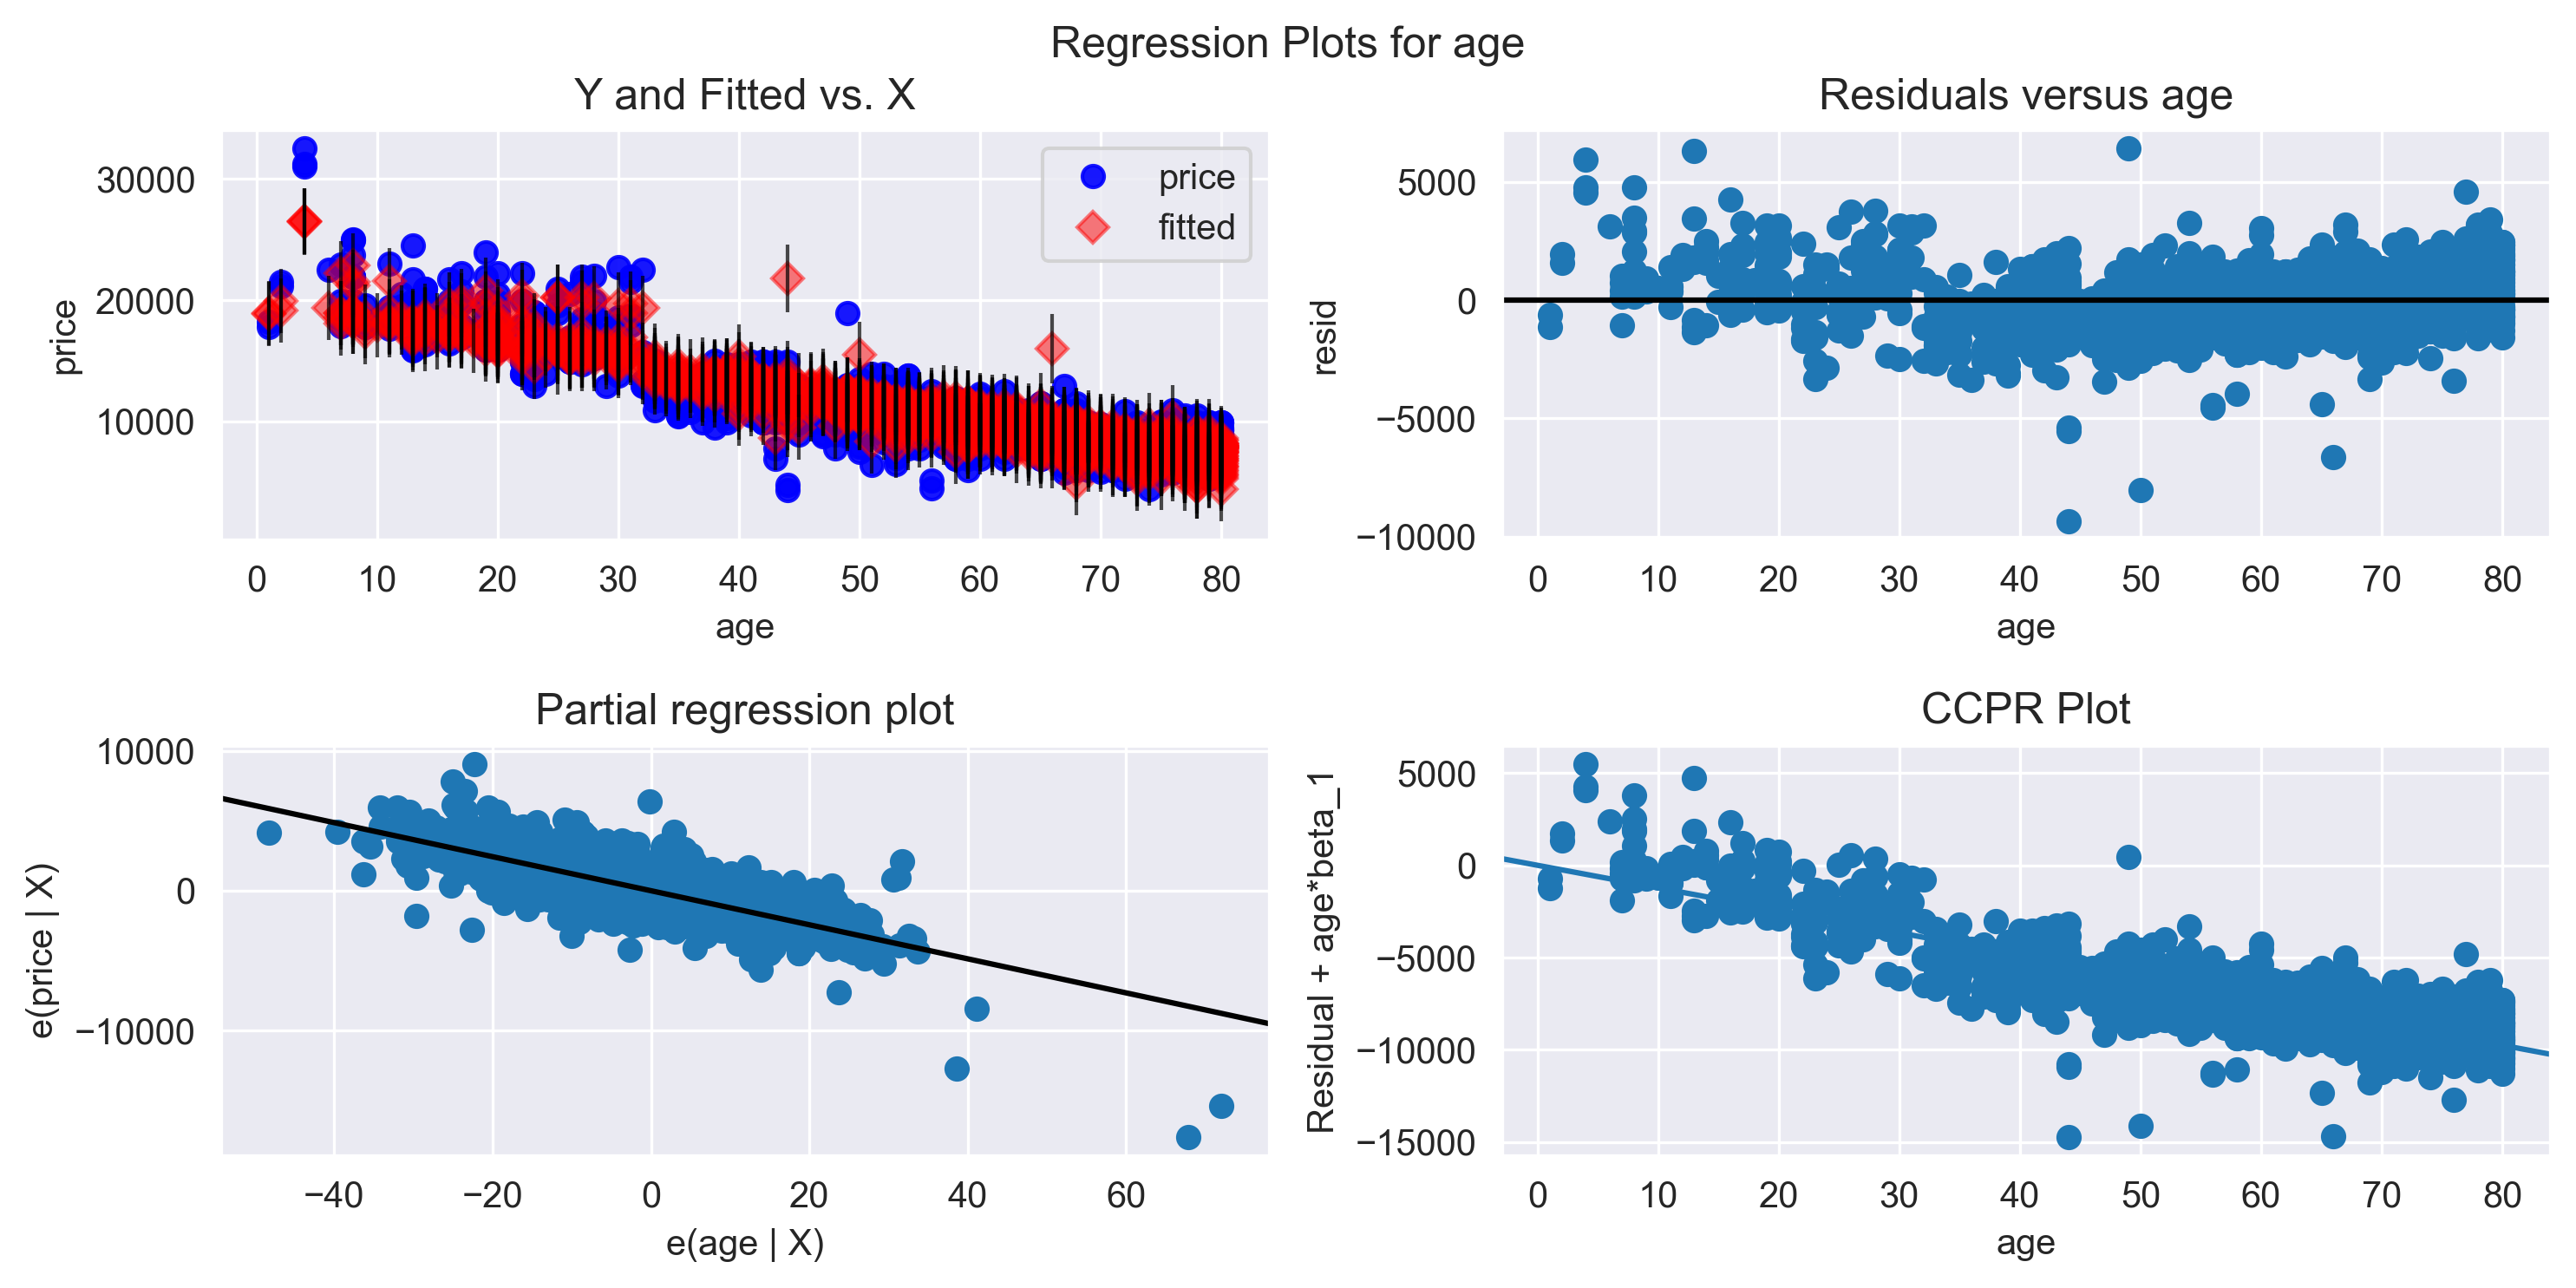

In [96]:
sm.graphics.plot_regress_exog(model , 'age');

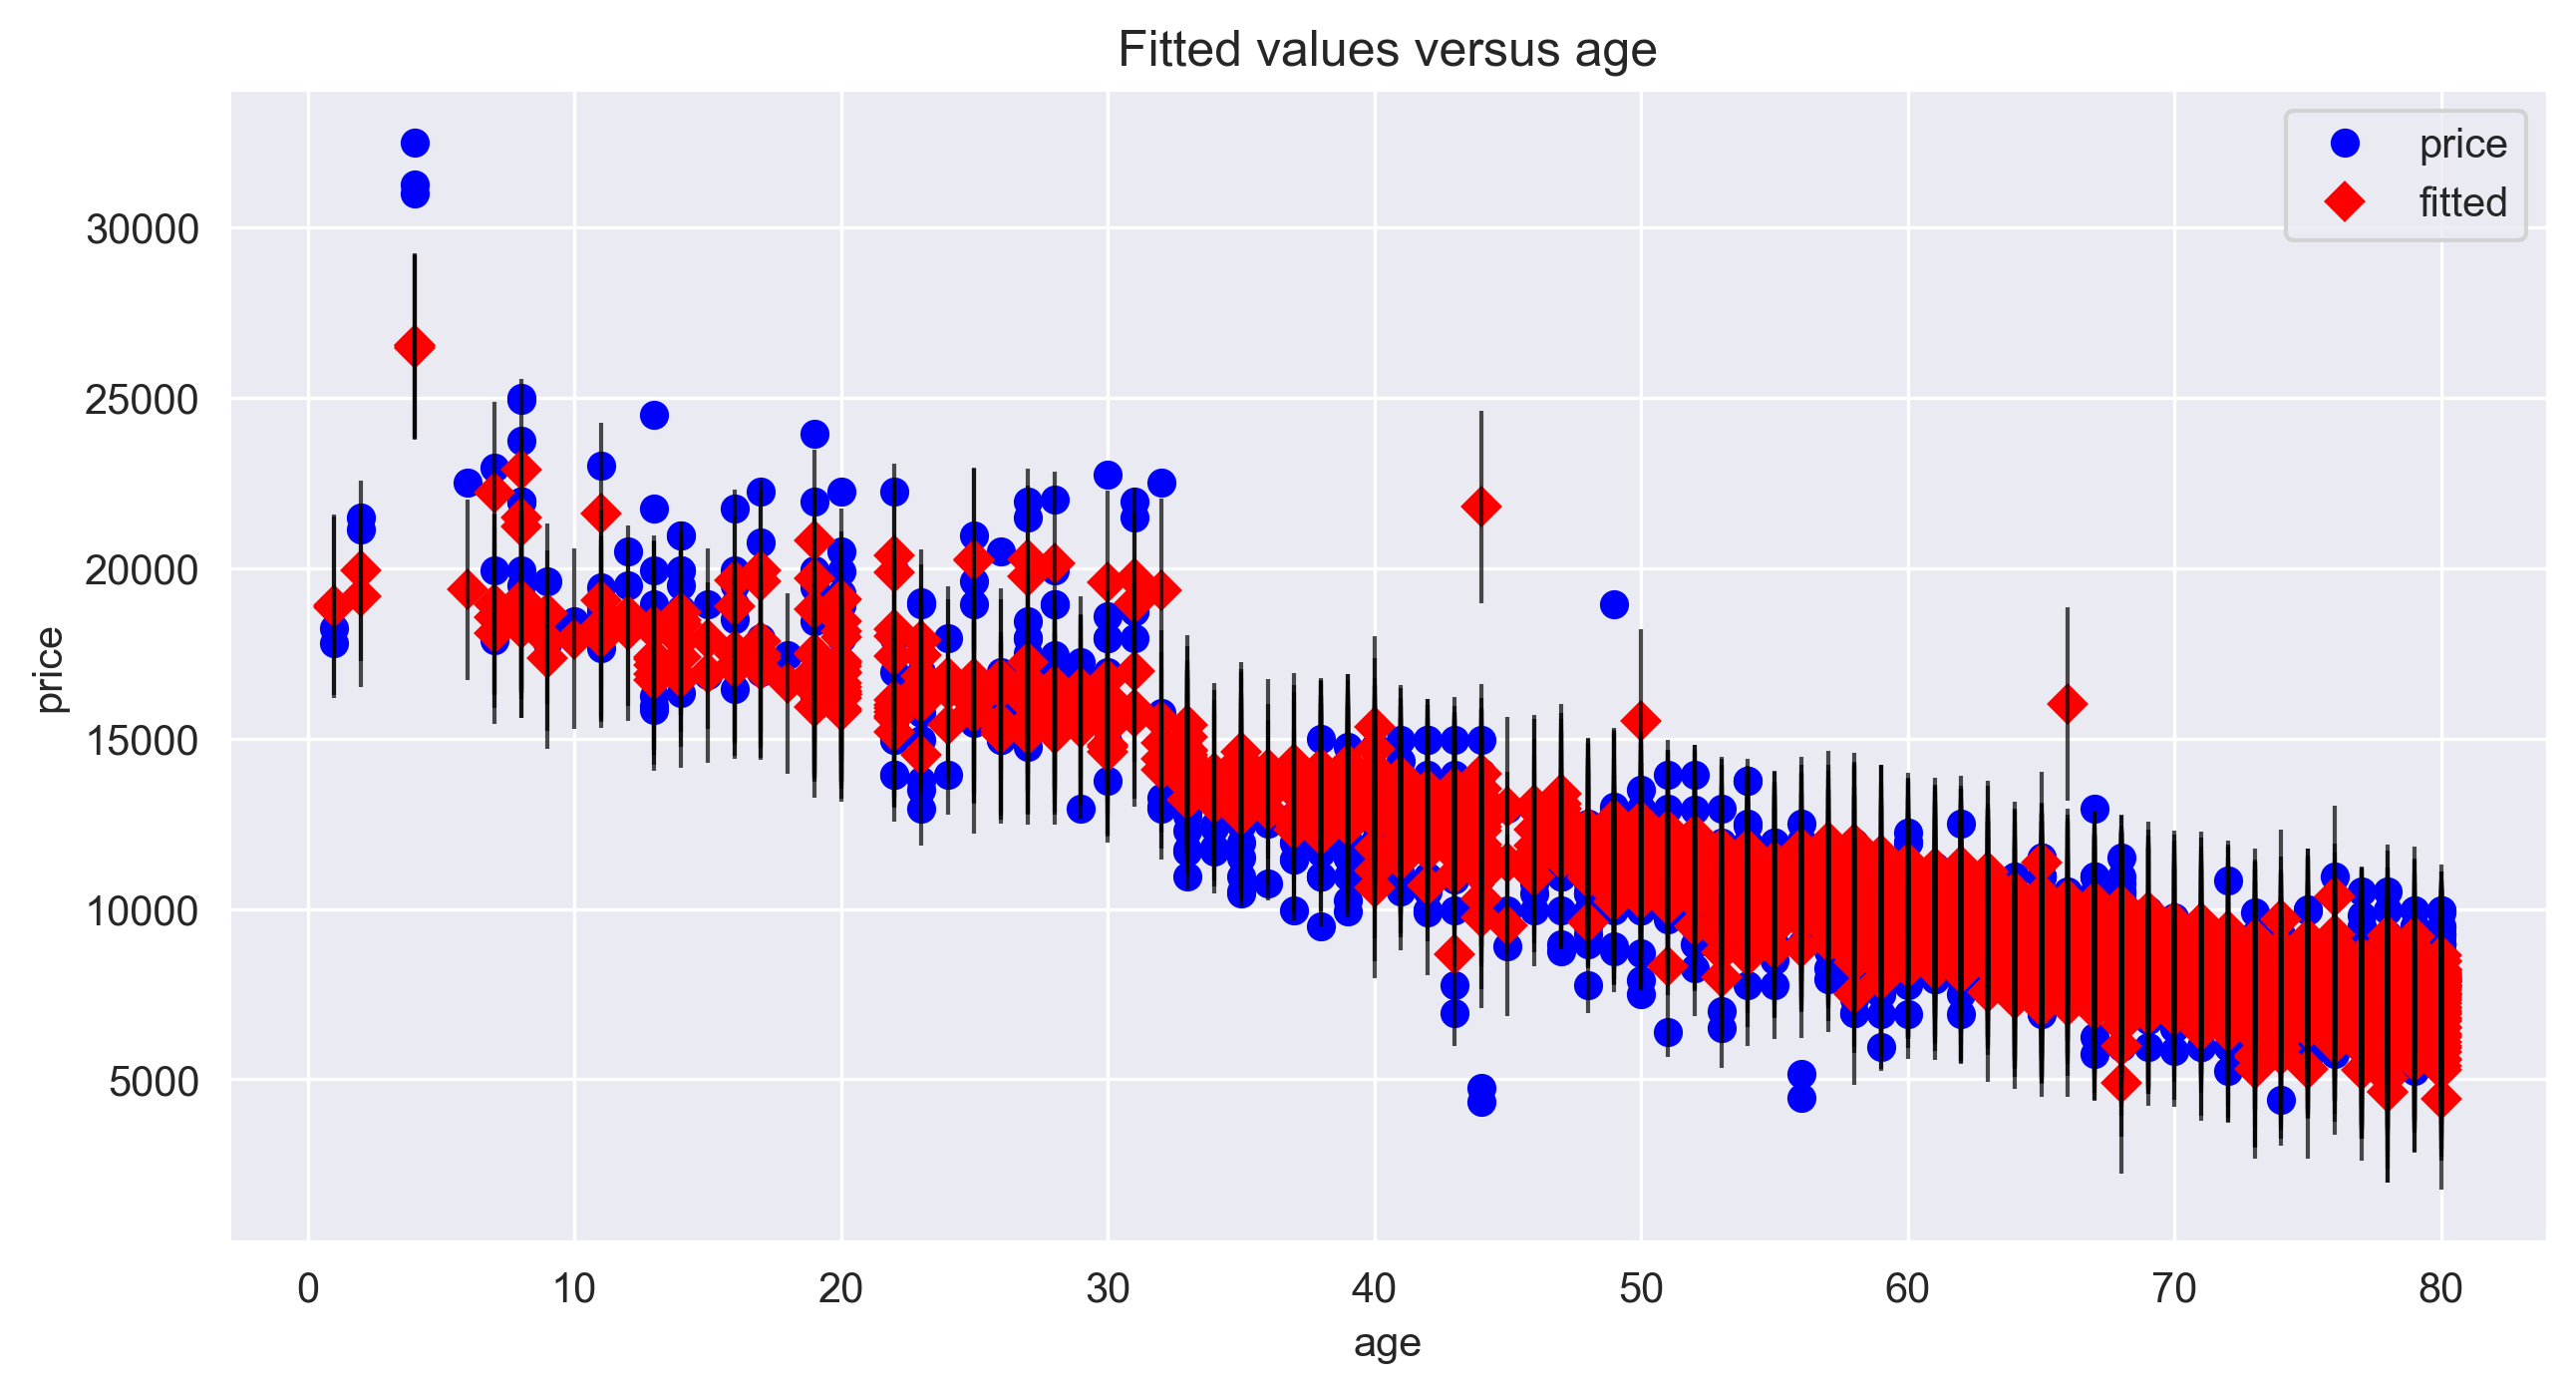

In [97]:
sm.graphics.plot_fit(model , 'age');

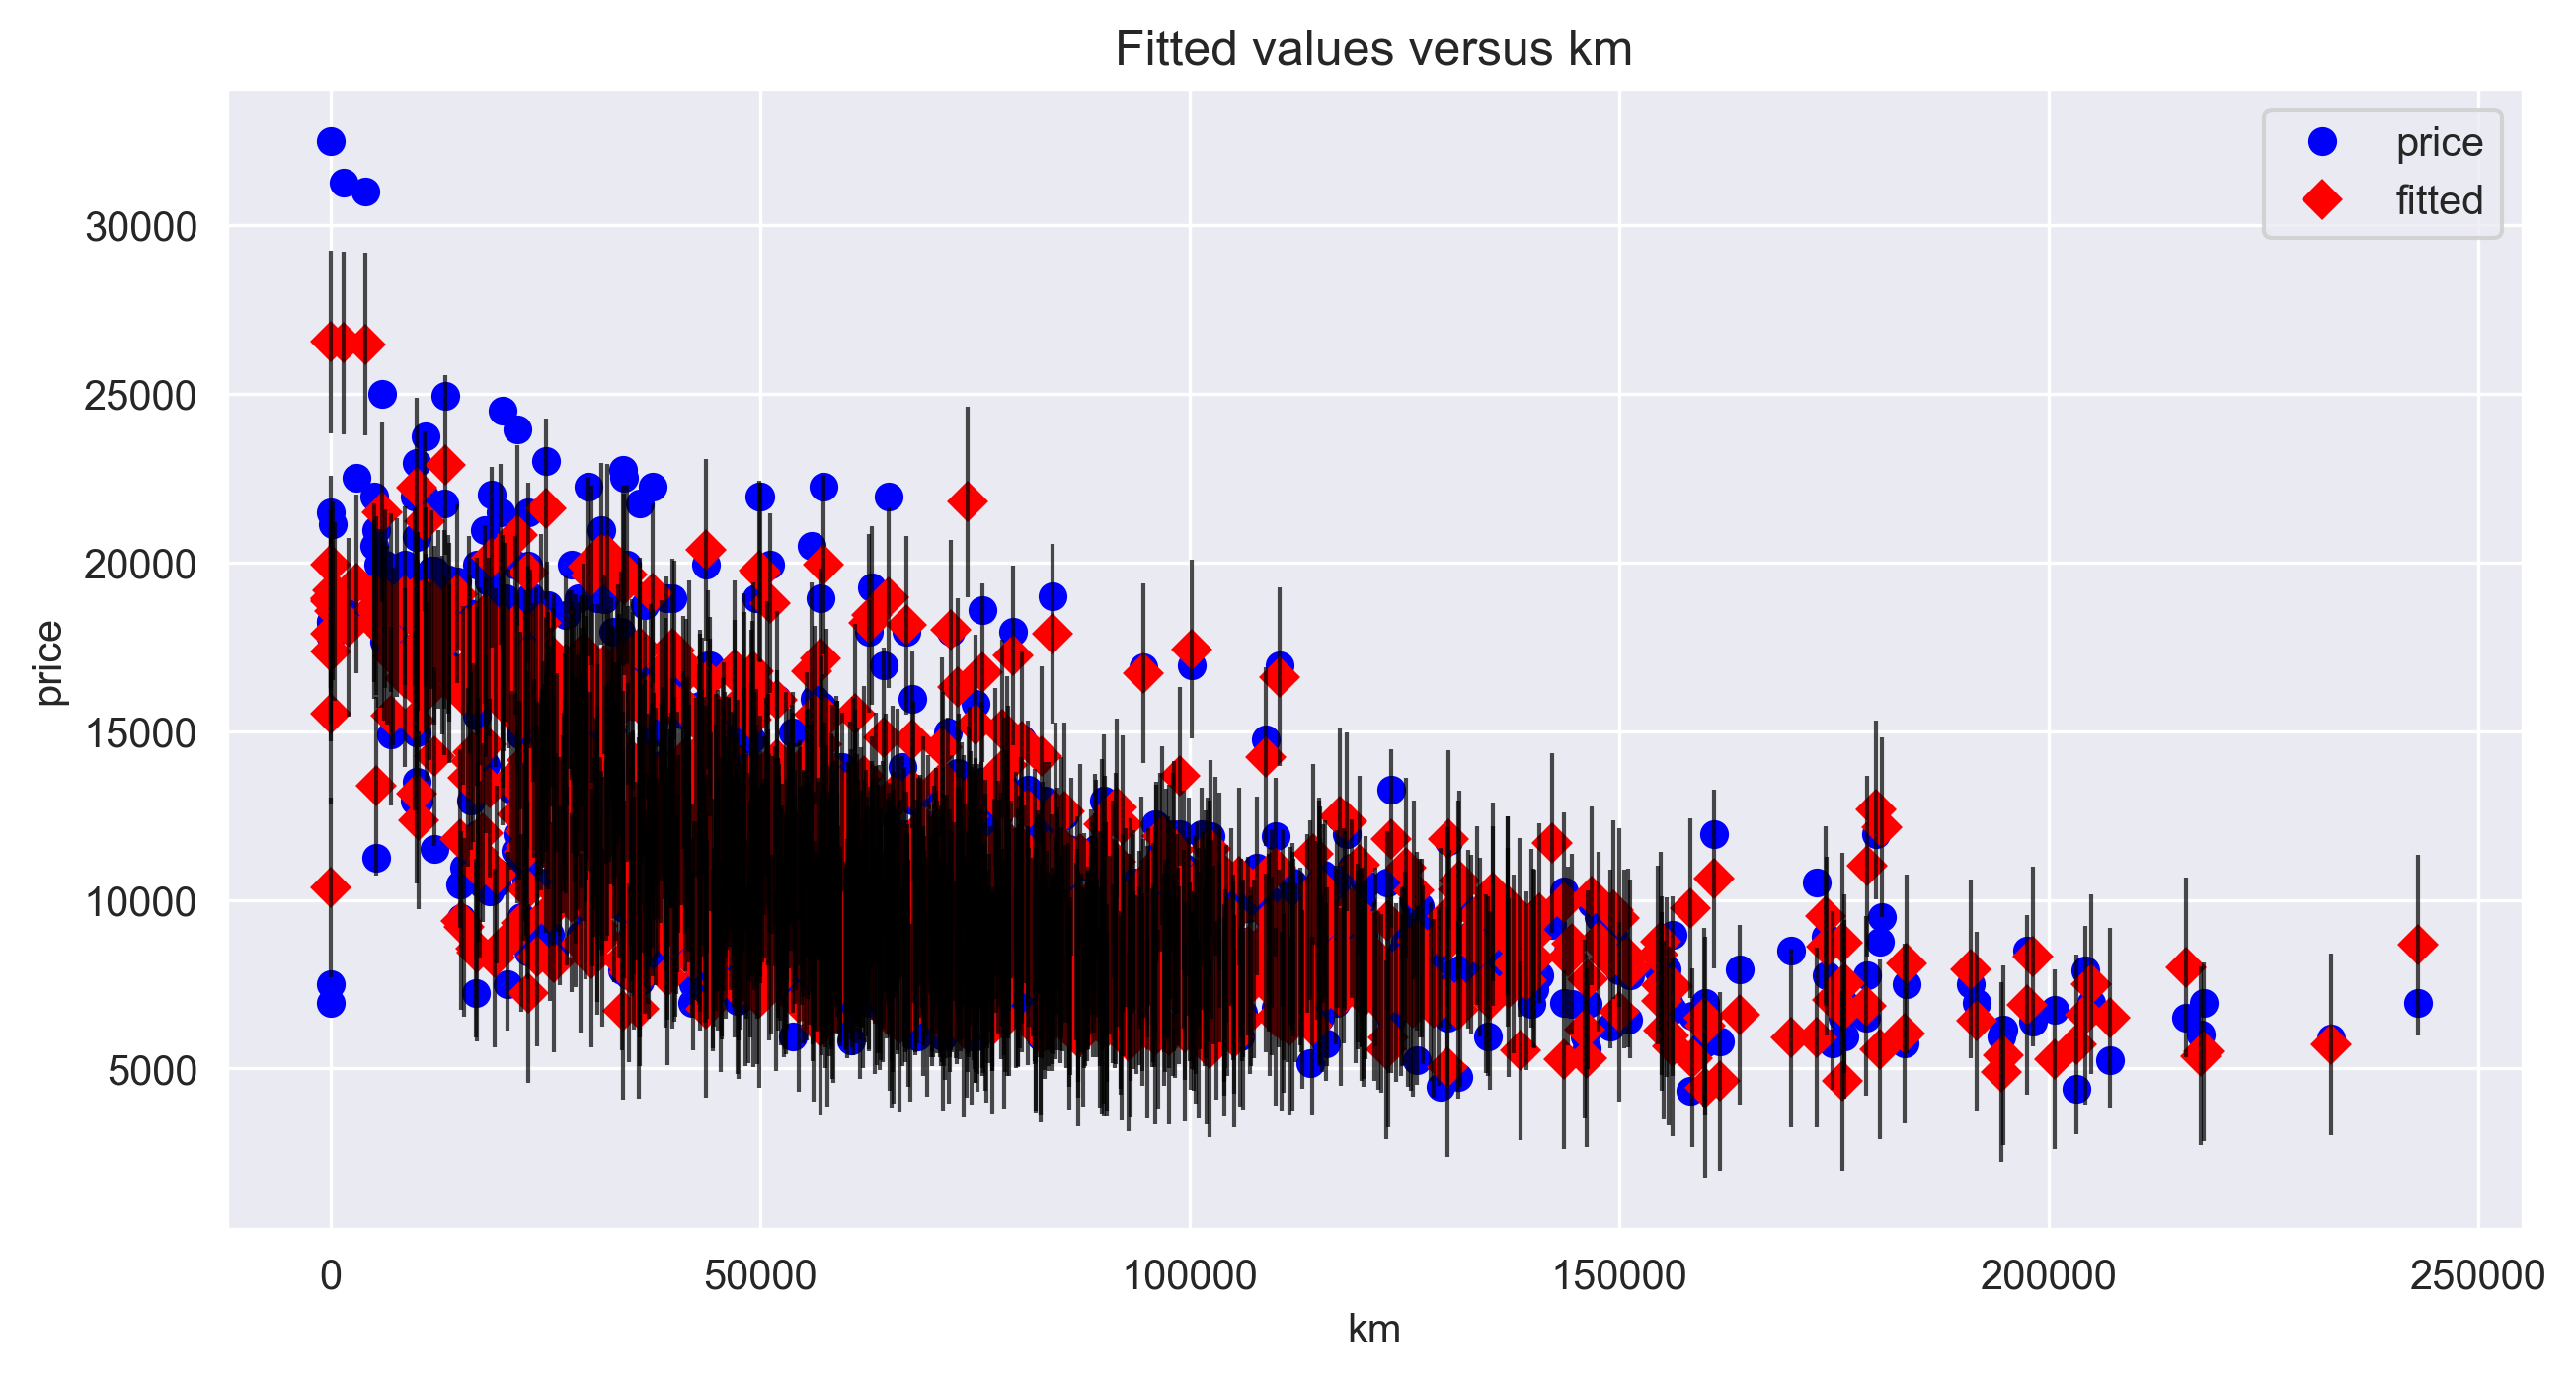

In [98]:
sm.graphics.plot_fit(model , 'km');

In [99]:
model


In [100]:
inf = model.get_influence()

c , p = inf.cooks_distance

In [101]:
c

array([8.19507952e-03, 4.51554723e-03, 6.19579126e-03, ...,
       1.47953713e-06, 7.66982434e-04, 1.19475212e-02])

In [102]:
p

array([0.99999995, 1.        , 0.99999998, ..., 1.        , 1.        ,
       0.99999979])

<StemContainer object of 3 artists>

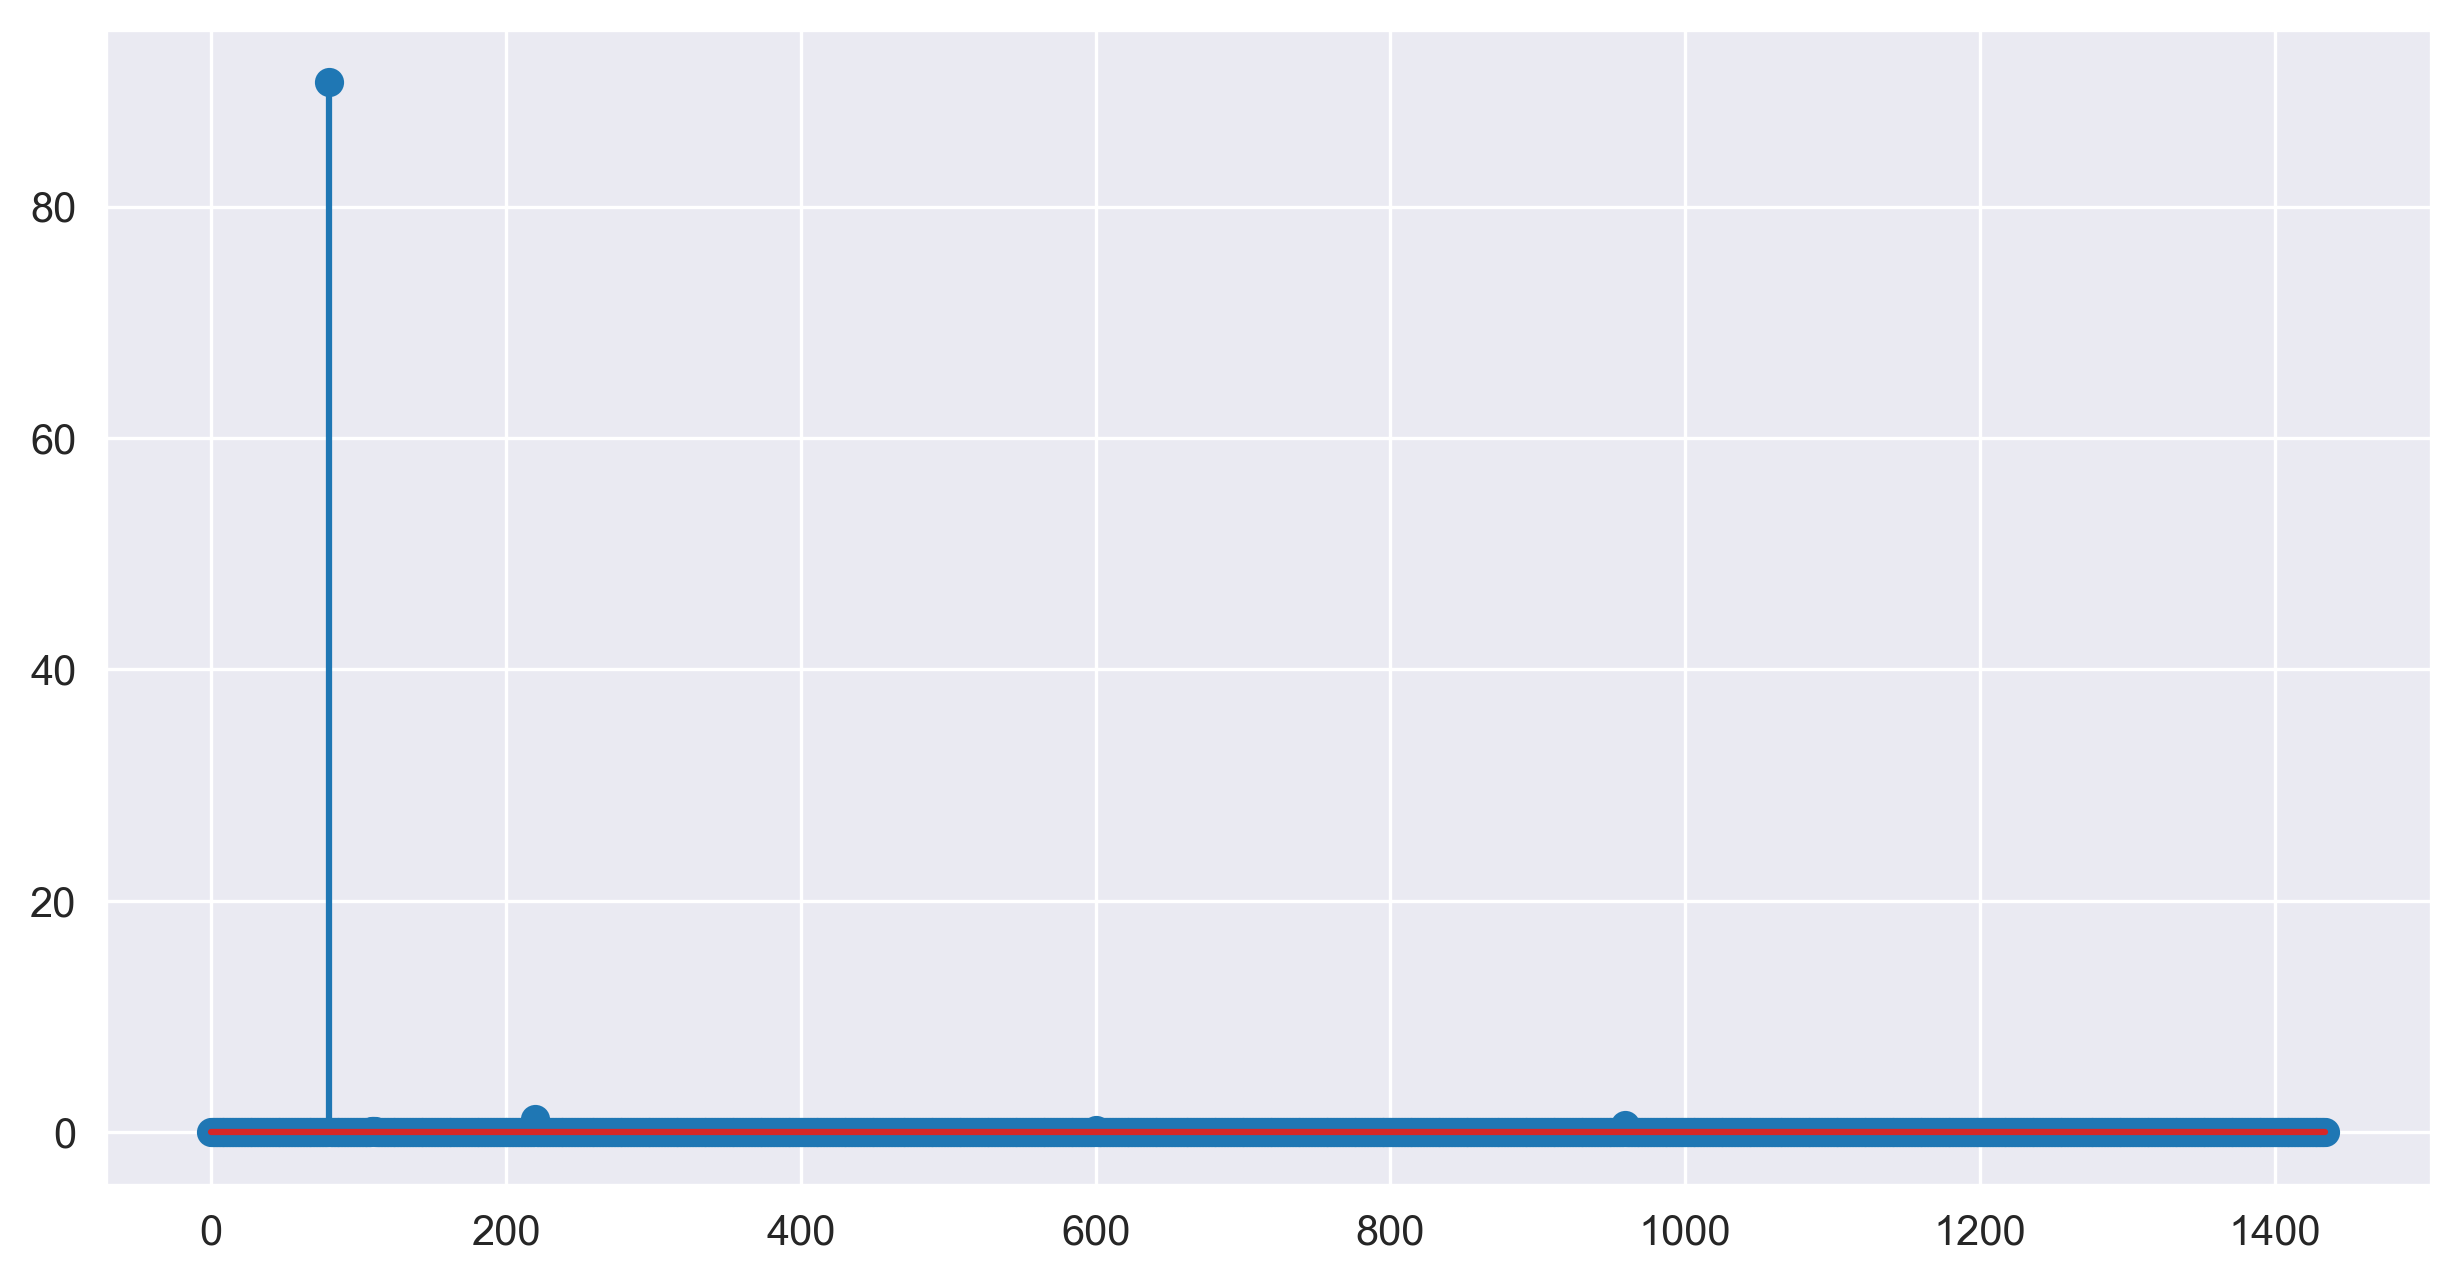

In [103]:
plt.stem(c)


In [104]:
np.argmax(c) , np.max(c)

(80, 90.74324839897675)

In [105]:
df.iloc[[80]]

price  age     km   hp     cc  doors  gears   qt  weight
80  18950   25  20019  110  16000      5      5  100    1180

In [106]:
df.head()

price  age     km  hp    cc  doors  gears   qt  weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

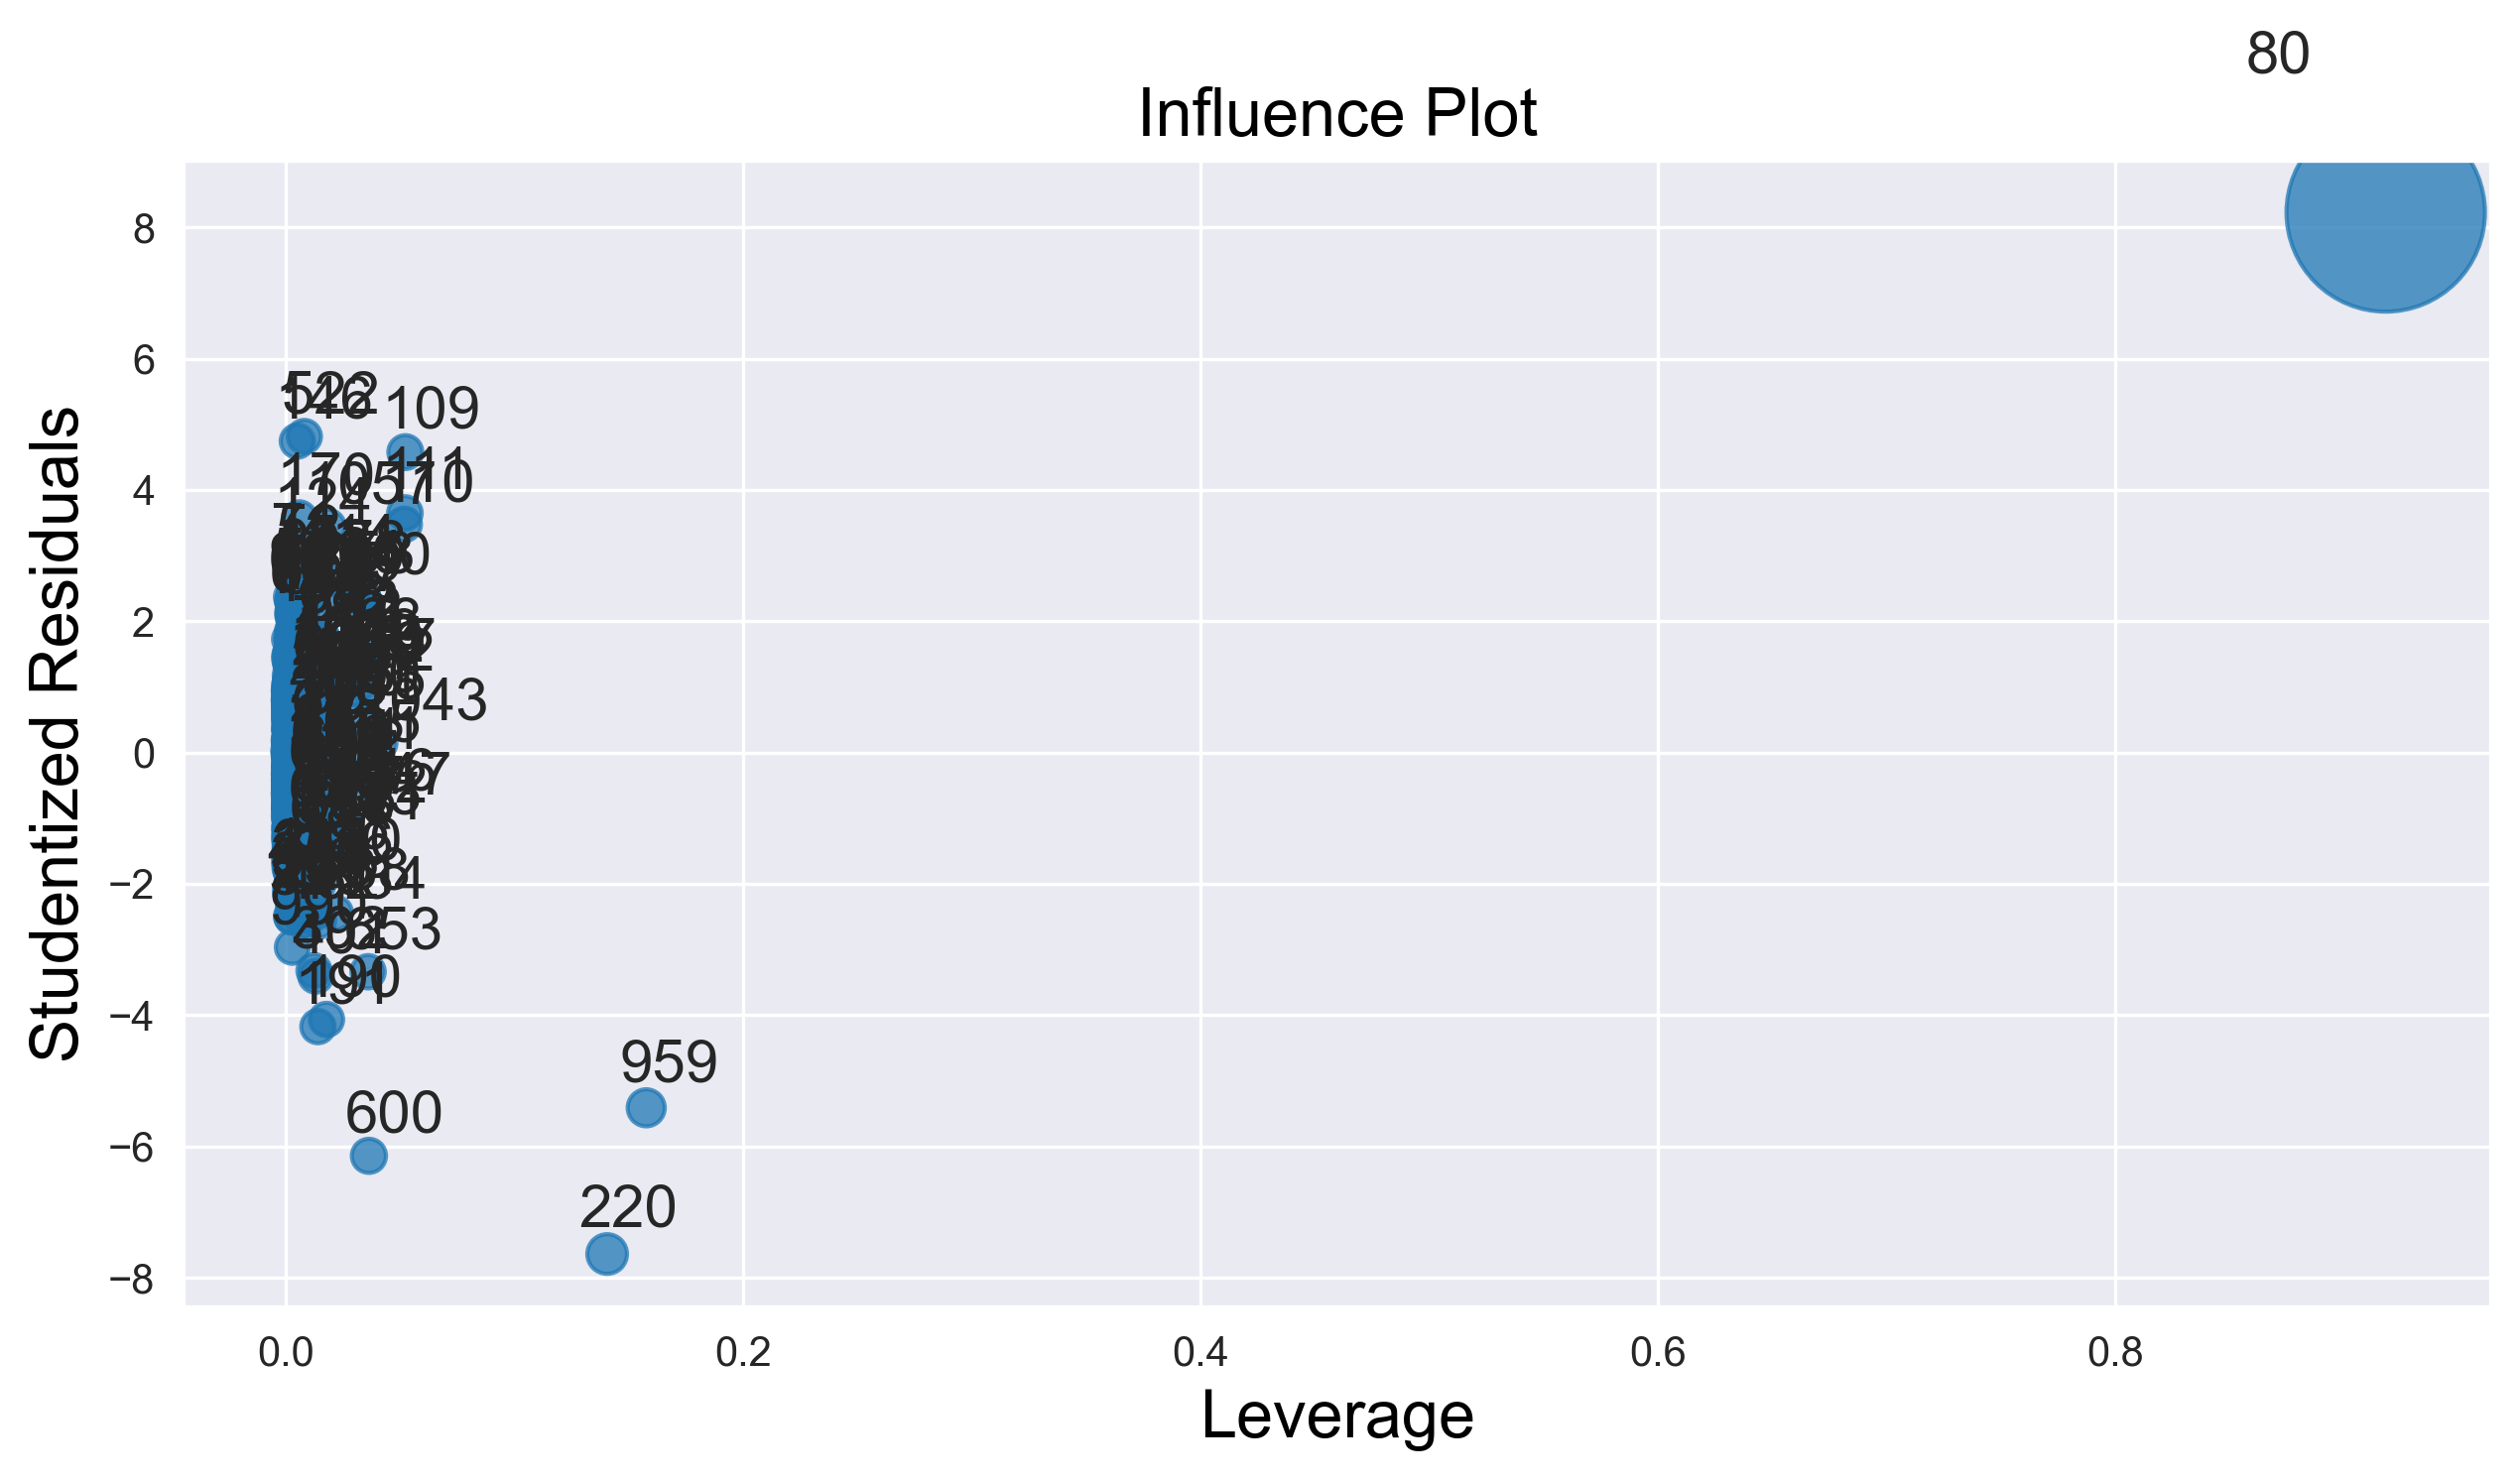

In [107]:
influence_plot(model);

In [108]:
k = len(df.columns)
n = len(df.values)

lv = (3)*(k+1)/n
lv

0.020905923344947737

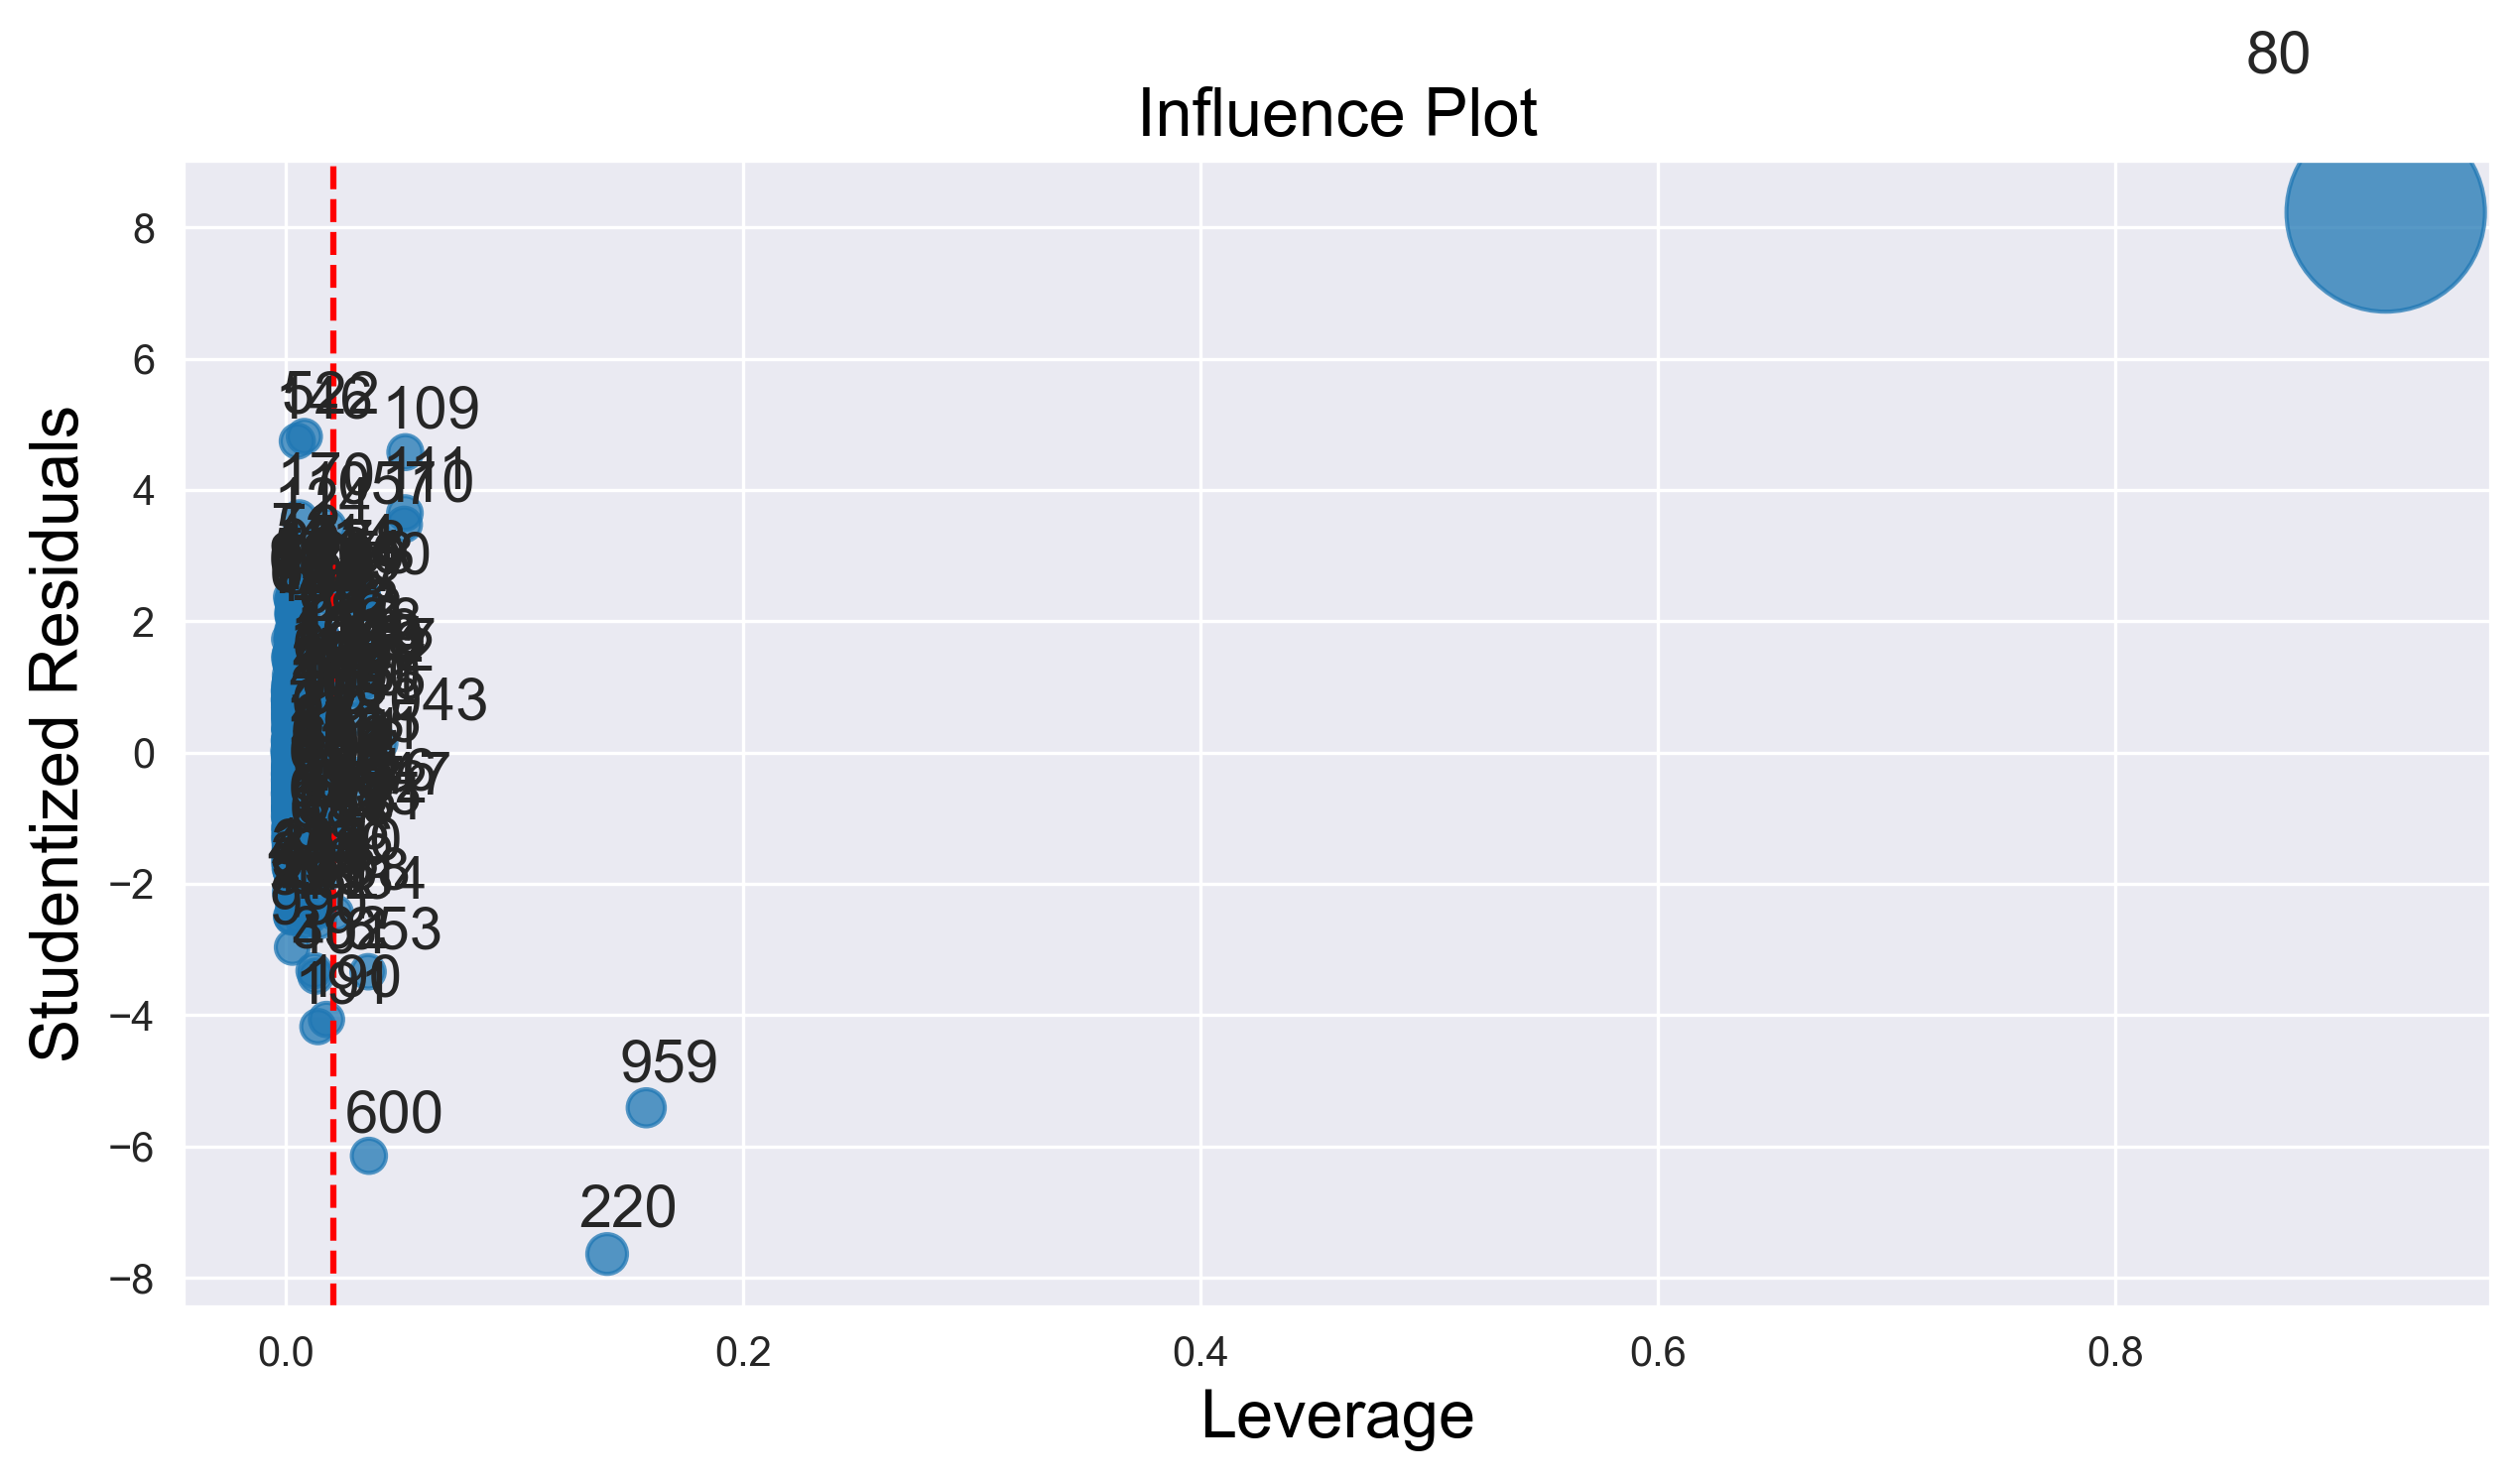

In [109]:
influence_plot(model)
plt.axvline(lv , linestyle = '--' , color = 'red')

In [110]:
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [111]:
# df = df.drop(df.index[[80]] , inplace=True).reset_index(drop=True)
# df


df = df.drop(index=80).reset_index(drop=True)
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [112]:
final_model = smf.ols('price ~ age + km + hp + cc + doors + gears + qt + weight' , data= df).fit()
final_model.rsquared

0.8681163912634053

In [113]:
while np.max(c)>0.5 :
    model=smf.ols('price ~ age + km + hp + cc + doors + gears + qt + weight' , data= df).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df
else:
    final_model=smf.ols('price ~ age + km + hp + cc + doors + gears + qt + weight' , data= df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [114]:
final_model.rsquared

0.8882395145171204

In [115]:
df

price  age     km   hp    cc  doors  gears   qt  weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1426   7500   69  20544   86  1300      3      5   69    1025
1427  10845   72  19000   86  1300      3      5   69    1015
1428   8500   71  17016   86  1300      3      5   69    1015
1429   7250   70  16916   86  1300      3      5   69    1015
1430   6950   76      1  110  1600      5      5   19    1114

[1431 rows x 9 columns]

In [116]:
test =pd.DataFrame({'age':12,"km":40000,"hp":80,"cc":1300,"doors":4,"gears":5,"qt":69,"weight":1012},index=[0])
test

age     km  hp    cc  doors  gears  qt  weight
0   12  40000  80  1300      4      5  69    1012

In [117]:
final_model

In [118]:
final_model.predict(test)

0    14341.570181
dtype: float64